<table>
<tr>
<td style="font-size:20px; font-weight:bold; text-align:center;"> Проект: Анализ оттока клиентов банка "Метанпром"</td>
</tr>
</table>


## Введение 

### Цель и задачи исследования 

<strong style="color: purple;">  Цель исследования </strong>: выяить основные причины оттока клиентов и найти способы устранения этих причин для поддержания популярности и авторитета банка среди пользователей на рынке.

<strong style="color: purple;">  Аналитические задачи исследования: </strong>

          1) Изучить поведенческие особенности и тенденции клиентов банка
          2) Определить факторы (признаки), влияющие на отток клиектов 
          3) Выявить сегменты клиентов, демонстрирующие повышенный отток
          4) Обозначить варианты снижения оттока клиентов в различных сигментах
          
*Предстаавленные цель и аналитические задачи исследования будут достигнуты зачест следующего ряда методических задач, расписанных в подробном плане исследования:*

### Детальный план проведения исследования (методические задачи)

<strong style="color: purple;"> Этап 1. Загрузка и описание данных: </strong>
          
          1. Выгрузка всех имеющиеся данных;
          2. Составление их первичного описания.
          
<strong style="color: purple;"> Этап 2. Подготовка данных:</strong>

          1. Проверка на корректность наименований столбцов;
          2. Проверка на наличие явных и латентных дубликатов;
          3. Категоризация и кодирование необходимых данных
          4. Проверка на наличие пропусков (анализ природы пропусков и их обработка при необходимости);
          5. Корректировка типов данных;
          7. Подведение промежуточных итогов. 

<strong style="color: purple;"> Этап 3. Исследовательский анализ данных: </strong>

          1. Проверка распределений и первичный отбор списка предполагаемых признаков, разбивающих клиентов банка на проблемных (отточных) и не проблемных
          2. Определение отточных интервалов в разделе по непрерывным признакам; 
          3. Определение отточных групп клиентов с помощью группировки через категориальный набор переменных;
          4. Выделение факторов, влияющих на уход клиента из банка 
          5. Анализ портрета клиентов в разрезе оттока; 
          6. Корреляционный анализ связи выделенных факторов и частоты ухода клиентов и его интерпретация;
          7. Подведение промежуточных итогов: признаки, факторы, портрет отточного клиента, корреляция.

<strong style="color: purple;"> Этап 4. Проверка статистических гипотез: </strong>

        1. Основанное на предшествующем анализе выдвижение гипотез о факторах, разделяющих клиентов на группы с высокой и не высокой отточностью;
        2. Выбор и обоснование методик тестирования (выбор статистических тестов);
        3. Проверка гипотезы о различии дохода между теми клиентами, которые ушли и теми, которые остались;
        4. Проверка ряда гипотез о наличии различия между группами отточных и не отточных клиентов по другим выделенным признакам.
        5. Проверка ряда гипотез о влиянии выделенных факторов оттока на вероятность ухода клиента;
        6. Подведение промежуточных итогов: выделение статистически верных факторов и признаков оттока. 
        

<strong style="color: purple;"> Этап 5. Подведение промежуточных итогов по всем предшествующим блокам - выводы по результатам исследовательского и корреляционного анализов и по проверке статистических гипотез, окончательноек выделение признаков, влияющих на оттток; </strong>

<strong style="color: purple;"> Этап 6. Сегментация групп отточных клиентов: </strong>
 
        1. Конструирование критериев сегментации;
        2. Иерархизация (приоритезация) выделенных сегментов для маркетинга;
        3. Подбор причин оттока для каждого сегмента;
        4. Подведение промежуточных итогов об особенностях сегментов отточных клиентов.

<strong style="color: purple;"> Этап 7. Формирование итоговых выводов и рекомендаций. </strong>

In [1]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
import numpy as np
import seaborn as sns
from scipy import stats as st
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from scipy.stats import chi2_contingency
import phik

In [2]:
pd.options.display.float_format = "{:.2f}".format

 ## Загрузка и описание данных

In [3]:
filename = 'bank_scrooge.csv'

try:
    # Попытка прочитать данные из файла CSV
    data = pd.read_csv(filename)
    print("Файл успешно прочитан:")
    display(data.head())
except FileNotFoundError:
    # Обработка случая, когда файл не найден
    print(f"Файл '{filename}' не найден. Пожалуйста, проверьте путь к файлу.")
except Exception as e:
    # Обработка всех остальных типов исключений
    print(f"Произошла ошибка при чтении файла '{filename}': {e}")

Файл успешно прочитан:


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Итак, из представленной информации видно:

1) Имеется 10000 наблюдений по 12 переменным

2) В наборе данных присутствуют пропущенные значения (NaN) для некоторых столбцов:

**age**: Пропущены значения у 26 записей. Это может указывать на то, что возраст не был предоставлен или не был известен для этих пользователей;

**balance**: Пропущены значения у 2995 записей. Это довольно высокое количество пропущенных значений, что может указывать на проблемы с сбором или обработкой данных о балансах пользователей; 

В остальных случаях все записи имеют значения для соответствующих столбцов, что является нормальным и ожидаемым.

3) В датасете присутствуют значения типов float64 - 4 переменных, int64 - 6 переменных, object - 2 переменных. В послдедствии проверим типы на корректность 

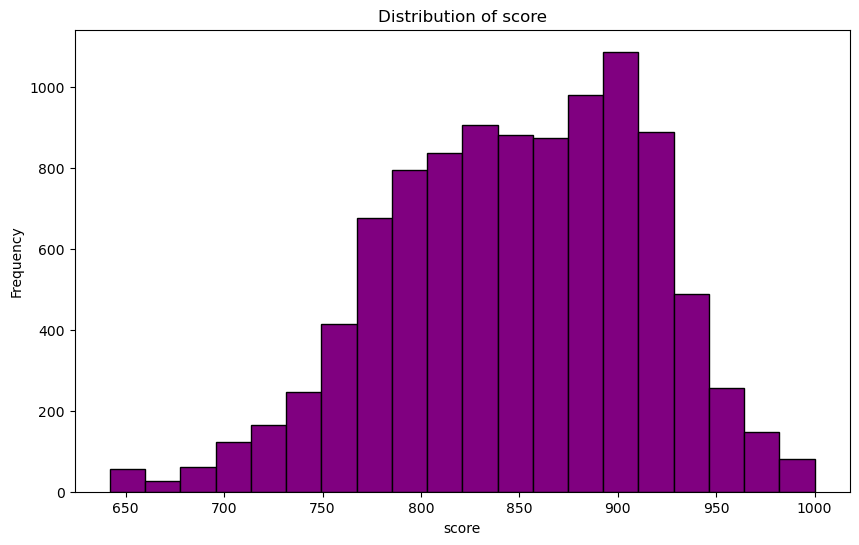

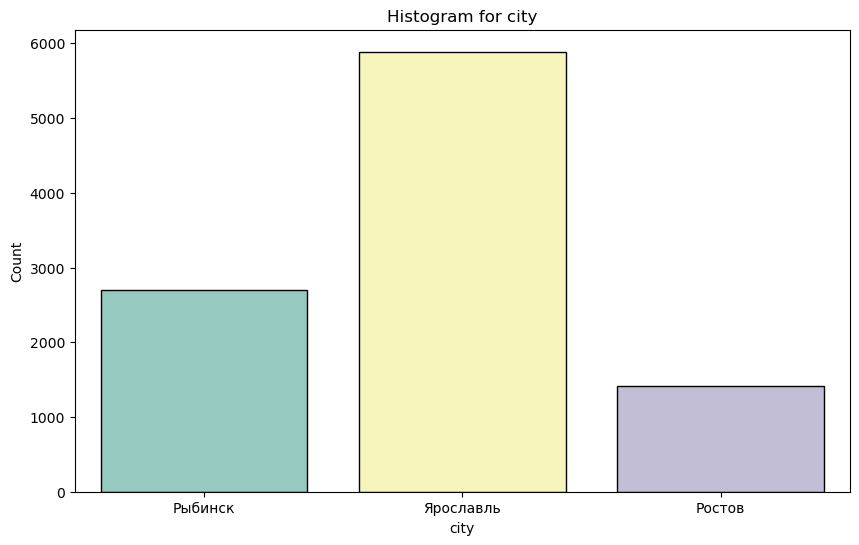

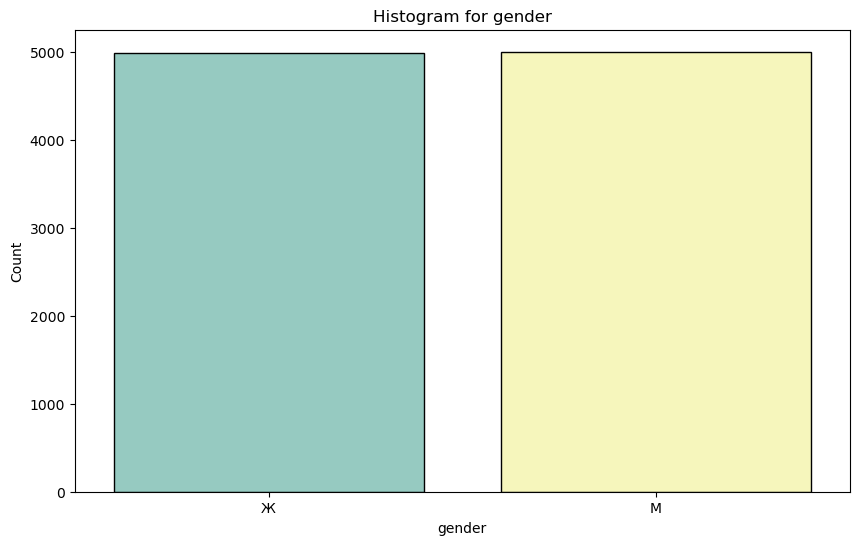

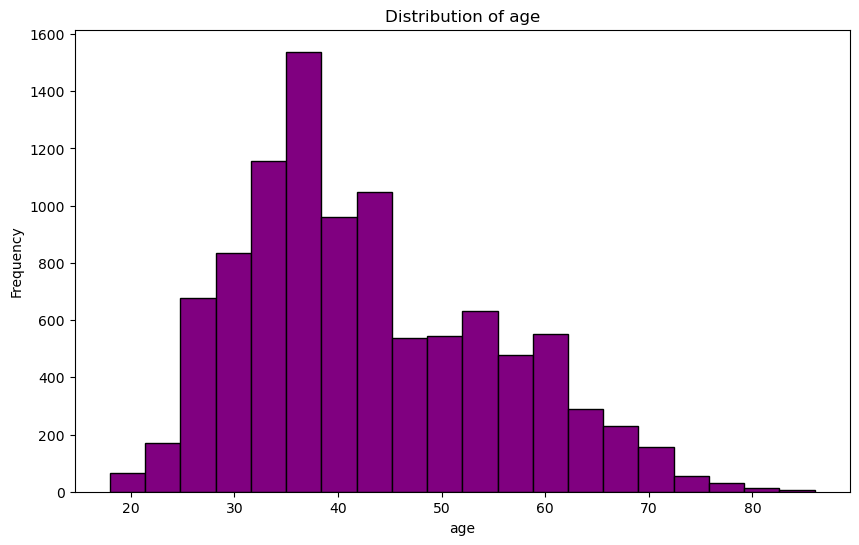

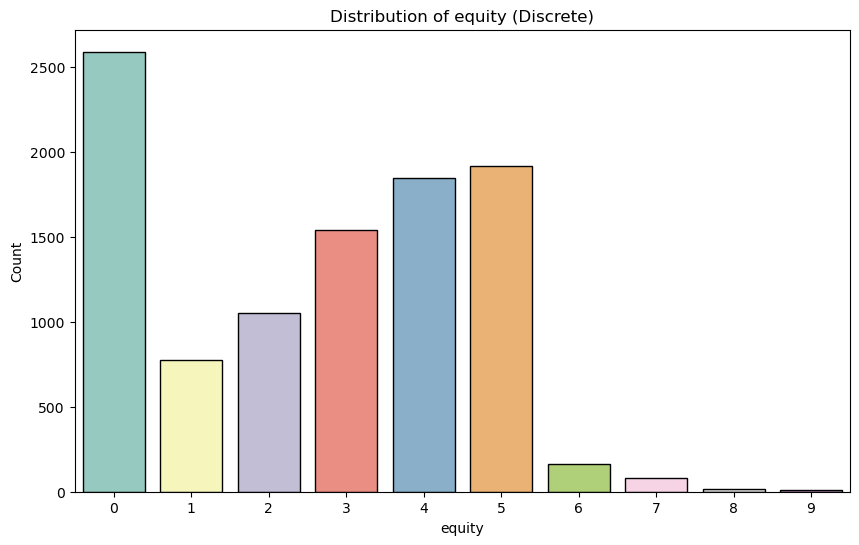

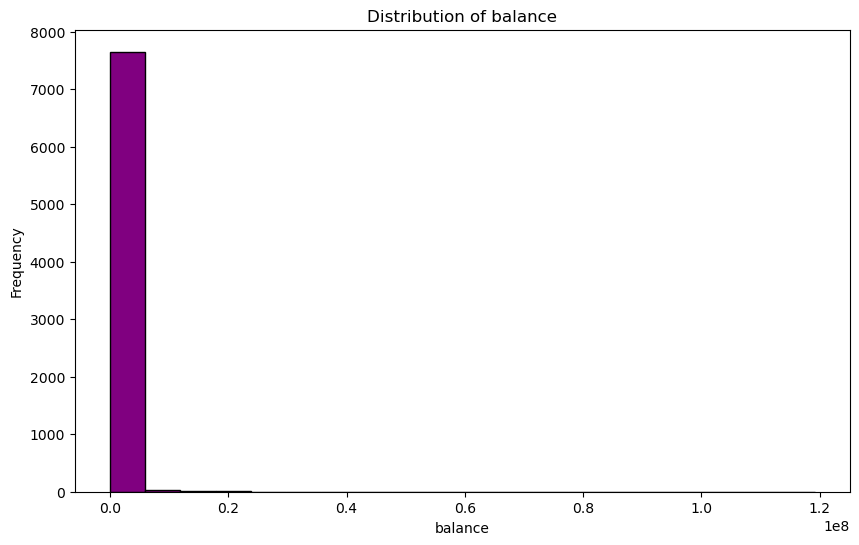

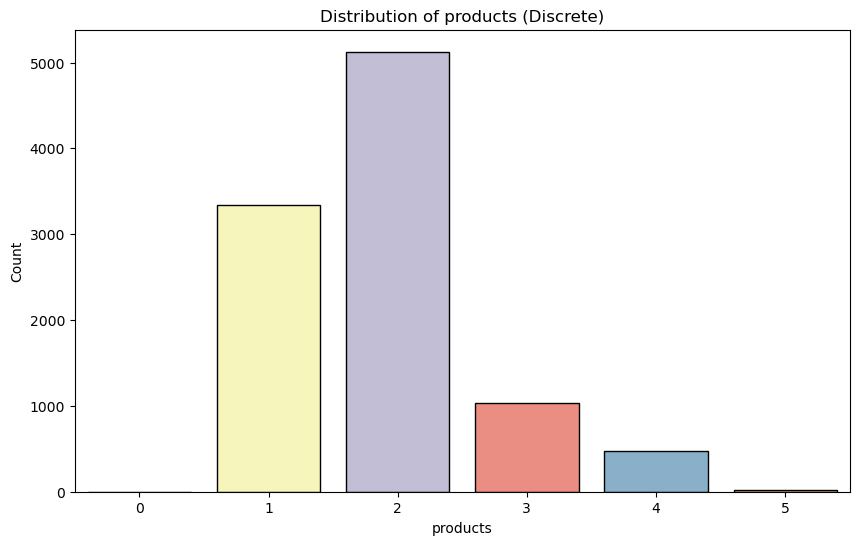

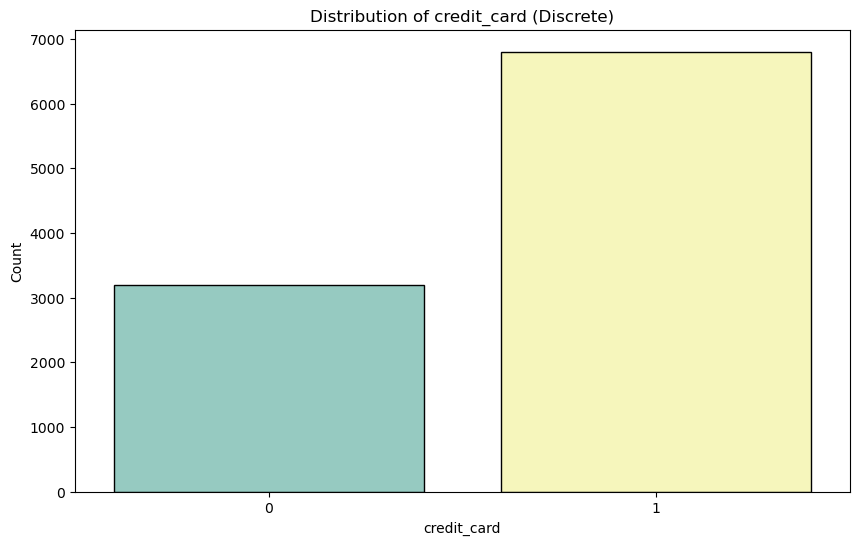

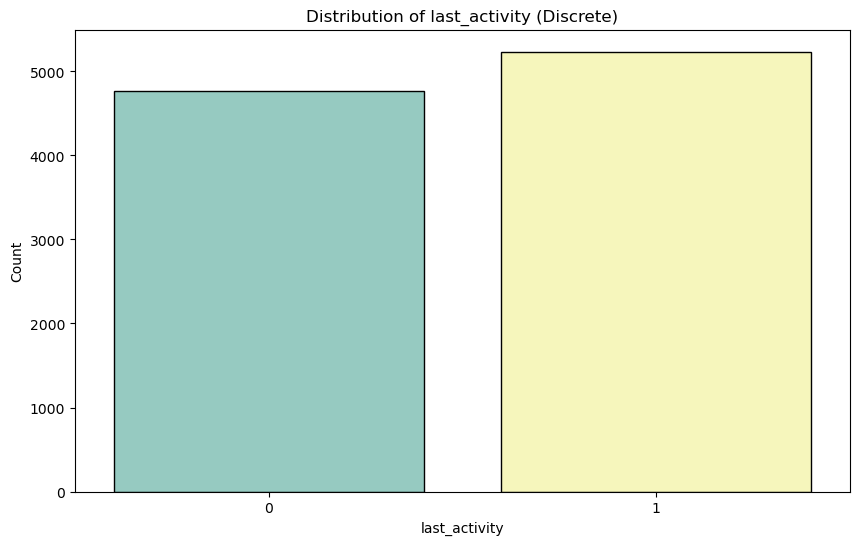

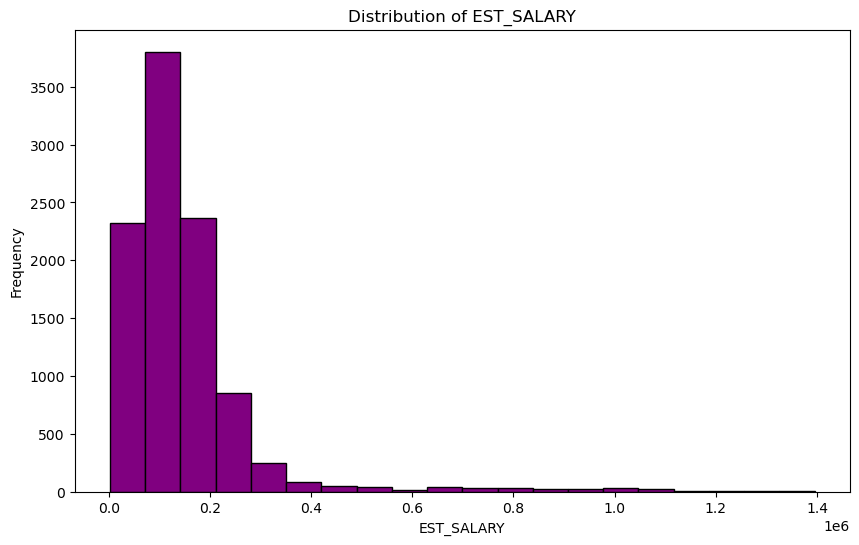

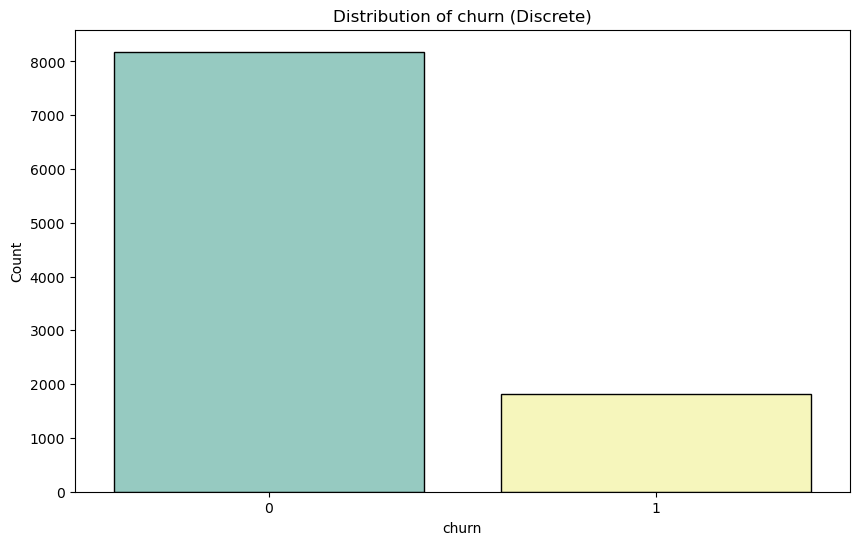

In [5]:
# Предполагается, что data - это ваш DataFrame
for column in data.columns:
    if column != 'USERID':  # Пропускаем качественные данные
    
        plt.figure(figsize=(10, 6))
        if data[column].dtype == 'object':  # Для категориальных данных
            sns.countplot(x=column, data=data, palette='Set3', edgecolor='black')
            plt.title(f'Histogram for {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
        elif data[column].dtype == 'int64' or data[column].dtype == 'float64':  # Для числовых данных
            if data[column].nunique() < 30:  # Проверяем, является ли переменная дискретной
                sns.countplot(x=column, data=data, palette='Set3', edgecolor='black')
                plt.title(f'Distribution of {column} (Discrete)')
                plt.xlabel(column)
                plt.ylabel('Count')
            else:
                plt.hist(data[column], bins=20, color='purple', edgecolor='black')
                plt.title(f'Distribution of {column}')
                plt.xlabel(column)
                plt.ylabel('Frequency')
        plt.show()


В целом все распределения соответствуют ожиданиям, кроме баланса на карте, проверим во время предобработки, почему большая часть значений баланса расположена в районе нуля

**Вывод по  блоку** Итак первичный осмотр был произведен, в 2х переменных обнаружены пропустки. Присутствуют разные типы данных и переменных. Распределения преймущественно ожидаемые


## Предобработка данных

### Проверка на корректность наименований столбцов


Приведем все названия столбцов в змеиный регистр для удобства 

In [6]:
print('Старые названия:')
display(data.columns)

print('Новые названия:')
data = data.rename(columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})
data.columns

Старые названия:


Index(['USERID', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'EST_SALARY', 'churn'],
      dtype='object')

Новые названия:


Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

### Проверка на наличие явных и латентных дубликатов

Для начала проверим явные дубликаты: одинаковые строки таблицы

In [7]:
#Проверка на явные дубли
data.duplicated().sum()

0

Для начала проверим повторяются ли уникальные идентифекаторы пользователя 

In [8]:
#Найдем одинаковые ID
double_index_1 = data.loc[data['user_id'].duplicated()].index
display(data.loc[double_index_1].head())

#Проверим как дубли выглядят в паре
for double_id in data.loc[double_index_1]['user_id']:
    display(data.loc[data['user_id'] == double_id])
    
print(f'количетсво дубликатов:{len(data.loc[double_index_1])}')
print(f'доля дубликатов в % :{len(data.loc[double_index_1])/len(data)*100}%')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1583,190253,726.00,Ярославль,М,49.00,0,NaN,1,1,1,177700.78,0
1837,210662,896.00,Рыбинск,Ж,37.00,0,NaN,2,0,0,90916.04,0
2138,131419,739.00,Рыбинск,Ж,37.00,3,1307941.65,3,0,0,103867.47,0
2165,187635,692.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2302,220816,934.00,Рыбинск,Ж,74.00,5,1294285.39,3,1,0,95606.80,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
231,190253,823.00,Рыбинск,М,37.00,4,373348.39,2,0,1,131947.92,1
1583,190253,726.00,Ярославль,М,49.00,0,NaN,1,1,1,177700.78,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
869,210662,962.00,Ярославль,Ж,54.00,5,5069231.39,1,1,1,955144.85,1
1837,210662,896.00,Рыбинск,Ж,37.00,0,NaN,2,0,0,90916.04,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
904,131419,934.00,Ярославль,М,35.00,5,2348335.95,2,0,0,217105.13,1
2138,131419,739.00,Рыбинск,Ж,37.00,3,1307941.65,3,0,0,103867.47,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
918,187635,918.00,Ярославль,Ж,44.00,0,NaN,1,1,1,162497.52,0
2165,187635,692.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1740,220816,840.00,Ярославль,Ж,41.00,3,1193287.13,2,1,1,76434.94,1
2302,220816,934.00,Рыбинск,Ж,74.00,5,1294285.39,3,1,0,95606.80,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1389,221156,687.00,Рыбинск,М,61.00,0,NaN,1,1,1,136361.72,0
2444,221156,913.00,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1513,208081,873.00,Ярославль,М,31.00,2,232814.75,2,1,1,122505.86,1
2998,208081,821.00,Рыбинск,Ж,62.00,3,493608.26,2,1,1,33491.45,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
790,170312,901.00,Ярославль,М,33.00,4,3276783.93,3,0,1,358700.96,1
3039,170312,813.00,Рыбинск,Ж,47.00,3,370027.67,2,0,0,129835.56,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
150,185748,850.00,Рыбинск,М,36.00,5,1203376.67,2,0,1,89401.82,1
3106,185748,912.00,Ярославль,Ж,47.00,5,1598218.98,2,0,0,180256.98,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1359,211130,833.00,Ярославль,М,55.00,3,1231184.90,4,0,1,187758.38,1
3817,211130,918.00,Рыбинск,Ж,55.00,0,NaN,2,1,1,244202.04,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1970,217643,845.00,Ярославль,М,29.00,5,733098.45,4,1,1,41443.01,1
4186,217643,804.00,Рыбинск,Ж,40.00,2,301836.65,2,1,1,81137.22,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2597,226719,990.00,Ярославль,М,37.00,4,14648692.14,2,0,0,934412.61,1
4216,226719,903.00,Рыбинск,Ж,63.00,0,NaN,1,1,0,138582.58,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
161,197364,928.00,Рыбинск,Ж,53.00,6,1347183.86,2,0,1,168189.49,1
4870,197364,889.00,Ярославль,М,33.00,0,NaN,2,1,1,96173.48,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3274,155765,863.00,Ярославль,М,30.00,5,1036114.50,5,1,1,150744.50,1
5197,155765,923.00,Рыбинск,М,30.00,0,NaN,1,1,1,120296.60,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4850,126368,909.00,Ярославль,Ж,30.00,4,1322623.29,2,0,1,140675.66,1
5420,126368,832.00,Рыбинск,Ж,33.00,0,NaN,1,0,0,118465.34,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7,218868,825.00,Ярославль,Ж,38.00,4,458145.40,2,1,1,68085.48,0
5470,218868,827.00,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3683,151662,960.00,Ярославль,Ж,37.00,4,2527032.70,4,1,0,231648.50,0
5495,151662,884.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5369,143592,885.00,Рыбинск,Ж,56.00,4,1201087.46,2,1,1,88223.89,1
5557,143592,764.00,Ярославль,Ж,68.00,3,508919.15,2,0,1,71211.66,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2276,141265,858.00,Ярославль,М,37.00,4,471599.16,2,1,1,148806.88,1
5569,141265,811.00,Рыбинск,Ж,33.00,3,1044316.88,2,1,0,46055.32,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3350,208815,877.00,Рыбинск,М,25.00,4,239421.18,1,1,1,48638.00,1
5570,208815,773.00,Ярославль,М,39.00,4,288110.09,2,1,0,56971.91,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
690,152479,768.00,Рыбинск,Ж,42.00,0,126787.79,4,1,1,143233.23,1
5705,152479,723.00,Ярославль,Ж,22.00,0,NaN,1,1,0,83955.65,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4611,217619,903.00,Рыбинск,Ж,59.00,5,844055.83,2,0,1,133999.76,1
5807,217619,766.00,Ярославль,М,52.00,2,218199.47,1,1,0,120356.44,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1580,208738,897.00,Рыбинск,Ж,45.00,5,859018.19,2,1,1,145510.08,1
5840,208738,839.00,Ярославль,М,60.00,5,1102438.37,2,0,1,116500.81,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5863,120258,908.00,Рыбинск,Ж,38.00,4,2213581.63,2,0,1,160327.77,1
5896,120258,905.00,Ярославль,М,30.00,0,NaN,1,1,1,146427.96,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5454,188957,853.00,Ярославль,М,35.00,1,374959.62,2,1,1,197600.97,1
6005,188957,882.00,Рыбинск,Ж,64.00,3,893392.91,3,1,0,69622.58,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.00,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
6457,228075,839.00,Рыбинск,М,39.00,5,507199.85,3,0,1,85195.80,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2941,172142,896.00,Ярославль,Ж,30.00,4,1009073.14,4,1,0,70866.29,1
6756,172142,751.00,Рыбинск,Ж,69.00,3,396568.03,2,0,1,45608.45,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3564,163207,853.00,Рыбинск,М,42.00,4,543839.62,1,1,1,105281.97,1
6786,163207,838.00,Ярославль,Ж,42.00,4,652776.60,2,1,1,97545.36,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3230,210135,974.00,Ярославль,Ж,50.00,5,5680148.93,4,1,1,338471.66,0
7236,210135,908.00,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1010,219343,921.00,Ярославль,Ж,33.00,0,NaN,1,1,0,159475.61,0
7248,219343,920.00,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
58,164676,860.00,Ярославль,М,37.00,5,648594.03,2,1,1,213586.86,1
7271,164676,790.00,Рыбинск,Ж,77.00,1,111202.01,1,1,0,32835.45,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
431,214031,856.00,Рыбинск,М,36.00,2,386426.67,4,1,1,72767.85,0
7409,214031,777.00,Ярославль,М,NaN,2,171510.23,1,1,1,75409.63,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1608,140377,802.00,Ярославль,М,26.00,3,539863.29,4,1,1,112167.83,1
7487,140377,930.00,Рыбинск,Ж,34.00,5,1123967.02,1,1,1,148336.26,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4866,117943,855.00,Рыбинск,Ж,32.00,6,1036832.93,4,1,1,107792.71,1
7542,117943,880.00,Ярославль,Ж,40.00,0,NaN,1,1,0,137718.93,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.00,Рыбинск,Ж,55.00,1,362756.49,3,0,1,175920.48,1
7694,116540,887.00,Ярославль,Ж,38.00,0,NaN,1,0,1,119247.61,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4986,210792,884.00,Рыбинск,М,48.00,4,2228037.20,2,0,1,207978.09,1
7814,210792,839.00,Ярославль,М,42.00,2,662646.97,1,1,0,138403.60,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3859,191520,773.00,Рыбинск,М,36.00,3,1219918.08,4,1,1,119933.13,1
7931,191520,767.00,Ярославль,М,45.00,0,NaN,1,1,1,880005.05,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1181,198635,896.00,Рыбинск,Ж,32.00,0,NaN,1,1,1,170866.01,0
8015,198635,670.00,Ярославль,Ж,NaN,0,NaN,1,1,1,168699.33,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
6412,226550,939.00,Ярославль,М,34.00,0,NaN,1,1,1,145913.73,0
8070,226550,940.00,Рыбинск,М,NaN,0,NaN,1,0,1,147696.95,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
946,149365,877.00,Ярославль,М,41.00,5,819182.01,2,0,0,212316.47,1
8272,149365,793.00,Рыбинск,Ж,61.00,0,476496.99,2,1,1,46147.06,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4401,216848,929.00,Рыбинск,М,68.00,0,NaN,1,1,1,195902.59,0
8293,216848,930.00,Ярославль,М,NaN,0,NaN,1,1,1,199542.51,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5252,148826,895.00,Ярославль,М,32.00,5,1470273.14,2,0,0,118058.52,1
8364,148826,909.00,Рыбинск,Ж,32.00,0,NaN,3,1,0,28843.54,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5889,206759,917.00,Ярославль,М,22.00,0,NaN,1,1,0,70617.52,0
8385,206759,915.00,Рыбинск,М,NaN,0,NaN,1,1,0,71179.53,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
6685,210898,934.00,Рыбинск,Ж,35.00,0,NaN,1,0,1,912105.84,0
8449,210898,805.00,Ярославль,Ж,NaN,0,NaN,1,0,1,922080.25,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8205,227795,840.00,Рыбинск,М,34.00,2,350768.03,1,1,0,102036.14,1
8497,227795,839.00,Ярославль,М,34.00,2,326593.14,2,1,0,103314.92,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7453,210627,864.00,Ярославль,Ж,38.00,4,1527225.32,4,1,1,162999.17,1
8521,210627,804.00,Рыбинск,М,30.00,2,347818.88,3,1,0,129015.25,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
440,221197,663.00,Рыбинск,М,27.00,0,NaN,1,1,1,172573.13,0
8632,221197,893.00,Ярославль,М,NaN,0,NaN,1,1,0,173929.92,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1411,123461,829.00,Ярославль,Ж,59.00,0,96222.44,2,0,1,102771.55,1
8638,123461,934.00,Рыбинск,М,34.00,0,NaN,2,1,0,291619.27,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2989,181526,918.00,Ярославль,Ж,37.00,5,1366382.35,4,1,1,97932.95,1
8705,181526,895.00,Рыбинск,М,29.00,0,NaN,1,1,1,124786.53,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5629,162053,921.00,Рыбинск,М,33.00,3,857011.13,2,1,1,113512.57,1
8733,162053,786.00,Ярославль,М,29.00,4,205824.97,3,1,0,121371.73,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4443,127440,846.00,Рыбинск,М,66.00,1,57405.67,2,0,1,17831.63,0
8785,127440,663.00,Ярославль,М,NaN,0,NaN,1,1,1,117197.56,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2499,199312,948.00,Ярославль,М,41.00,5,3095721.85,4,1,1,307234.69,1
8822,199312,911.00,Рыбинск,Ж,43.00,0,NaN,2,1,1,152189.72,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
6446,222480,776.00,Ярославль,Ж,38.00,5,823145.83,2,1,1,55777.44,0
9104,222480,776.00,Рыбинск,Ж,NaN,5,796735.09,1,1,1,55073.63,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8584,183510,922.00,Ярославль,М,26.00,5,448542.42,3,0,1,66063.13,1
9146,183510,800.00,Рыбинск,Ж,42.00,7,473293.81,2,1,0,54049.88,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9035,200863,933.00,Рыбинск,М,29.00,7,766924.56,2,0,1,89323.33,1
9175,200863,832.00,Ярославль,М,42.00,5,620064.73,2,0,0,188054.46,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2439,150667,813.00,Рыбинск,Ж,44.00,0,62504.47,4,1,0,152393.79,1
9267,150667,931.00,Ярославль,М,41.00,0,NaN,1,0,0,261904.44,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8897,202983,941.00,Ярославль,Ж,39.00,0,NaN,1,0,1,159348.84,0
9301,202983,942.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,163804.73,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1080,155872,896.00,Ярославль,М,36.00,3,1113656.92,3,0,1,291176.85,1
9363,155872,714.00,Рыбинск,Ж,29.00,0,NaN,1,1,0,118052.84,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4720,187459,895.00,Ярославль,М,48.00,0,NaN,1,1,0,180887.50,0
9380,187459,894.00,Рыбинск,М,NaN,0,NaN,1,1,0,178012.28,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4623,217826,842.00,Ярославль,М,39.00,4,439747.65,2,0,1,116736.75,1
9406,217826,790.00,Рыбинск,Ж,46.00,4,430414.80,2,1,1,49400.37,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4343,141945,929.00,Рыбинск,М,33.00,0,NaN,1,1,0,381868.89,0
9457,141945,929.00,Ярославль,М,NaN,0,NaN,1,1,0,381868.89,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3988,129785,904.00,Рыбинск,М,33.00,5,2427737.60,3,0,1,188856.75,1
9504,129785,949.00,Ярославль,М,43.00,0,NaN,1,1,1,166845.37,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3936,160075,899.00,Ярославль,М,34.00,4,1647814.67,4,1,0,151888.42,1
9508,160075,824.00,Рыбинск,Ж,57.00,3,355047.33,2,0,0,64351.81,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3668,185829,925.00,Рыбинск,М,40.00,0,NaN,1,1,0,228305.64,0
9632,185829,927.00,Ярославль,М,NaN,0,NaN,1,1,0,231254.86,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9322,221809,917.00,Рыбинск,М,45.00,0,NaN,1,1,1,199728.29,0
9634,221809,917.00,Ярославль,М,NaN,0,NaN,1,1,1,192644.15,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4587,171751,874.00,Рыбинск,Ж,26.00,5,292054.42,2,0,1,20528.56,1
9653,171751,862.00,Ярославль,М,42.00,4,481992.19,2,1,0,71816.86,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2226,195884,906.00,Ярославль,М,49.00,6,1354552.83,2,0,0,270678.42,1
9659,195884,767.00,Рыбинск,Ж,45.00,1,335652.56,3,1,1,100197.67,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
6670,163657,903.00,Рыбинск,М,45.00,4,1343339.70,4,0,1,83741.65,0
9667,163657,849.00,Ярославль,М,NaN,4,1254013.85,2,1,1,119106.67,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8164,124450,859.00,Ярославль,Ж,38.00,6,516811.20,1,1,1,95144.63,1
9775,124450,758.00,Рыбинск,Ж,36.00,0,73574.07,2,0,1,79963.59,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5020,168998,886.00,Ярославль,Ж,35.00,4,394780.61,2,1,1,510577.10,1
9785,168998,895.00,Рыбинск,М,44.00,0,282653.53,3,0,0,255296.47,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4212,140934,919.00,Ярославль,Ж,29.00,4,603946.18,3,0,1,158438.79,0
9819,140934,832.00,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7055,217412,879.00,Рыбинск,М,42.00,5,568140.15,3,0,0,231658.67,1
9880,217412,886.00,Ярославль,Ж,35.00,3,1026172.14,2,1,0,53099.16,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7753,175730,846.00,Ярославль,Ж,32.00,7,216764.74,4,1,1,77100.85,1
9970,175730,816.00,Рыбинск,М,36.00,4,477892.07,3,1,0,81100.60,0


количетсво дубликатов:73
доля дубликатов в % :0.73%


Видим абсолютно разные данные по всем параметрам у пользователей с одинаковым ID. Такого не должно быть, однако данные важны, поэтому заменим продублированные идентификаторы.

In [9]:
data.loc[data.duplicated(subset=['user_id']), 'user_id'] = range(94561-73, 94561)
data['user_id'].sort_values()

1583     94488
1837     94489
2138     94490
2165     94491
2302     94492
         ...  
2373    229054
5764    229058
6059    229130
1234    229136
8913    229145
Name: user_id, Length: 10000, dtype: int64

Далее проверим неявные дубли через приведение строк к нижнему регистру и просмотра уникальных значений в категориальных переменных:

In [10]:
#Создадим копию
data_check = data

#приведем значения к нижнему регистру
data_check["city"].str.lower()
data_check["gender"].str.lower()

#Проверям
if data_check.duplicated().sum() == 0:
    print('Дублей по регистру не обнаружено')
else:
    print(data_check.duplicated().sum())

Дублей по регистру не обнаружено


In [11]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

**Итак**: продублированные идентификаторы запинили на новые, удалений произведено не было

###  Категоризация и кодирование необходимых данных

В данном блоке будут добаавлены необходимые признаки и кодировки для простоты дальнейших измерений: 

1) Закодируем пол в бинарном формате,

2) Закодируем город,

3) Переменным с пропущенными значениями добавим новый признак, определяющий наличие пропуска. 1-значение пропущено, 0 - значение не пропущено.

In [12]:
#Добавляем признаки для пропусков
data['age_miss'] = 0
data['balance_miss'] = 0

data.loc[data['age'].isna(), 'age_miss'] = 1
data.loc[data['balance'].isna(), 'balance_miss'] = 1

In [13]:
#Кодируем город и пол

dummy_data = pd.get_dummies(data, columns=['gender', 'city'])

In [14]:
#Проверка
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_miss,balance_miss
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,0,0
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,0,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,0,1
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1,0,0
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1,0,0


Закодируем возраст для дальнейшей работы с ним. Для этого предворительно рассмотрим возростные группы в разрезе оттока:

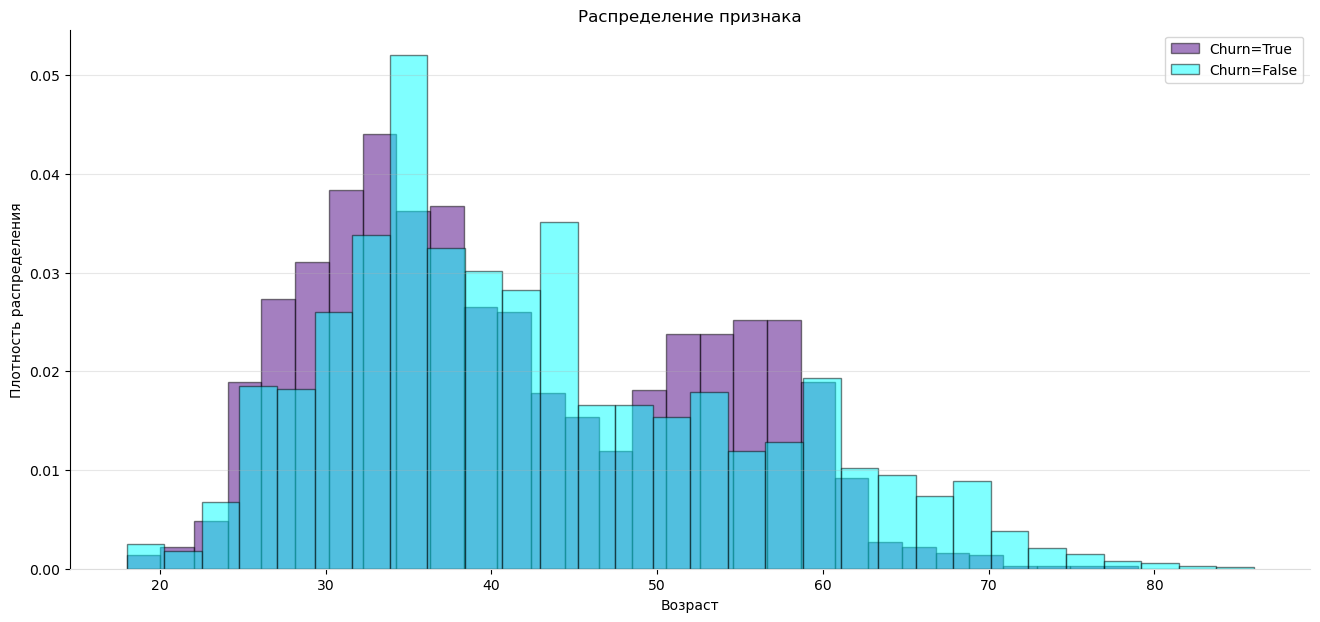

In [15]:
fig, ax = plt.subplots(figsize=(16, 7))

# Сбрасываем индекс DataFrame перед фильтрацией
data_reset = data.reset_index(drop=True)

# Фильтрация данных по категории 'churn'
churn_true_data = data_reset[data_reset['churn'] == True]
churn_false_data = data_reset[data_reset['churn'] == False]

# Создание столбчатой диаграммы
ax.hist(churn_true_data['age'], alpha=0.5, label='Churn=True', color='indigo', bins=30, density=True, \
        edgecolor='black')
ax.hist(churn_false_data['age'], alpha=0.5, label='Churn=False', color='cyan', bins=30, density=True, \
        edgecolor='black')

# Настройка заголовка, подписей осей и легенды
ax.set_title("Распределение признака")
ax.set_xlabel('Возраст')
ax.set_ylabel('Плотность распределения')  # Adding y-axis label
ax.legend()

# Удаление ненужных спинов и сетки
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#dddddd')
ax.grid(axis='y', alpha=0.3)

plt.show()



На основании распределения возростов в разрезе по оттоку, можно приблизительно выделить следующте каьегории возростов: 

In [16]:
#Создаем категоризирующую функцию
def categorize_age(age):

    if age < 22:
        return "Моложе 25"
    elif age <= 36:
        return "от 25 до 32"
    elif age <= 47:
        return "от 32 до 47"
    elif age <= 62:
        return "от 48 до 62"
    else:
        return "62 и более"
    
#Применяем к таблице
data['age_category'] = data['age'].apply(categorize_age)
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_miss,balance_miss,age_category
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,0,0,от 25 до 32
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,0,0,от 32 до 47
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,0,1,от 25 до 32
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1,0,0,от 48 до 62
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1,0,0,от 25 до 32


### Работа с пропусками

Перед обработкой пропусков обязательно стоит выяснить, к какому типу они относятся, а также как эти пропуски зависят от имеющихся данных - для этого в предыдущем блоке были перекодированы значения и добавлены необходимые для этого признаки.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
 12  age_miss       10000 non-null  int64  
 13  balance_miss   10000 non-null  int64  
 14  age_category   10000 non-null  object 
dtypes: float64(4), int64(8), object(3)
memory usage: 1.1+ MB


In [18]:
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn',
       'age_miss', 'balance_miss', 'age_category'],
      dtype='object')

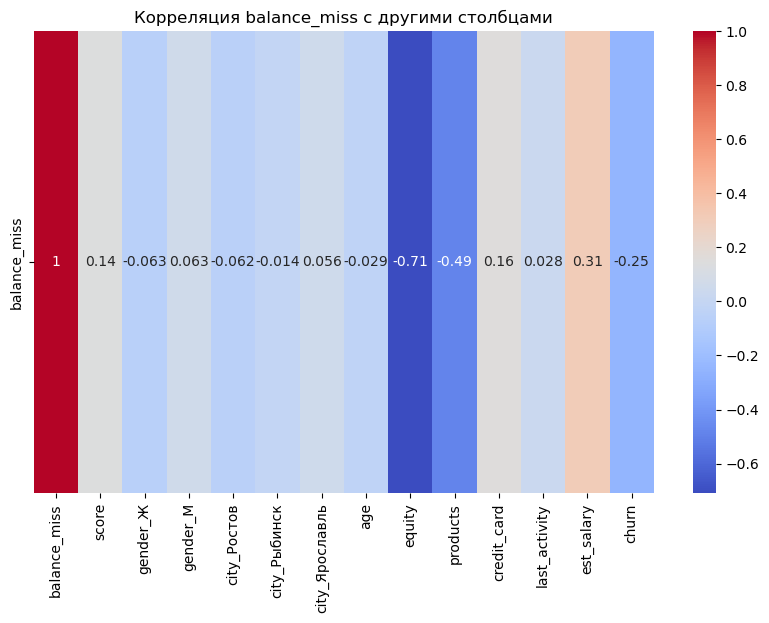

In [19]:
# Вычисляем корреляцию между balance_miss и другими столбцами
correlations = dummy_data[['balance_miss', 'score', 'gender_Ж', 'gender_М', 'city_Ростов',
                     'city_Рыбинск','city_Ярославль', 'age', 'equity', 'products', 'credit_card',
                     'last_activity', 'est_salary', 'churn']].corr()

# Создаем подматрицу, используя .iloc для индексации по позиции
subset_corr = correlations.iloc[[0], :]

# Очищаем место для новой тепловой карты
plt.figure(figsize=(10, 6))

# Тепловая карта для подматрицы
sns.heatmap(subset_corr, annot=True, cmap='coolwarm')

# Убираем метки диагонали, создавая новый индекс без них
subset_corr.index = [None] * len(subset_corr)

plt.title('Корреляция balance_miss с другими столбцами')
plt.show()

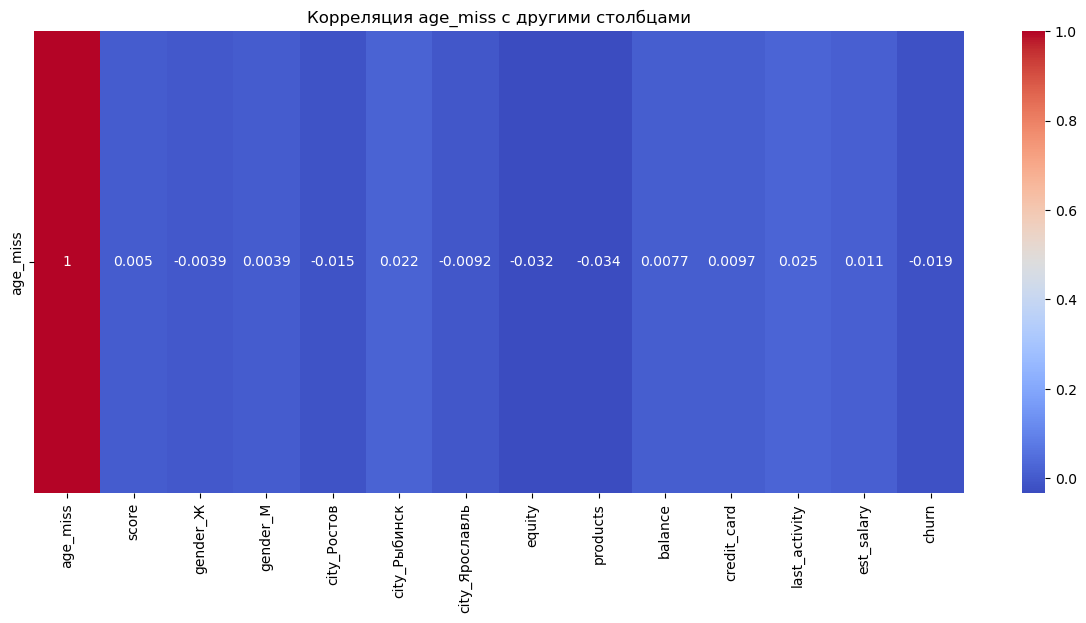

In [20]:
# Вычисляем корреляцию между age_miss и другими столбцами
correlations = dummy_data[['age_miss', 'score', 'gender_Ж', 'gender_М', 'city_Ростов',
                     'city_Рыбинск','city_Ярославль', 'equity', 'products', 'balance', 'credit_card', 
                     'last_activity', 'est_salary', 'churn']].corr()

# Создаем подматрицу, используя .iloc для индексации по позиции
subset_corr = correlations.iloc[[0], :]

# Очищаем место для новой тепловой карты
plt.figure(figsize=(15, 6))

# Тепловая карта для подматрицы
sns.heatmap(subset_corr, annot=True, cmap='coolwarm')

# Убираем метки диагонали, создавая новый индекс без них
subset_corr.index = [None] * len(subset_corr)

plt.title('Корреляция age_miss с другими столбцами')
plt.show()

Итак, пропуски по балансу пользователей демонстрируют весьма сильную корреляцию сколичеством баллов собственности. Пропуски в возросте никак не связаны с другими переменными. Таким образом, пропуски в возрасте можно считать пропусками типа **MAR**, а в балансе **MNAR**. 

"Пропуски в балансе должны быть оставлены без изменений из-за их характера и количества. Для отслеживания этих пропущенных значений создадим отдельный столбец (назовем его balance_missing), где каждая запись будет указывать, было ли наблюдение пропущено или нет.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
 12  age_miss       10000 non-null  int64  
 13  balance_miss   10000 non-null  int64  
 14  age_category   10000 non-null  object 
dtypes: float64(4), int64(8), object(3)
memory usage: 1.1+ MB


In [22]:
#Избавляемся от пропусков в возрасте
data = data.dropna(subset=['age'])
data = data.drop(columns=['age_miss'])

#заполняем пропуски -1 чтобы не спутать с их с информацией

data['balance'] = data['balance'].fillna(-1)
data['balance_missing'] = data['balance'].apply(lambda x: 1 if x == -1 else 0)

In [23]:
#проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9974 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          9974 non-null   int64  
 1   score            9974 non-null   float64
 2   city             9974 non-null   object 
 3   gender           9974 non-null   object 
 4   age              9974 non-null   float64
 5   equity           9974 non-null   int64  
 6   balance          9974 non-null   float64
 7   products         9974 non-null   int64  
 8   credit_card      9974 non-null   int64  
 9   last_activity    9974 non-null   int64  
 10  est_salary       9974 non-null   float64
 11  churn            9974 non-null   int64  
 12  balance_miss     9974 non-null   int64  
 13  age_category     9974 non-null   object 
 14  balance_missing  9974 non-null   int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 1.2+ MB


### Корректировка типов данных

Еще раз откроем общую информацию о данных, чтобы понять, какие типы необходимо исправить:

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9974 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          9974 non-null   int64  
 1   score            9974 non-null   float64
 2   city             9974 non-null   object 
 3   gender           9974 non-null   object 
 4   age              9974 non-null   float64
 5   equity           9974 non-null   int64  
 6   balance          9974 non-null   float64
 7   products         9974 non-null   int64  
 8   credit_card      9974 non-null   int64  
 9   last_activity    9974 non-null   int64  
 10  est_salary       9974 non-null   float64
 11  churn            9974 non-null   int64  
 12  balance_miss     9974 non-null   int64  
 13  age_category     9974 non-null   object 
 14  balance_missing  9974 non-null   int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 1.2+ MB


В целом проанализировав информацию о типах, можно сказать, что корректировка требуется только для одной переменной: **age**, поскольку возраст по стандарту измеряется в целых числах. В остальном все типы верные

In [25]:
data['age'] = data['age'].astype('int')

### Проверка значений на наличие выбросов

Далее проверим распределения количестсвенных переменных на наличие искажений, для этого отдельно проанализируем каждую количественную переменную:

####  Баллы кредитного скоринга

In [26]:
print('Сортировка наблюдений:')
data['score'].sort_values()

Сортировка наблюдений:


2532    642.00
7066    642.00
921     646.00
5131    646.00
4071    648.00
         ...  
6948   1000.00
125    1000.00
4721   1000.00
1027   1000.00
3348   1000.00
Name: score, Length: 9974, dtype: float64

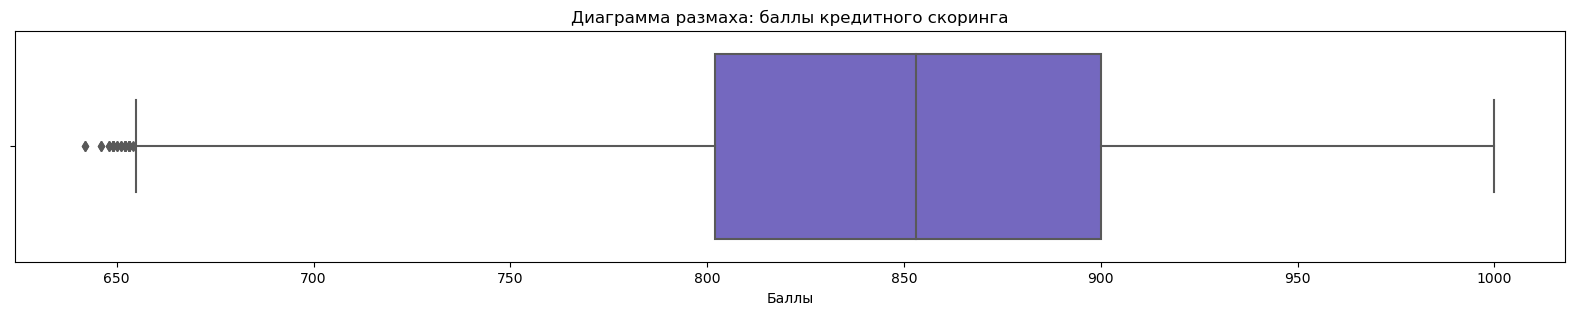

Описательная статистика


count   9974.00
mean     848.68
std       65.40
min      642.00
25%      802.00
50%      853.00
75%      900.00
max     1000.00
Name: score, dtype: float64

In [27]:
# Установка размера фигуры
plt.figure(figsize=(20, 3))  # Значения (широта, высота) задаются в дюймах

# Построение boxplot для столбца 'score'
sns.boxplot(x=data['score'], color='SlateBlue')

plt.title('Диаграмма размаха: баллы кредитного скоринга')
plt.xlabel('Баллы')

plt.show()

#Выводим описательную статистику для оценки распределения
print('Описательная статистика')
display(data['score'].describe())

**По данной переменной аномальными значениями можно считать значения меньше 650 баллов, однако исключать их не стоит, поскольку они не являются ошибочными иили излишне отдаленными от распределения - это такие же важные для анализа наблюдения**

#### Возраст

In [28]:
print('Сортировка наблюдений:')
display(data['age'].sort_values())

Сортировка наблюдений:


3592    18
8995    18
8606    18
9446    18
9040    18
        ..
2795    83
3272    84
9423    84
9413    86
9176    86
Name: age, Length: 9974, dtype: int32

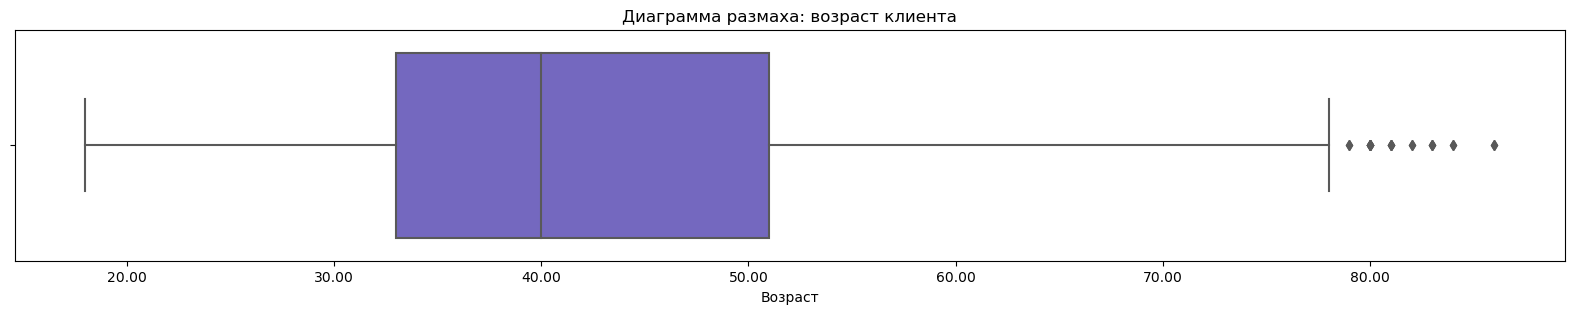

Описательная статистика


count   9974.00
mean      42.73
std       12.18
min       18.00
25%       33.00
50%       40.00
75%       51.00
max       86.00
Name: age, dtype: float64

In [29]:
# Установка размера фигуры
plt.figure(figsize=(20, 3))  # Значения (широта, высота) задаются в дюймах
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

# Построение boxplot для столбца 'score'
sns.boxplot(x=data['age'], color='SlateBlue')

plt.title('Диаграмма размаха: возраст клиента')
plt.xlabel('Возраст')

plt.show()

#Выводим описательную статистику для оценки распределения
print('Описательная статистика')
display(data['age'].describe())

**В целом по возрасту также не стоит исключать наблюдения. Значения выше 80 лет, хоть и являются аномальными для распределения, несут свою смысловую нагрузку и не сильно искажают его (распределение)**

#### Количество баллов собственности

In [30]:
print('Сортировка наблюдений:')
display(data['equity'].sort_values())

print('Посчет наблюдений:')
display(data['equity'].value_counts())

Сортировка наблюдений:


4991    0
5536    0
5533    0
5530    0
1954    0
       ..
7146    9
7078    9
5230    9
9031    9
3953    9
Name: equity, Length: 9974, dtype: int64

Посчет наблюдений:


equity
0    2576
5    1915
4    1847
3    1541
2    1051
1     773
6     161
7      80
8      17
9      13
Name: count, dtype: int64

**Все абсолютно ровно, шкала от 1 до 9, аномалий нет и быть не может**

#### Баланс на счете

In [31]:
print('Сортировка наблюдений:')
display(data.loc[data['balance'] != -1]['balance'].sort_values())

print('Посчет наблюдений:')
display(data.loc[data['balance'] != -1]['balance'].value_counts())

Сортировка наблюдений:


3900           0.00
6757           0.00
6164           6.00
3918           7.00
2876          20.00
           ...     
9753    25727761.86
4721    29008931.92
1846    43277099.84
1059    64866210.15
7597   119113552.01
Name: balance, Length: 7695, dtype: float64

Посчет наблюдений:


balance
26.00         2
38.00         2
0.00          2
39.00         2
59214.82      1
             ..
1452458.87    1
1294391.76    1
1106127.02    1
587485.48     1
1180886.70    1
Name: count, Length: 7691, dtype: int64

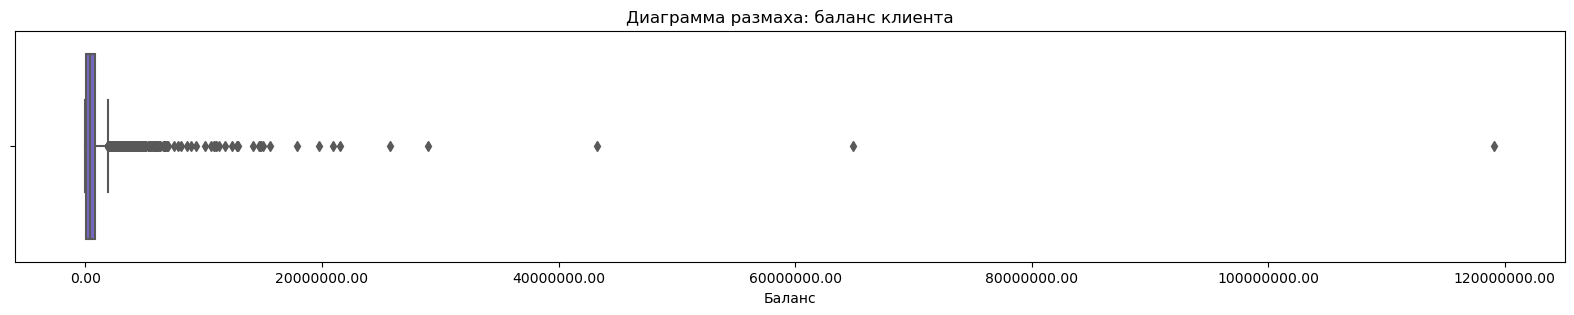

Описательная статистика
count        9974.00
mean       638224.64
std       1773745.31
min            -1.00
25%         62803.20
50%        376253.62
75%        804256.28
max     119113552.01
Name: balance, dtype: float64


In [32]:
fig, ax = plt.subplots(figsize=(20, 3))
sns.boxplot(x=data['balance'], color='SlateBlue', ax=ax)
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

plt.title('Диаграмма размаха: баланс клиента')
plt.xlabel('Баланс')

plt.show()


# Добавление описательной статистики
print('Описательная статистика')
print(data['balance'].describe())

В данном случае, хотя баланс, равный 119 113 552р.и является реальным, он очень сильно искажает результат. И поскольку целью исследования является изучения поведения отточных клиентов, а не самых богатых, в данном контексте отбросим большие значения. Проблема в том, что если мы отбросим значения, превышающие 3й квартиль, то потеряем слишком много важный данных, поэтому нужно взять планку побольше. Приблезительно судя по диаграмме это значение равняется 7 млн. Тот рубеж, где значения становятся слишком аномальными. 

In [33]:
#Отбрасываем значения 
data=data.loc[data['balance'] < 7000000]

#### Количество продуктов, которыми пользуется клиент

In [34]:
print('Посчет наблюдений:')
display(data['products'].value_counts())

Посчет наблюдений:


products
2    5098
1    3317
3    1035
4     470
5      19
0       1
Name: count, dtype: int64

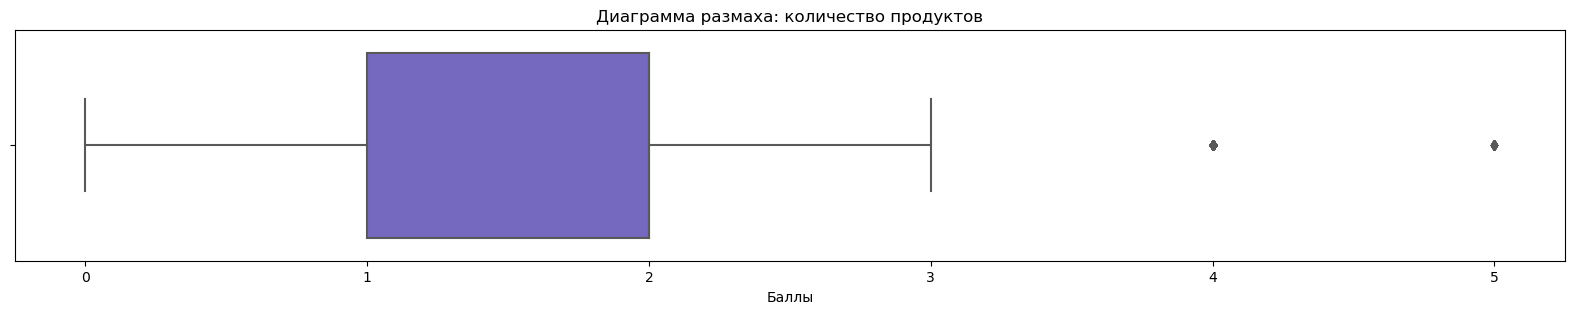

Описательная статистика


count   9940.00
mean       1.87
std        0.79
min        0.00
25%        1.00
50%        2.00
75%        2.00
max        5.00
Name: products, dtype: float64

In [35]:
# Установка размера фигуры
plt.figure(figsize=(20, 3))  # Значения (широта, высота) задаются в дюймах

# Построение boxplot для столбца 'score'
sns.boxplot(x=data['products'], color='SlateBlue')

plt.title('Диаграмма размаха: количество продуктов')
plt.xlabel('Баллы')

plt.show()

#Выводим описательную статистику для оценки распределения
print('Описательная статистика')
display(data['products'].describe())

**Тут опять же, несмотря на то, что по диаграмме размаха значения 4 и 5 являются аномалиями, это оченб важные значения, поэтому наблюдения выкидывать нелязя, оставляем все как есть.**

#### Оценочный доход клиента

In [36]:
print('Посчет наблюдений:')
display(data['est_salary'].value_counts())

Посчет наблюдений:


est_salary
176348.18    2
108250.17    2
49742.87     2
75719.14     1
728769.59    1
            ..
17162.90     1
54692.36     1
104774.84    1
83033.52     1
21422.37     1
Name: count, Length: 9937, dtype: int64

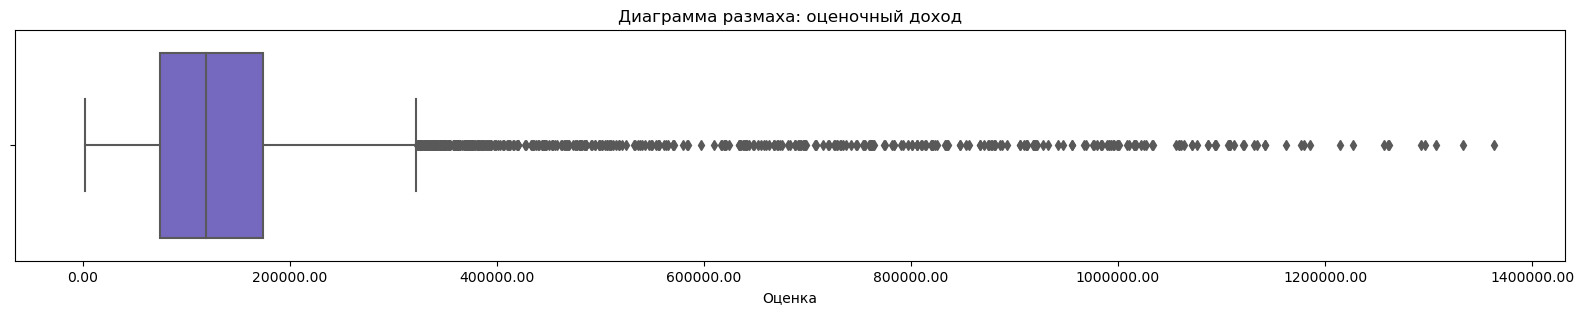

Описательная статистика


count      9940.00
mean     145731.93
std      133224.06
min        2546.30
25%       75087.48
50%      119303.11
75%      174054.39
max     1363549.52
Name: est_salary, dtype: float64

In [37]:
# Установка размера фигуры
plt.figure(figsize=(20, 3))  # Значения (широта, высота) задаются в дюймах
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))


# Построение boxplot для столбца 'score'
sns.boxplot(x=data['est_salary'], color='SlateBlue')

plt.title('Диаграмма размаха: оценочный доход')
plt.xlabel('Оценка')

plt.show()

#Выводим описательную статистику для оценки распределения
print('Описательная статистика')
display(data['est_salary'].describe())

**Тут аналогично с балансом, отбросим слишком высокие значения, влияющие на статистику**. Аналогично с балансом, за 3м квартилем находится слишком много наблюдений, удаление которых слишком радикально, поэтому возьмем планку в районе 1 млн. рублей дохода, и избавимся от значений, превышающих ее.

In [38]:
data = data.loc[data['est_salary'] <= 1000000]

### Подведение промежуточных итогов

Итак, в данном блоке предобработки были выполнены следующие задачи: 

    1) Стиль названий столбцов был сорректирован
    2) Дупликаты были проверены и исправлены: удалений не произведено, только замена индексов 
    3) Нееобходимая кодировка осущесвтлена
    4) Пропуски удалены в возрасте, и оставлены и учтены через признак для баланса 
    5) Изменен тип данных возраста с float на int 
    6) Аномальные значения по доходу исключены, остальные проверены 

Данные полностью готовы к дальнейшим исследовательскому и статистическому анализам

## Исследовательский анализ

### Проверка распределений и первичный отбор списка предполагаемых признаков, разбивающих клиентов банка на проблемных (отточных) и не проблемных

В рамках данного аналитического блока выявим, какие группы клиентов считать отточными и какие признаки предположительно влияют на отточность. Задачей данного подблока является сгруппировать признаки по группам, оценить их распределения и построить общую матрицу корреляций. 

Для начала разделим все признаки исходя из их характера и распределения на непрерывные и дискретные с категориальными:

In [39]:
#Разбиваем признаки по группам
continious = ['score', 'balance', 'est_salary', 'age']
discrete = ['products', 'equity', 'age_category']
category = ['city', 'gender', 'credit_card', 'last_activity']

data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_miss,age_category,balance_missing
0,183012,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,от 25 до 32,0
1,146556,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,от 32 до 47,0
2,120722,892.00,Рыбинск,Ж,30,0,-1.00,1,1,1,107683.34,0,1,от 25 до 32,1
3,225363,866.00,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,от 48 до 62,0
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,от 25 до 32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,0,от 25 до 32,0
9996,139170,894.00,Ярославль,М,46,0,-1.00,1,1,0,196898.29,0,1,от 32 до 47,1
9997,115639,903.00,Ярославль,М,24,0,-1.00,2,1,1,108905.09,0,1,от 25 до 32,1
9998,148700,777.00,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,0,62 и более,0


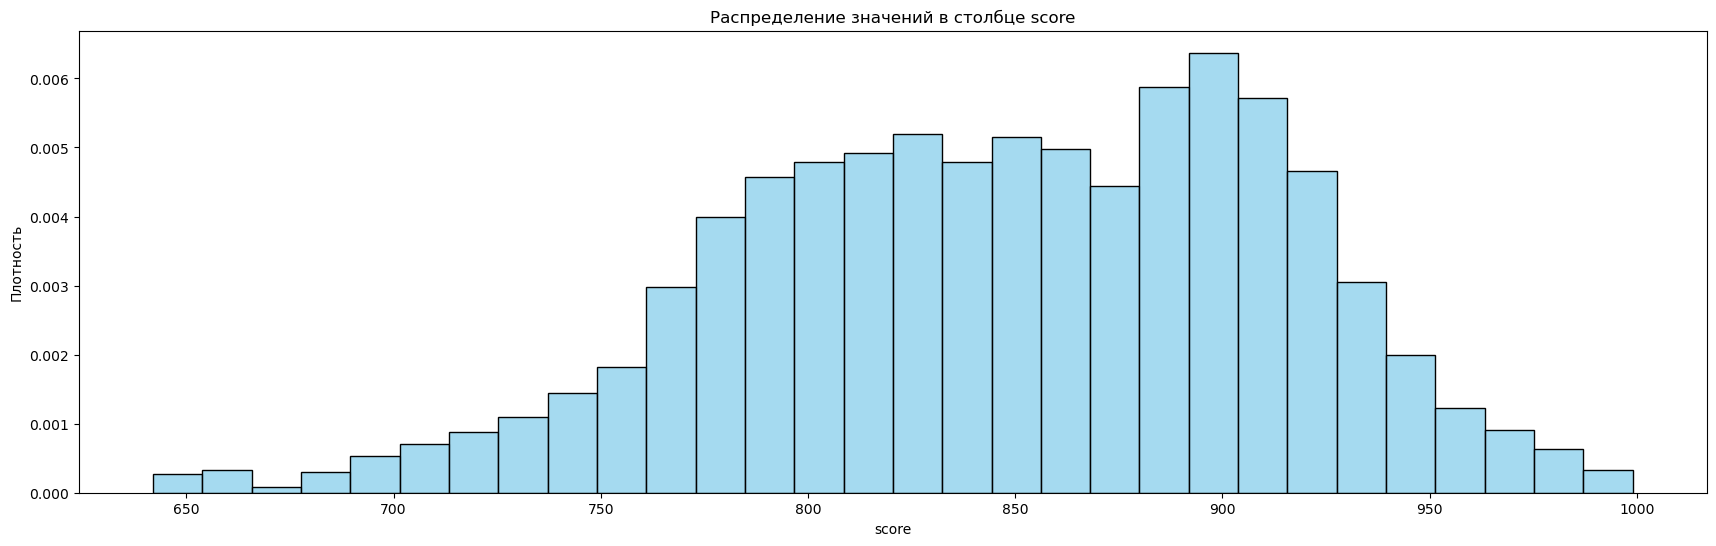

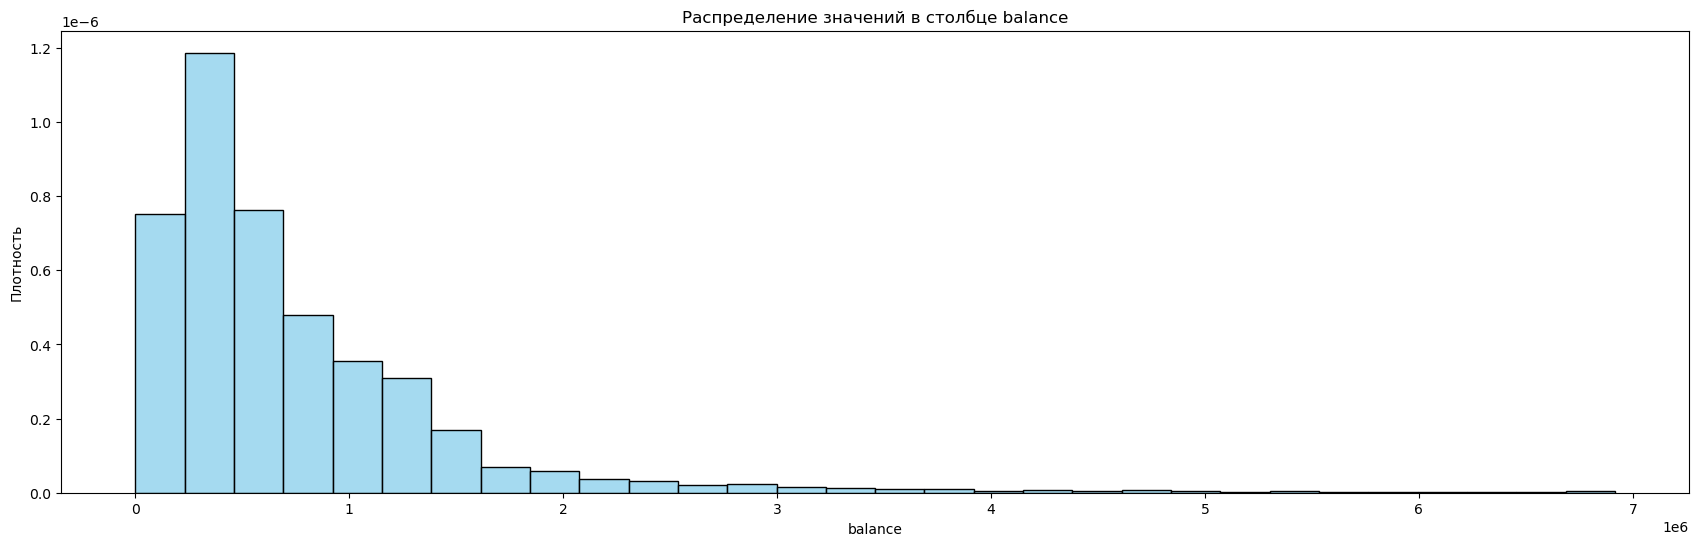

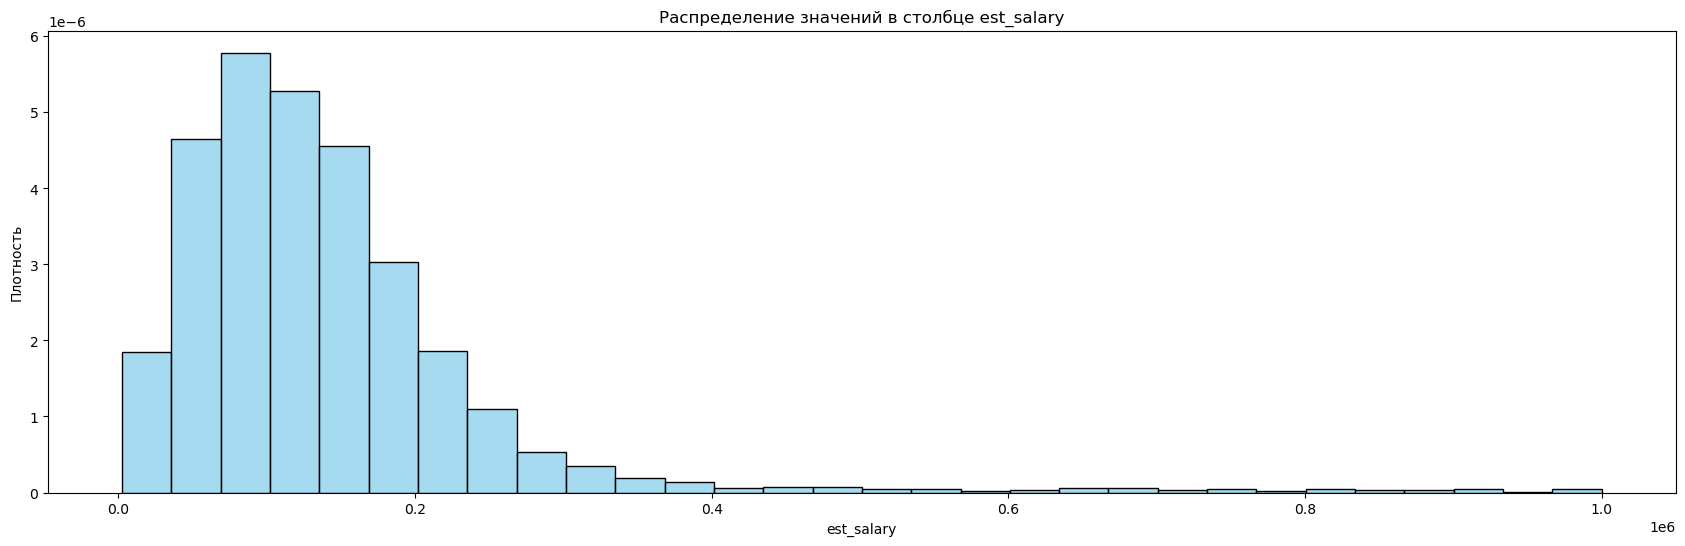

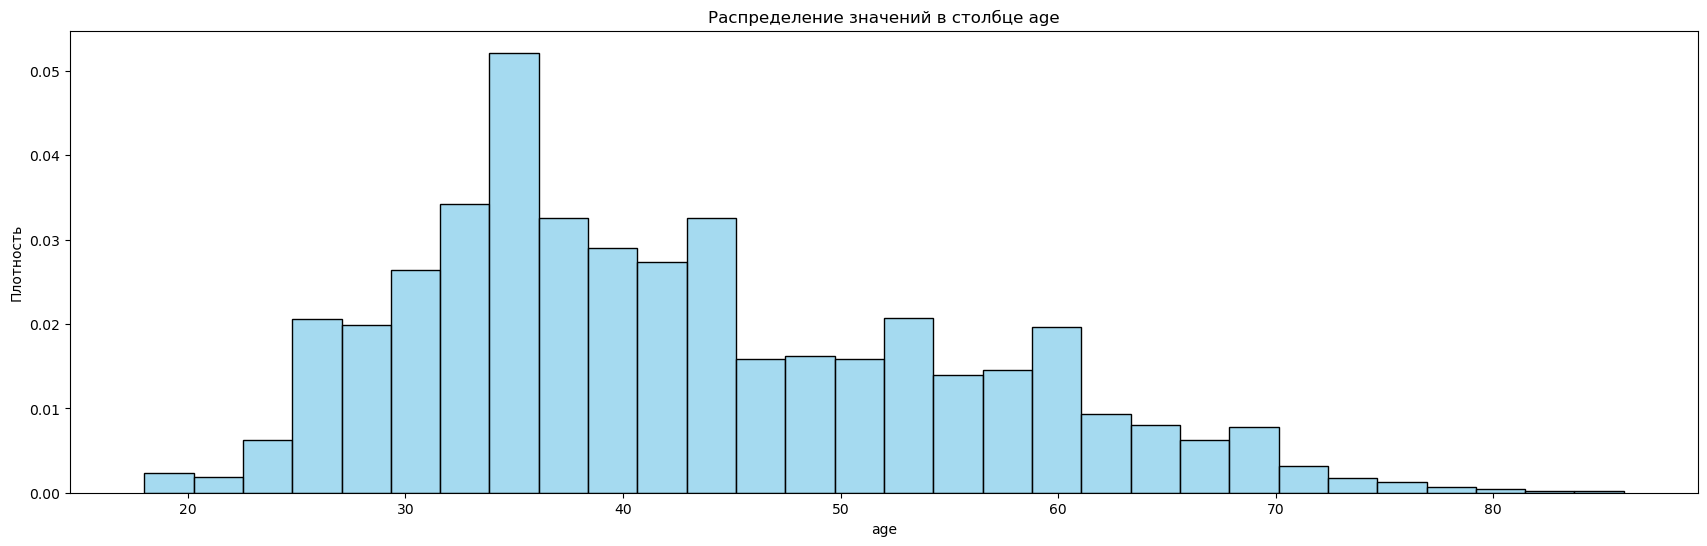

In [40]:
for n, i in enumerate(continious):
    data_count_plot = data[continious[n]]

    # Настройка размеров графика
    plt.figure(figsize=(21, 6))

    # Построение histplot с учетом всех параметров
    sns.histplot(data.loc[data[continious[n]] >= 0][continious[n]], bins=30, kde=False, \
                 color="skyblue", stat='density', common_norm=False)

    # Добавление заголовка и меток осей
    plt.title(f'Распределение значений в столбце {i}')
    plt.xlabel(i)  
    plt.ylabel('Плотность')

    # Отображение графика
    plt.show()

Распределение баллов кредитного скоринга приближено к нормальному, хотя нельзя утверждать что это 100% так. С балансом анологичная ситуация. Распределнеие дохода - Пуасоновское. Большое скопление наблюдений в левой части графика с длинным хвостом. 

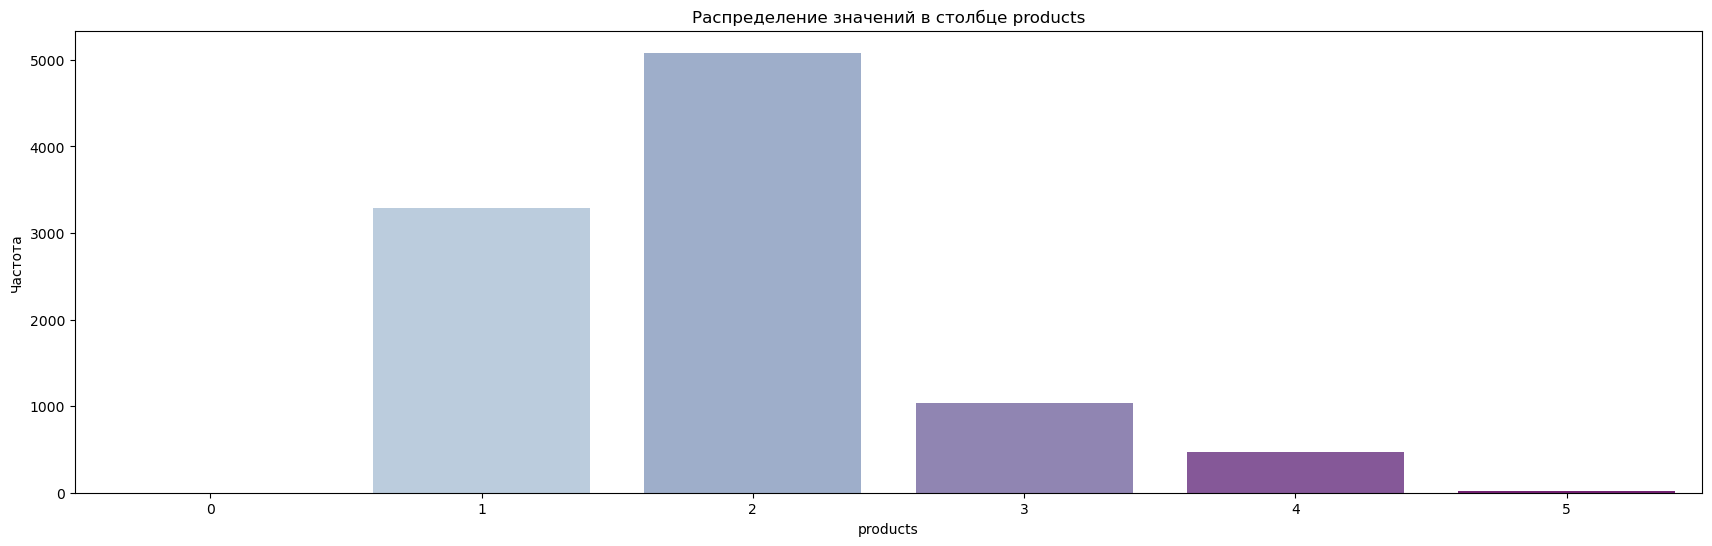

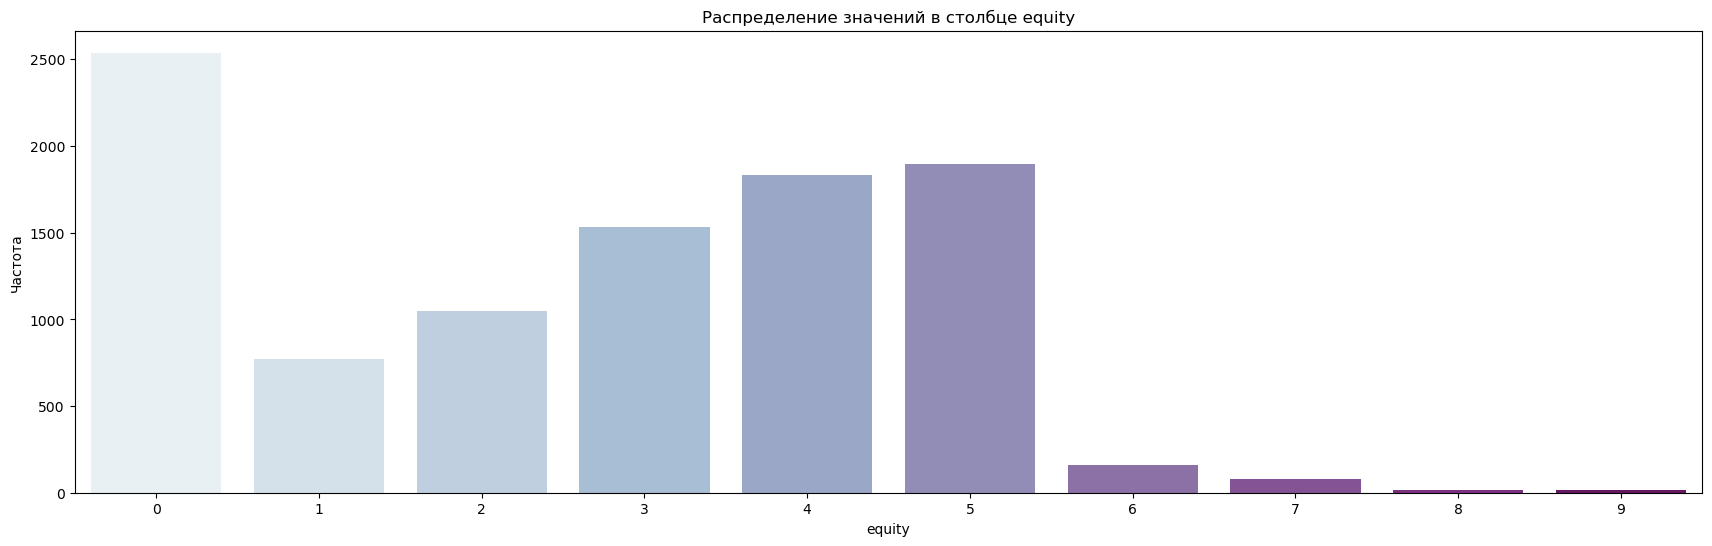

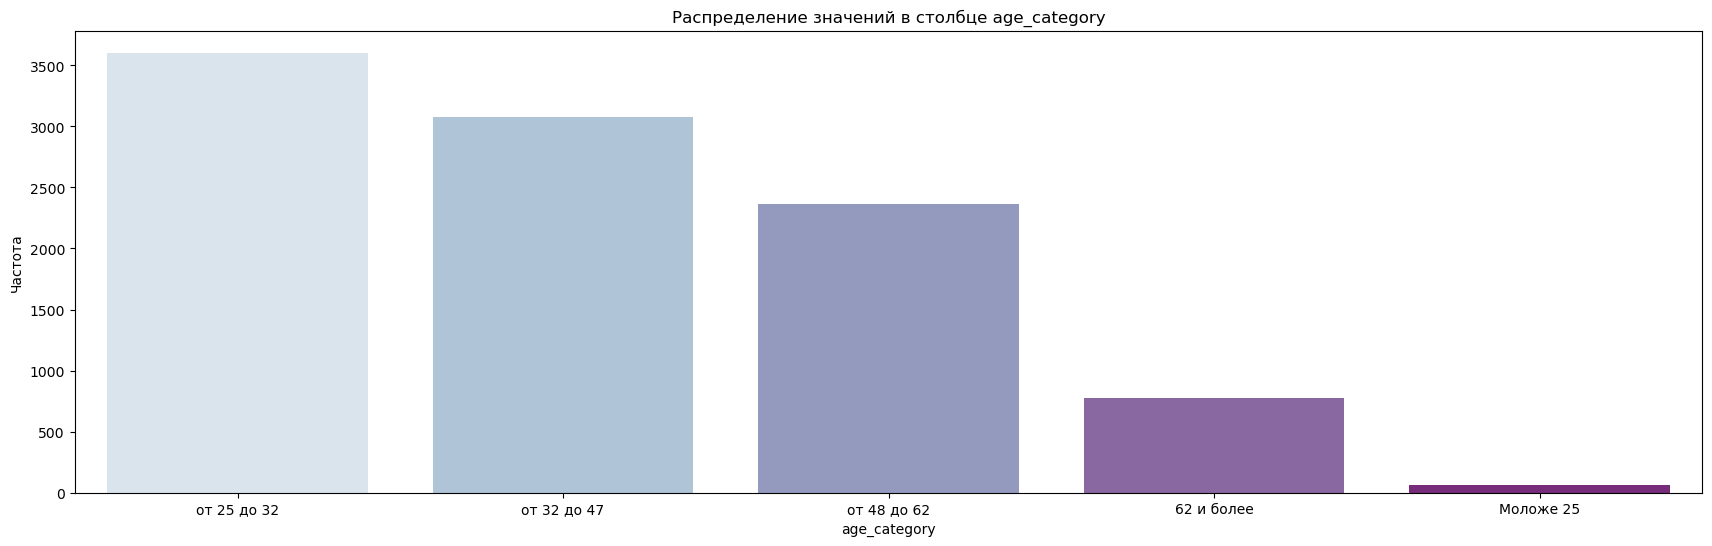

In [41]:
for n, i in enumerate(discrete):
    data_count_plot = data[discrete[n]]

    # Настройка размеров графика
    plt.figure(figsize=(21, 6))

    # Построение столбчатой диаграммы
    sns.countplot(x=data_count_plot, palette="BuPu")

    # Добавление заголовка и меток осей
    plt.title(f'Распределение значений в столбце {i}')
    plt.xlabel(i)  # Исправлено на i, так как это имя столбца
    plt.ylabel('Частота')

    # Отображение графика
    plt.show()

По баллам собственности также большое количество нулевых оценок. А вот количество используемых продуктов в большинстве случаев равняется двум. Самая популярная группа по возрасту - 25-32 года. 

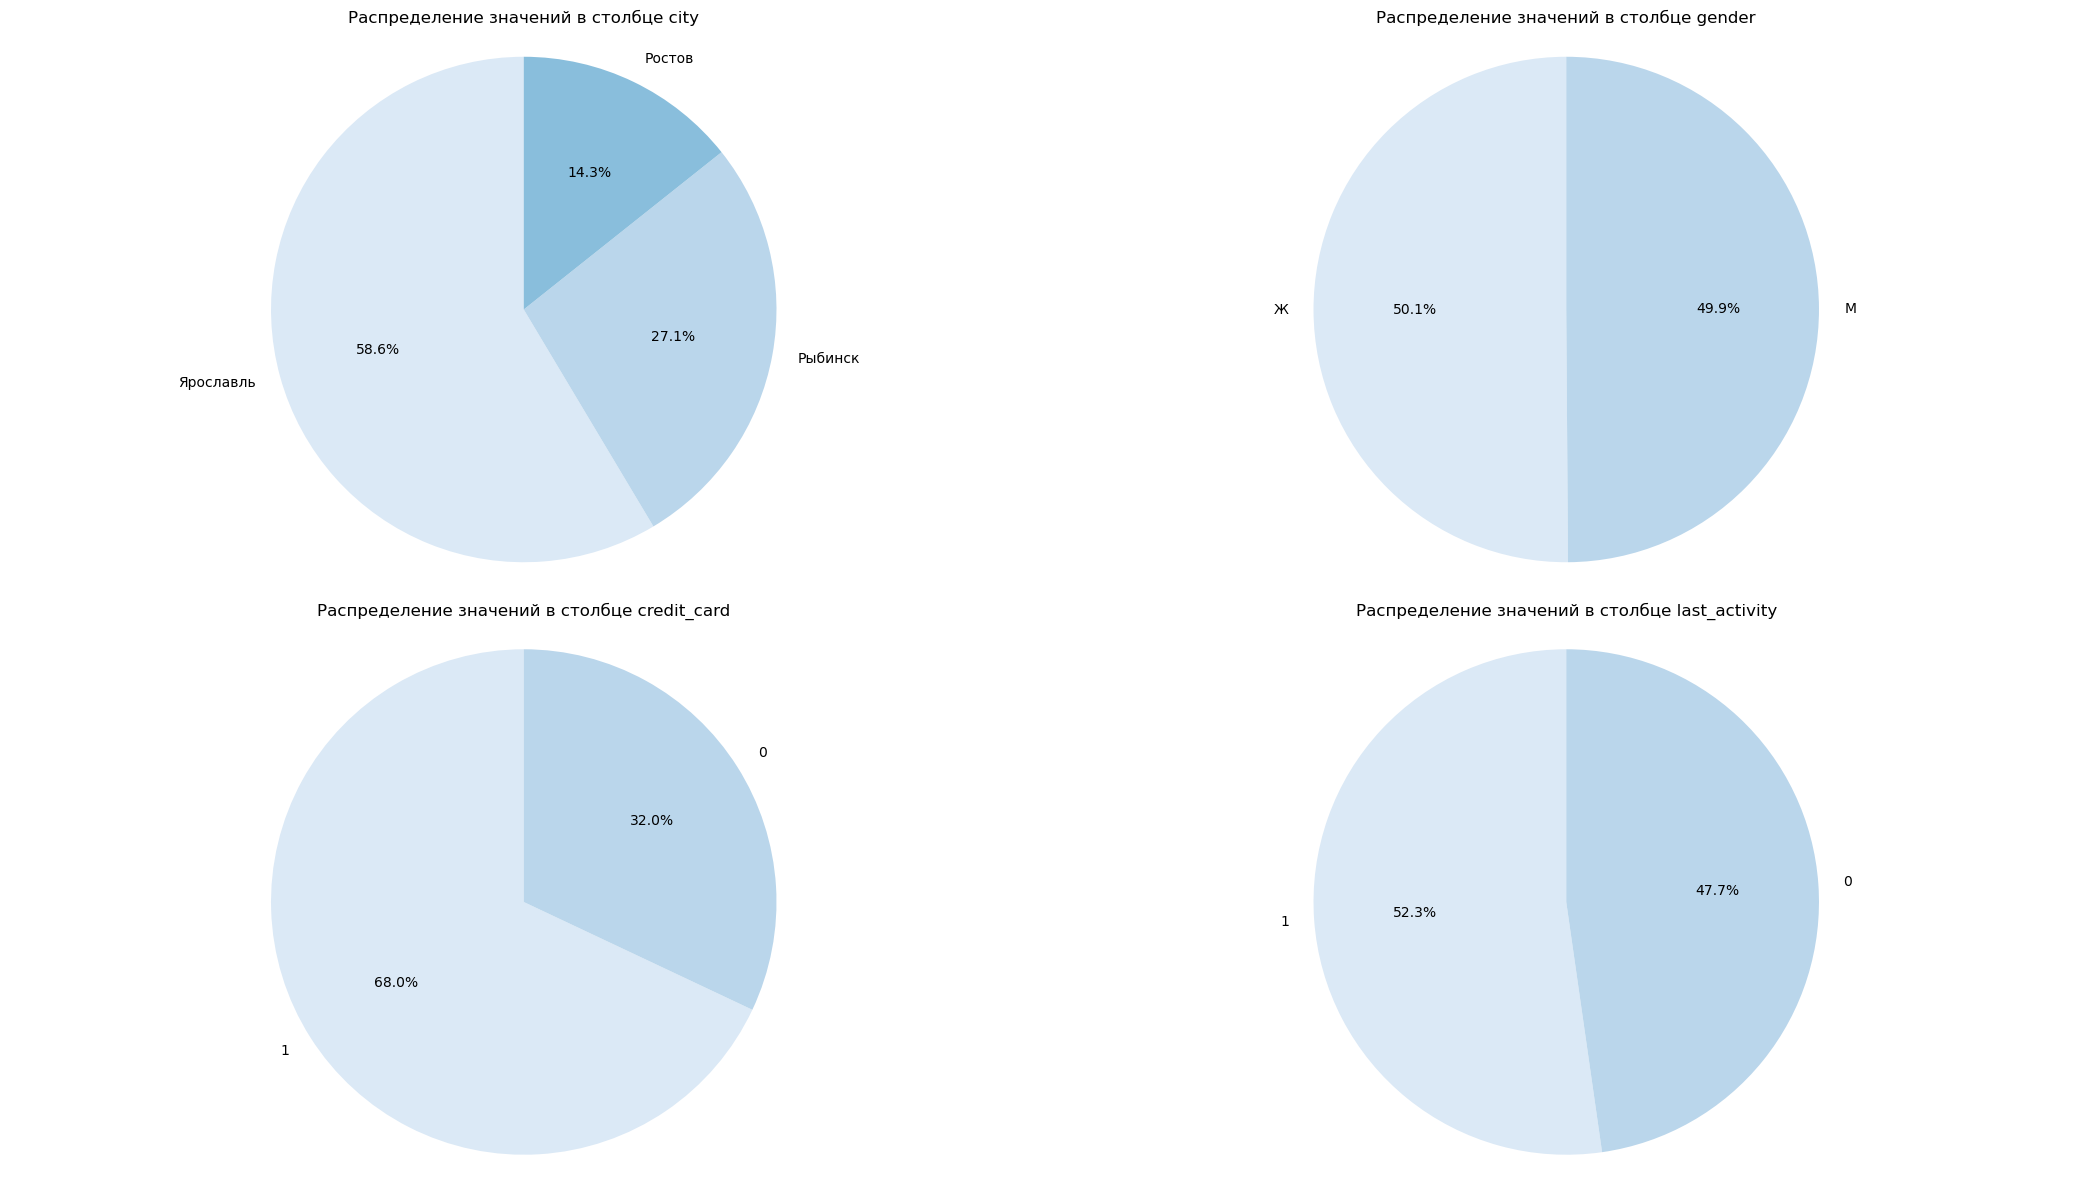

In [42]:
#Строим круговые диаграммы
fig, axs = plt.subplots(2, 2, figsize=(21, 12))  
for n, i in enumerate(category): 
    data_count_plot = data[category[n]]
    
    # Подсчёт количества каждого уникального значения
    value_counts = data_count_plot.value_counts()
    
    # Определяем, какой подграфик использовать
    row = n // 2
    col = n % 2
    

    if row < 2 and col < 2: 
        axs[row, col].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues"))  
        # Добавление заголовка и меток осей
        axs[row, col].set_title(f'Распределение значений в столбце {i}')
        axs[row, col].axis('equal')  

# Отображение графика
plt.tight_layout()  
plt.show()

Пол распределен равномерно, из городов наиболее популярен Ярославль, кредиткой пользуются 71% клиентов, и целых 47% клиентов не проявляли активность на протяжении определенного времени, что достаточно много.

Итак, произведен анализ распределений: Основная часть баллов кредитного скоринга в диапазоне от 700 до 950, оцениваемая зарплата в районе 100 тысяч руб. Из городов наиболее популярный - Ярославль. Наибольшее число пользователей используют 2 продукта банка. В слеующих блоках осуществим более детально сравнение.

### Определение отточных интервалов в разделе по непрерывным признакам

Сравним распределения непрерывных переменных в разрезе по отточному признаку: 

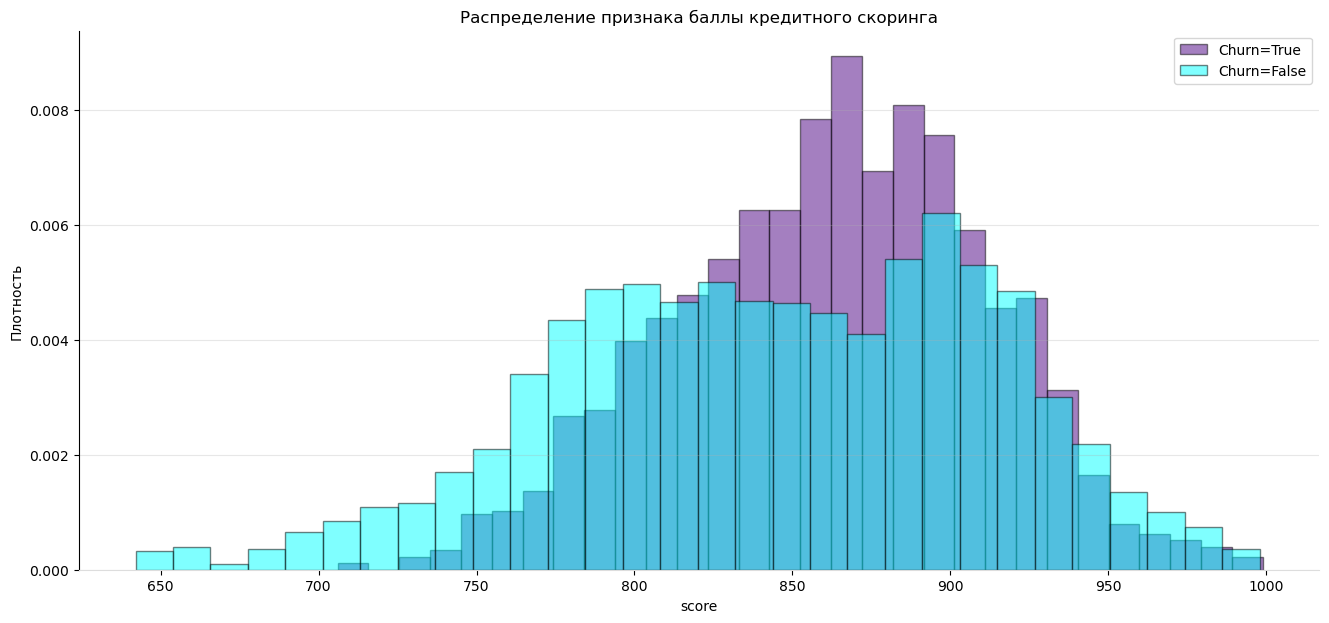

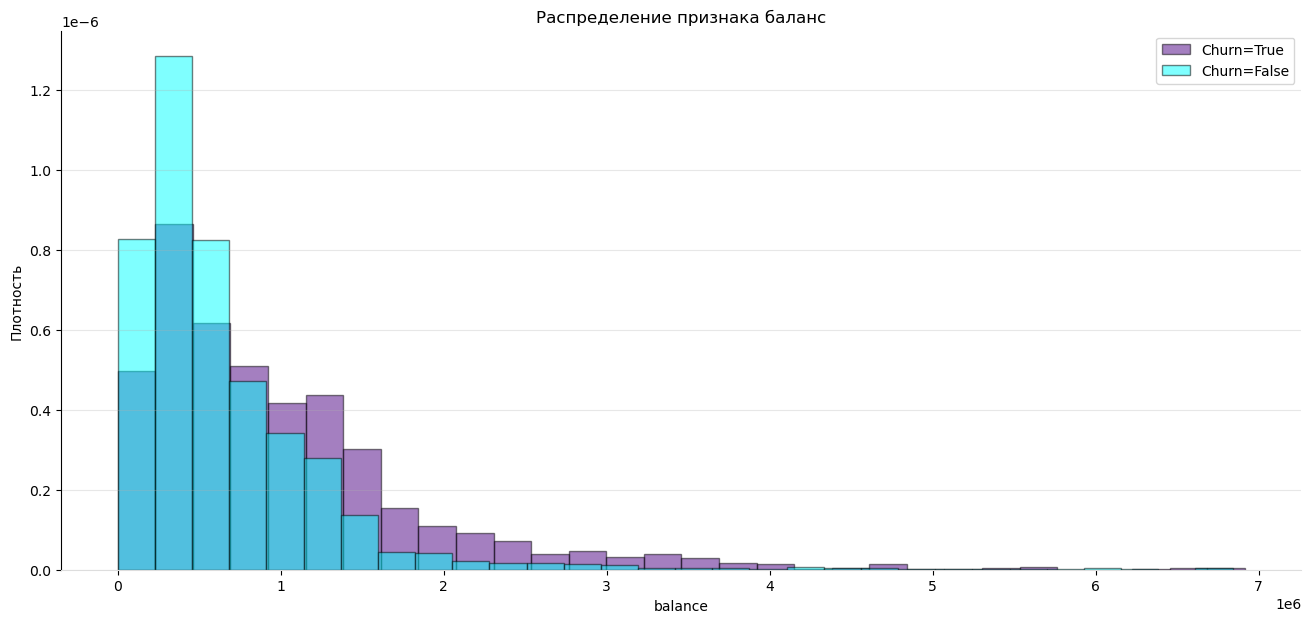

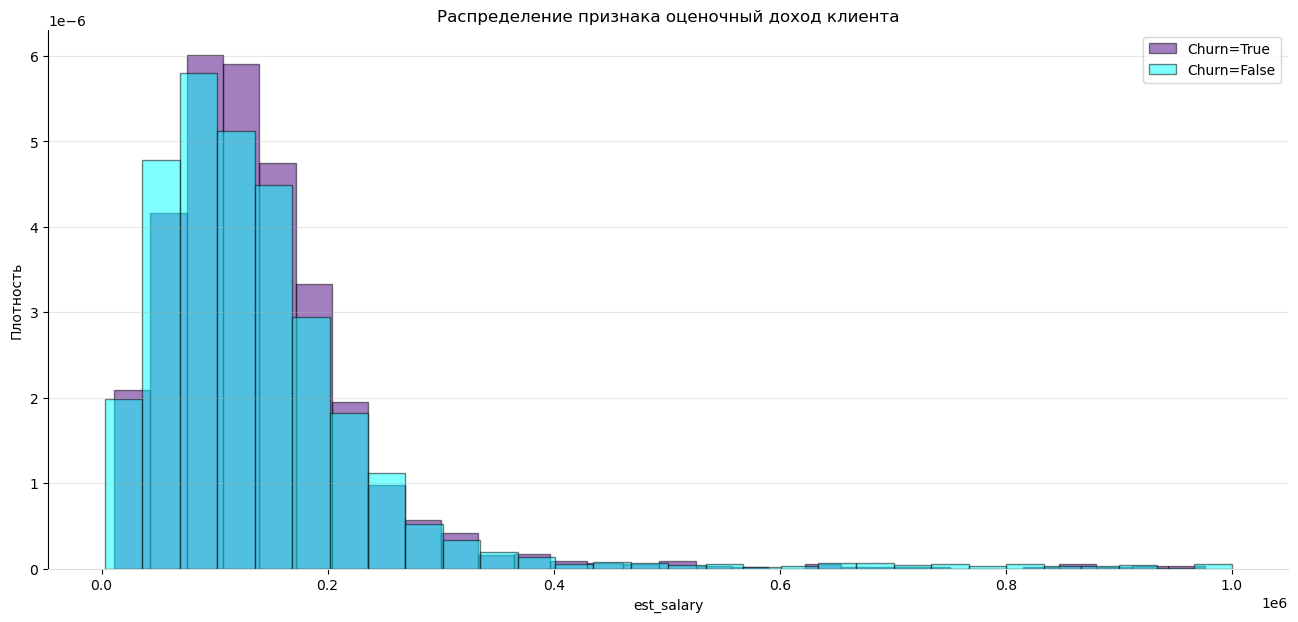

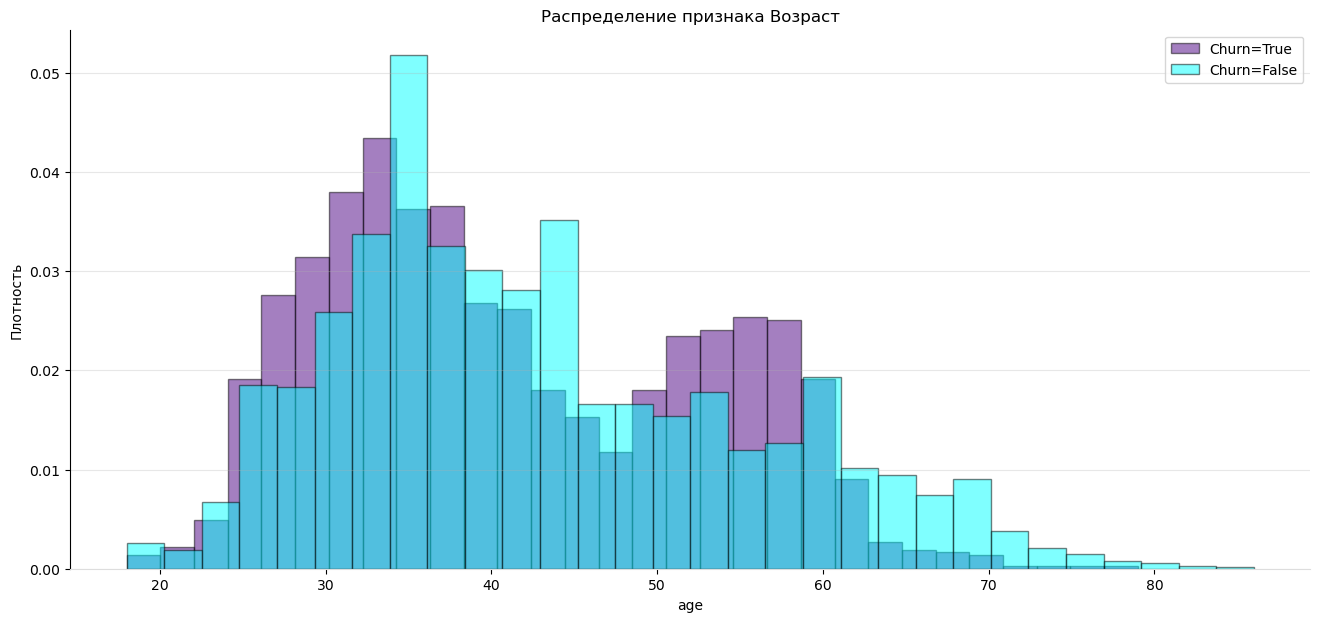

In [43]:
# Названия графиков
name = ['баллы кредитного скоринга', 'баланс', 'оценочный доход клиента', 'Возраст']

# Строим двойную гистограмму для поиска отточных интервалов
for i in range(len(continious)):
    fig, ax = plt.subplots(figsize=(16, 7))

    churn_true_data = data[data['churn'] == True]
    churn_false_data = data[data['churn'] == False]

    ax.hist(churn_true_data.loc[churn_true_data[continious[i]] >= 0][continious[i]], alpha=0.5, \
            label='Churn=True', color='indigo', bins=30, density=True, edgecolor='black')
    
    ax.hist(churn_false_data.loc[churn_false_data[continious[i]] >= 0][continious[i]], alpha=0.5, \
            label='Churn=False', color='cyan', bins=30, density=True, edgecolor='black')

    # Настройка заголовка, подписей осей и легенды
    ax.set_title(f"Распределение признака {name[i]}")
    ax.set_ylabel("Плотность")
    ax.set_xlabel(continious[i])
    ax.legend()
    
    ax.grid(axis='y', alpha=0.3)  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False) 
    ax.spines['bottom'].set_color('#dddddd') 


    plt.show()
    

Наиболее яркий отточный интервал наблюдается по такому признаку, как количество баллов скоринга. Клиенты банка, имеющие количество баллов в диапазоне от 800 до 900 практически в два раза более склонны к оттоку;

Также наблюдается повышенный отток среди клиентов с балансом, привышающим 800 тыс. руб;

Большая часть клиентов в возрасте 24-35 и 50-60 лет активно уходит из банка;

По предпологаемому доходу сложно сделать выводы, рассмотрим график более детально: 

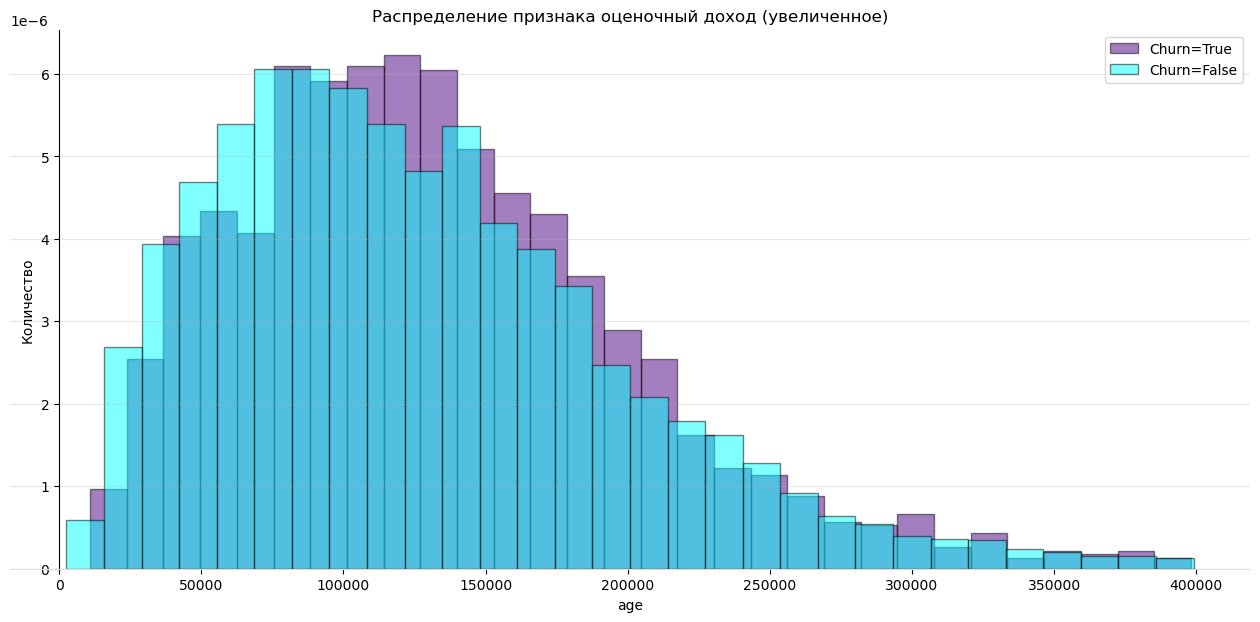

In [44]:
fig, ax = plt.subplots(figsize=(16, 7))

churn_true_data = data[data['churn'] == True]
churn_false_data = data[data['churn'] == False]

# Гистограмма для истинных случаев
ax.hist(churn_true_data.query('est_salary < 400000')['est_salary'], alpha=0.5, label='Churn=True', color='indigo', \
        bins=30, density=True, edgecolor='black')

# Гистограмма для ложных случаев
ax.hist(churn_false_data.query('est_salary < 400000')['est_salary'], alpha=0.5, label='Churn=False', color='cyan', \
        bins=30, density=True, edgecolor='black')

# Настройка заголовка, подписей осей и легенды
ax.set_title(f"Распределение признака оценочный доход (увеличенное)")
ax.set_ylabel("Количество")
ax.set_xlabel(continious[i])
ax.legend()

ax.grid(axis='y', alpha=0.3) 
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)  
ax.spines['left'].set_position('zero')  
ax.spines['bottom'].set_color('#dddddd')  

plt.show()

Хотя данное наблюдение и не ярко выражено, по графику можно увидеть, что люди с доходом до 140 тыс. руб. с большей вероятностью склонны покидать банк 

Таким образом в качества отточных интервалов можно выделить: 
    
    1) Пользователей с баллами кредитного скоринга от 800 до 900;
    2) Пользователей с балансом выше 800 тыс. руб;
    3) Пользователей с оценочным доходом до 140 тыс. руб
    4) Пользователи в возрасте от 47 до 60, и в возрасте 25-30 лет

### Определение значений признаков, наиболее склонных к оттоку

Определим отточные категории клиентов, сравнив данные в разрезе оттока по дискретным и категориальным признакам.

*Для начала проверим количество наблюдений по каждой из переменных:*

In [45]:
print('Количество наблюдений по каждому из значений переменной:')
print()
for d in discrete:
    unique_values = set(data[d])
    for value in unique_values:
        count = len(data[data[d] == value])
        print(f'Столбец: {d}, Значение: {value}, Количество наблюдений: {count}')
    print()

Количество наблюдений по каждому из значений переменной:

Столбец: products, Значение: 0, Количество наблюдений: 1
Столбец: products, Значение: 1, Количество наблюдений: 3287
Столбец: products, Значение: 2, Количество наблюдений: 5083
Столбец: products, Значение: 3, Количество наблюдений: 1031
Столбец: products, Значение: 4, Количество наблюдений: 469
Столбец: products, Значение: 5, Количество наблюдений: 19

Столбец: equity, Значение: 0, Количество наблюдений: 2537
Столбец: equity, Значение: 1, Количество наблюдений: 773
Столбец: equity, Значение: 2, Количество наблюдений: 1050
Столбец: equity, Значение: 3, Количество наблюдений: 1534
Столбец: equity, Значение: 4, Количество наблюдений: 1833
Столбец: equity, Значение: 5, Количество наблюдений: 1894
Столбец: equity, Значение: 6, Количество наблюдений: 160
Столбец: equity, Значение: 7, Количество наблюдений: 79
Столбец: equity, Значение: 8, Количество наблюдений: 17
Столбец: equity, Значение: 9, Количество наблюдений: 13

Столбец: age_c

+ Сталкиваемся с тем, что по количеству используемых продуктов значение 0 наблюдается всего один раз, всязи с чем его можно просто исключить;
+ C баллами собственности: очень мало наблюдений в последних 3х значениях - их объединим.
+ Возраст разделён на 4 категории

In [46]:
data_agr = data.loc[data['products'] != 0].copy()
data_agr.loc[data_agr['equity'] >= 7, 'equity'] = '7 и более'

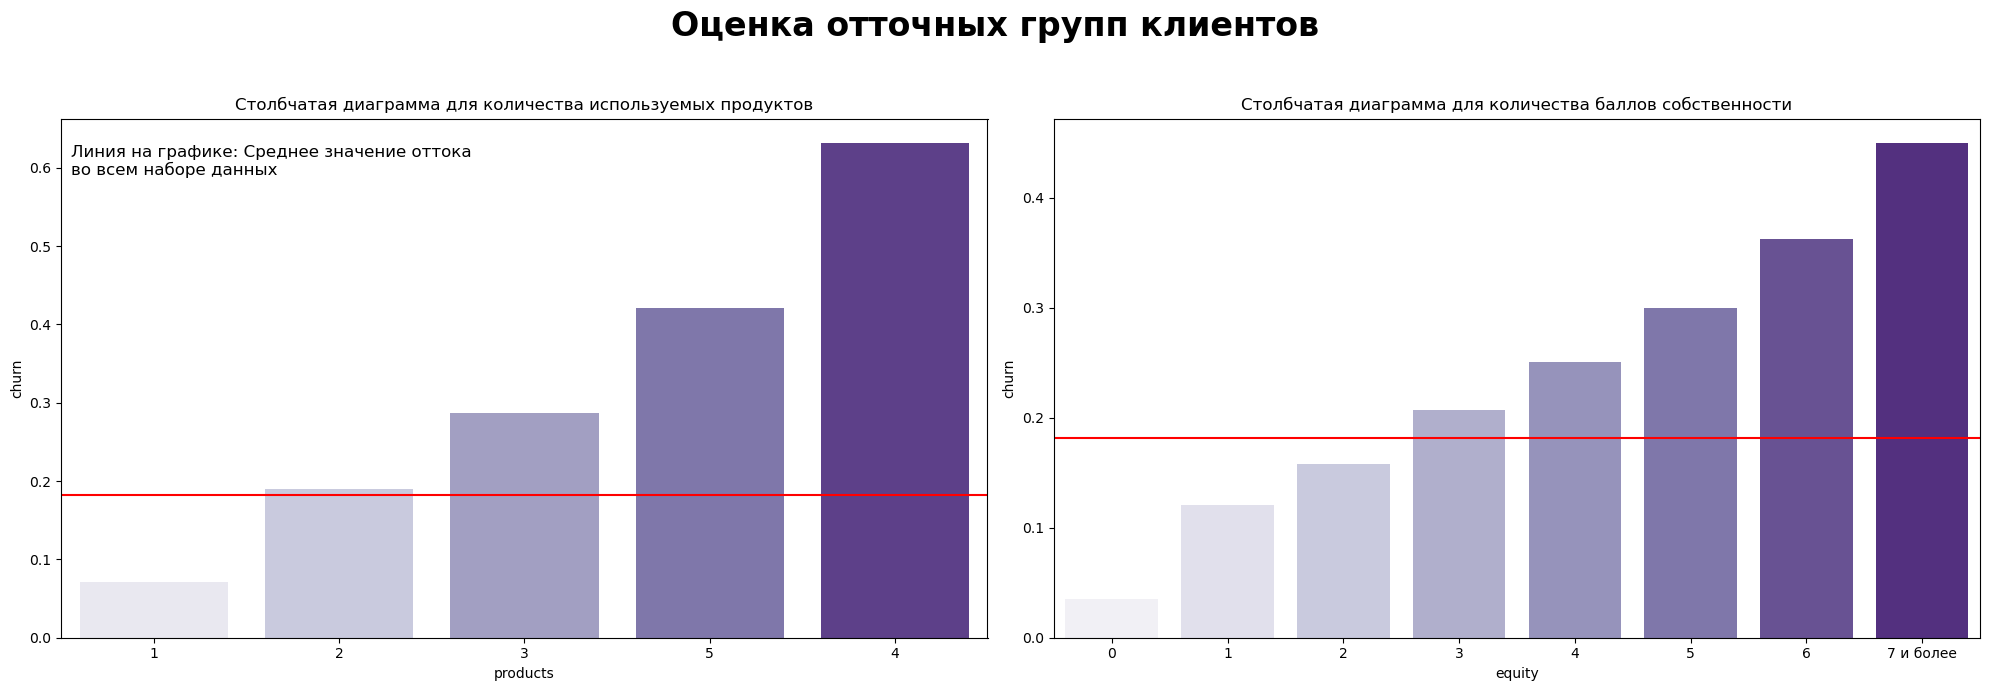

In [47]:
mean_churn = data_agr['churn'].mean()

#Готовим отсортированные сводные таблицы гдля графиклв 
data_1 =  data_agr.groupby(discrete[0]).agg({'churn':'mean'}).reset_index().sort_values(by='churn')
data_2 =  data_agr.groupby(discrete[1]).agg({'churn':'mean'}).reset_index().sort_values(by='churn')
#Задаем цвета
sns.set_palette("Purples")

#Сторим графики
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
fig.suptitle('Оценка отточных групп клиентов' + '\n', \
             fontsize=24, fontweight='bold')

sns.barplot(x=data_1[discrete[0]], y=data_1['churn'], ax=axes[0], order=list(data_1[discrete[0]]), palette="Purples")
axes[0].set_title(f'Столбчатая диаграмма для количества используемых продуктов')
axes[0].axhline(y=mean_churn, color='r', linestyle='-')
axes[0].text(0.01, 0.95, 'Линия на графике: Среднее значение оттока\nво всем наборе данных', transform=axes[0].transAxes, fontsize=12, va='top')

sns.barplot(x=data_2[discrete[1]], y=data_2['churn'], ax=axes[1], order=list(data_2[discrete[1]]), palette="Purples")
axes[1].set_title(f'Столбчатая диаграмма для количества баллов собственности')
axes[1].axhline(y=mean_churn, color='r', linestyle='-')
#axes[1].text(0.01, 0.95, 'Линия: Среднее значение оттока\nво всем наборе данных', transform=axes[1].transAxes, fontsize=12, va='top')

plt.tight_layout()
plt.show()

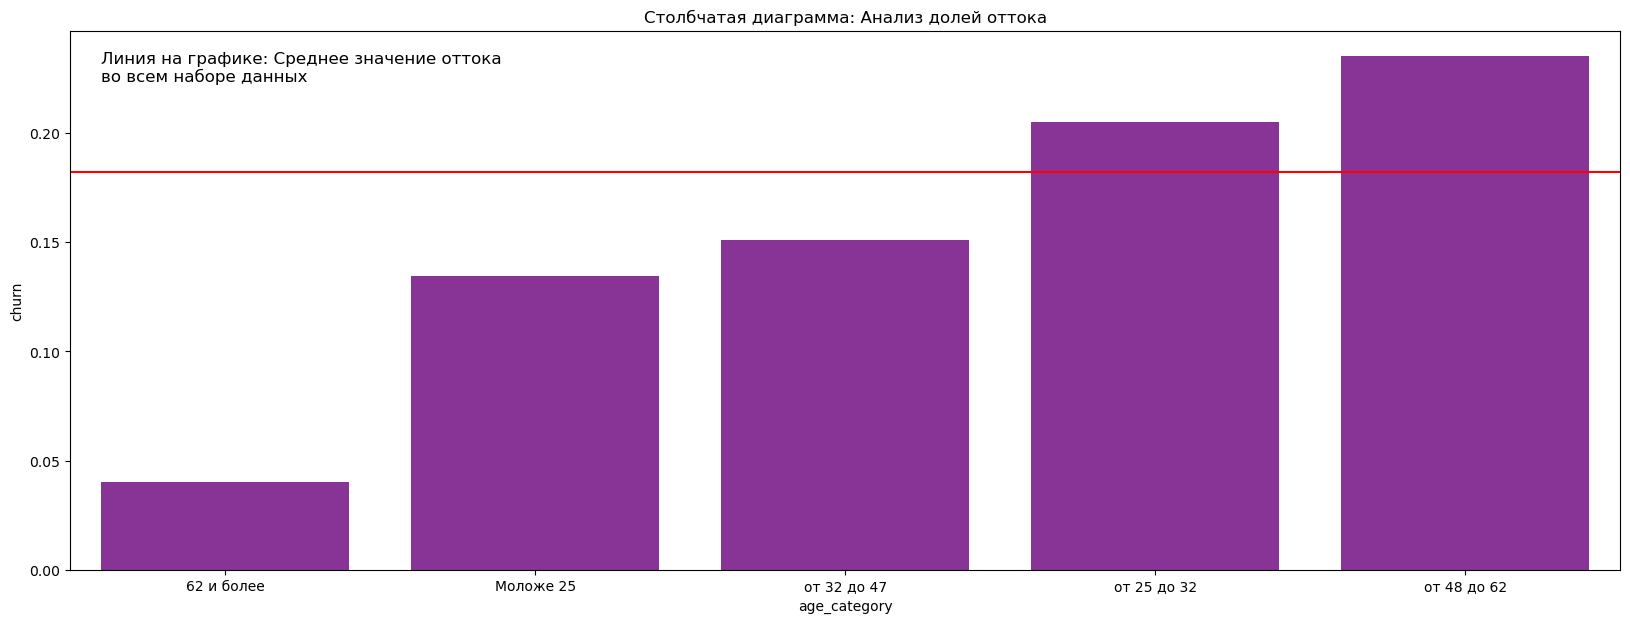

In [48]:
data_3 =  data_agr.groupby(discrete[2]).agg({'churn':'mean'}).reset_index().sort_values(by='churn')

#Сторим графики по возросту
fig, axes = plt.subplots(figsize=(20, 7))

sns.barplot(x=data_3[discrete[2]], y=data_3['churn'], color='#9224A6')
axes.set_title(f'Столбчатая диаграмма: Анализ долей оттока')
axes.axhline(y=mean_churn, color='r', linestyle='-')
x_text, y_text = 0.02, 0.9  
axes.text(x_text, y_text, 'Линия на графике: Среднее значение оттока\nво всем наборе данных',\
          fontsize=12, ha='left', va='bottom', transform=axes.transAxes)

plt.show()

**Итак:**
+ Что очень интересно, повышенный отток прослеживается среди клиентов, владеющих 4 и 3 продуктами, что довольно не обычно, потому что казалось бы такие клиенты должны проявлять повышенную активность...;
+ Клиенты с одним используемым продуктом наиболее стабильны;
+ Что касается баллов собственности, то тут также наблюдается очень странная и очень важная тенденция: практически упорядочено с ростом баллов собственности ростет доля отточности. 

In [49]:
print('Количество наблюдений по каждому из значений переменной:')
print()
for d in category:
    unique_values = set(data[d])
    for value in unique_values:
        count = len(data[data[d] == value])
        print(f'Столбец: {d}, Значение: {value}, Количество наблюдений: {count}')
    print()

Количество наблюдений по каждому из значений переменной:

Столбец: city, Значение: Ростов, Количество наблюдений: 1415
Столбец: city, Значение: Рыбинск, Количество наблюдений: 2682
Столбец: city, Значение: Ярославль, Количество наблюдений: 5793

Столбец: gender, Значение: М, Количество наблюдений: 4934
Столбец: gender, Значение: Ж, Количество наблюдений: 4956

Столбец: credit_card, Значение: 0, Количество наблюдений: 3166
Столбец: credit_card, Значение: 1, Количество наблюдений: 6724

Столбец: last_activity, Значение: 0, Количество наблюдений: 4721
Столбец: last_activity, Значение: 1, Количество наблюдений: 5169



Тут с количеством значений все прекрасно, ничего агрегировать не нужно!

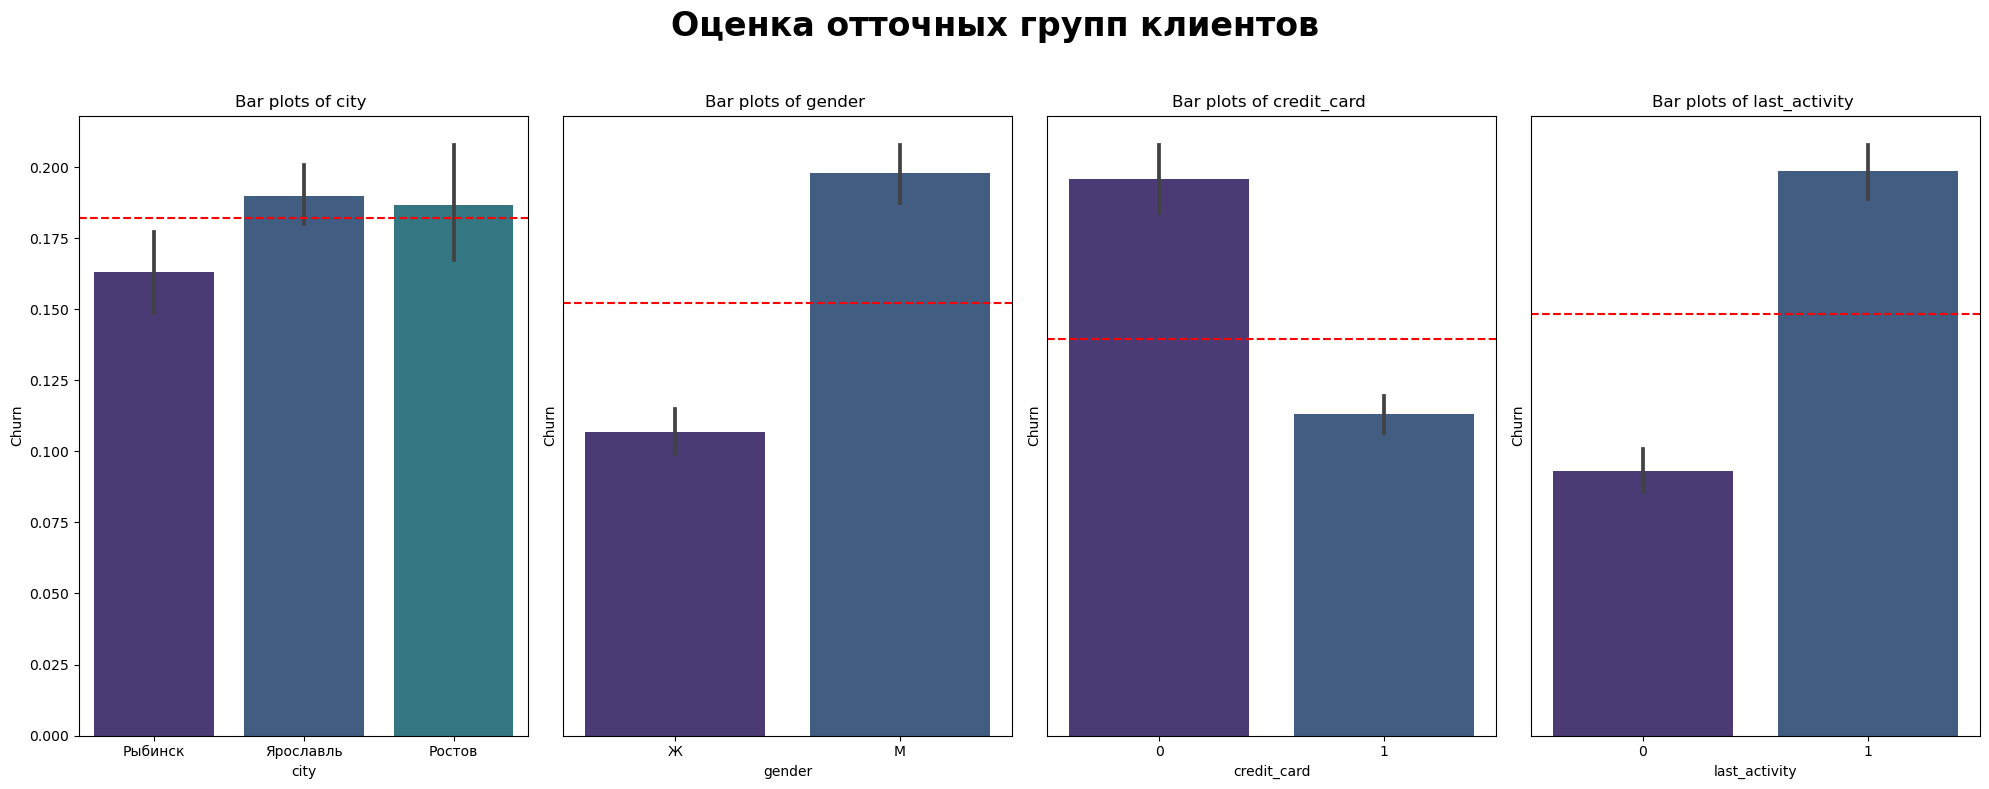

In [50]:
n_columns = len(category)  # Количество столбцов в категории
fig, axs = plt.subplots(nrows=1, ncols=n_columns, figsize=(20, 8))  

fig.suptitle('Оценка отточных групп клиентов' + '\n', \
             fontsize=24, fontweight='bold')

#Цвета для графиков 
sns.set_palette("viridis")

for i, column in enumerate(category):
    # Рассчитываем среднее значение churn 
    mean_churn = data['churn'].mean()
    
    # Строим график в соответствующем подграфике
    sns.barplot(x=column, y='churn', data=data, ax=axs[i])
    
    # Добавляем горизонтальную линию с средним значением churn
    axs[i].axhline(y=mean_churn, color='r', linestyle='--')
    
    # Добавляем заголовок и метки осей для первого графика
    axs[i].set_title(f'Bar plots of {column} ')
    axs[i].set_xlabel(category[i])  # Заголовок оси X общий для всех графиков
    axs[i].set_ylabel('Churn')  
    
    # Убираем верхние и правые границы подграфиков, кроме первого
    if i > 0:
        axs[i].tick_params(axis='both', left=False, top=False, labelleft=False, labeltop=False)


plt.tight_layout() 
plt.show()

**Таким образом:** отточный разрез по категориальным данным демонстрирует следующую картину: в группировке по городам **более всего склонны к оттоку клиенты из Ростова**, касаемо полов, **мужчины аж в полтора раза часще покидают банк**, ну и что в целом логично, **клиенты, не проявлявшие активность за определенный промежуток времени также склонны к уходу из банка**.

### Анализ портрета клиентов в разрезе оттока

Для начала создадим список со всеми переменными, по которым производится оценка отточности. Далее по этому списку составим сводную таблицу, по которой можно будет сделать вывод о портрете отточно клиента. 

In [51]:
sings = continious + discrete + category
print(f'Переменные для анализа портрета: {sings}')

Переменные для анализа портрета: ['score', 'balance', 'est_salary', 'age', 'products', 'equity', 'age_category', 'city', 'gender', 'credit_card', 'last_activity']


In [52]:
data_agr['est_salary_med'] = data_agr['est_salary']
data_agr['products_med'] = data_agr['products']

rate = data_agr.groupby('churn').agg({
    'score': 'mean',
    'balance': 'mean',
    'est_salary': 'mean',
    'est_salary_med': 'median',
    'products': 'mean',
    'products_med': 'median',
    'equity': lambda x: x.mode()[0] if not x.empty else None,
    'city': lambda x: x.mode()[0] if not x.empty else None,
    'gender': lambda x: x.mode()[0] if not x.empty else None,
    'credit_card':'mean',
    'last_activity':'mean'
    
})


rate = rate.T
rate = rate.rename(columns={1:'Отточный клиент', 0:'Не отточный клиент'})

In [53]:
#Функция для заполнения нового столбца
def difference_if_numeric(row):
    try:
        num_value = float(row['Отточный клиент'])
        if row['Не отточный клиент'] == 0:
            return 5
    
        return (num_value - row['Не отточный клиент'])/row['Не отточный клиент']*100
    
    except ValueError:
        return 0
    
rate['Относительная разница'] = rate.apply(difference_if_numeric, axis=1)
rate.loc['city':'gender', 'Относительная разница'] = 'X'

In [54]:
# Увеличиваем ширину столбцов 
def increase_width(width):
    return [{'selector': 'th', 'props': [('width', f'{width}px')]}]
rate_view = rate.style.set_table_styles(increase_width(300))

#Добавляем столбец
rate_view

churn,Не отточный клиент,Отточный клиент,Относительная разница
score,845.022500,862.485556,2.066579
balance,478661.779104,1004469.722578,109.849578
est_salary,140602.886191,141755.212378,0.819561
est_salary_med,117419.240000,124757.590000,6.249700
products,1.760045,2.377778,35.097594
products_med,2.000000,2.000000,0.000000
equity,0,5,5.000000
city,Ярославль,Ярославль,X
gender,Ж,М,X
credit_card,0.708493,0.551667,-22.135200


По некоторым наиболее интересным переменным также представим портрет отточного пользователя на круговых диаграммах:

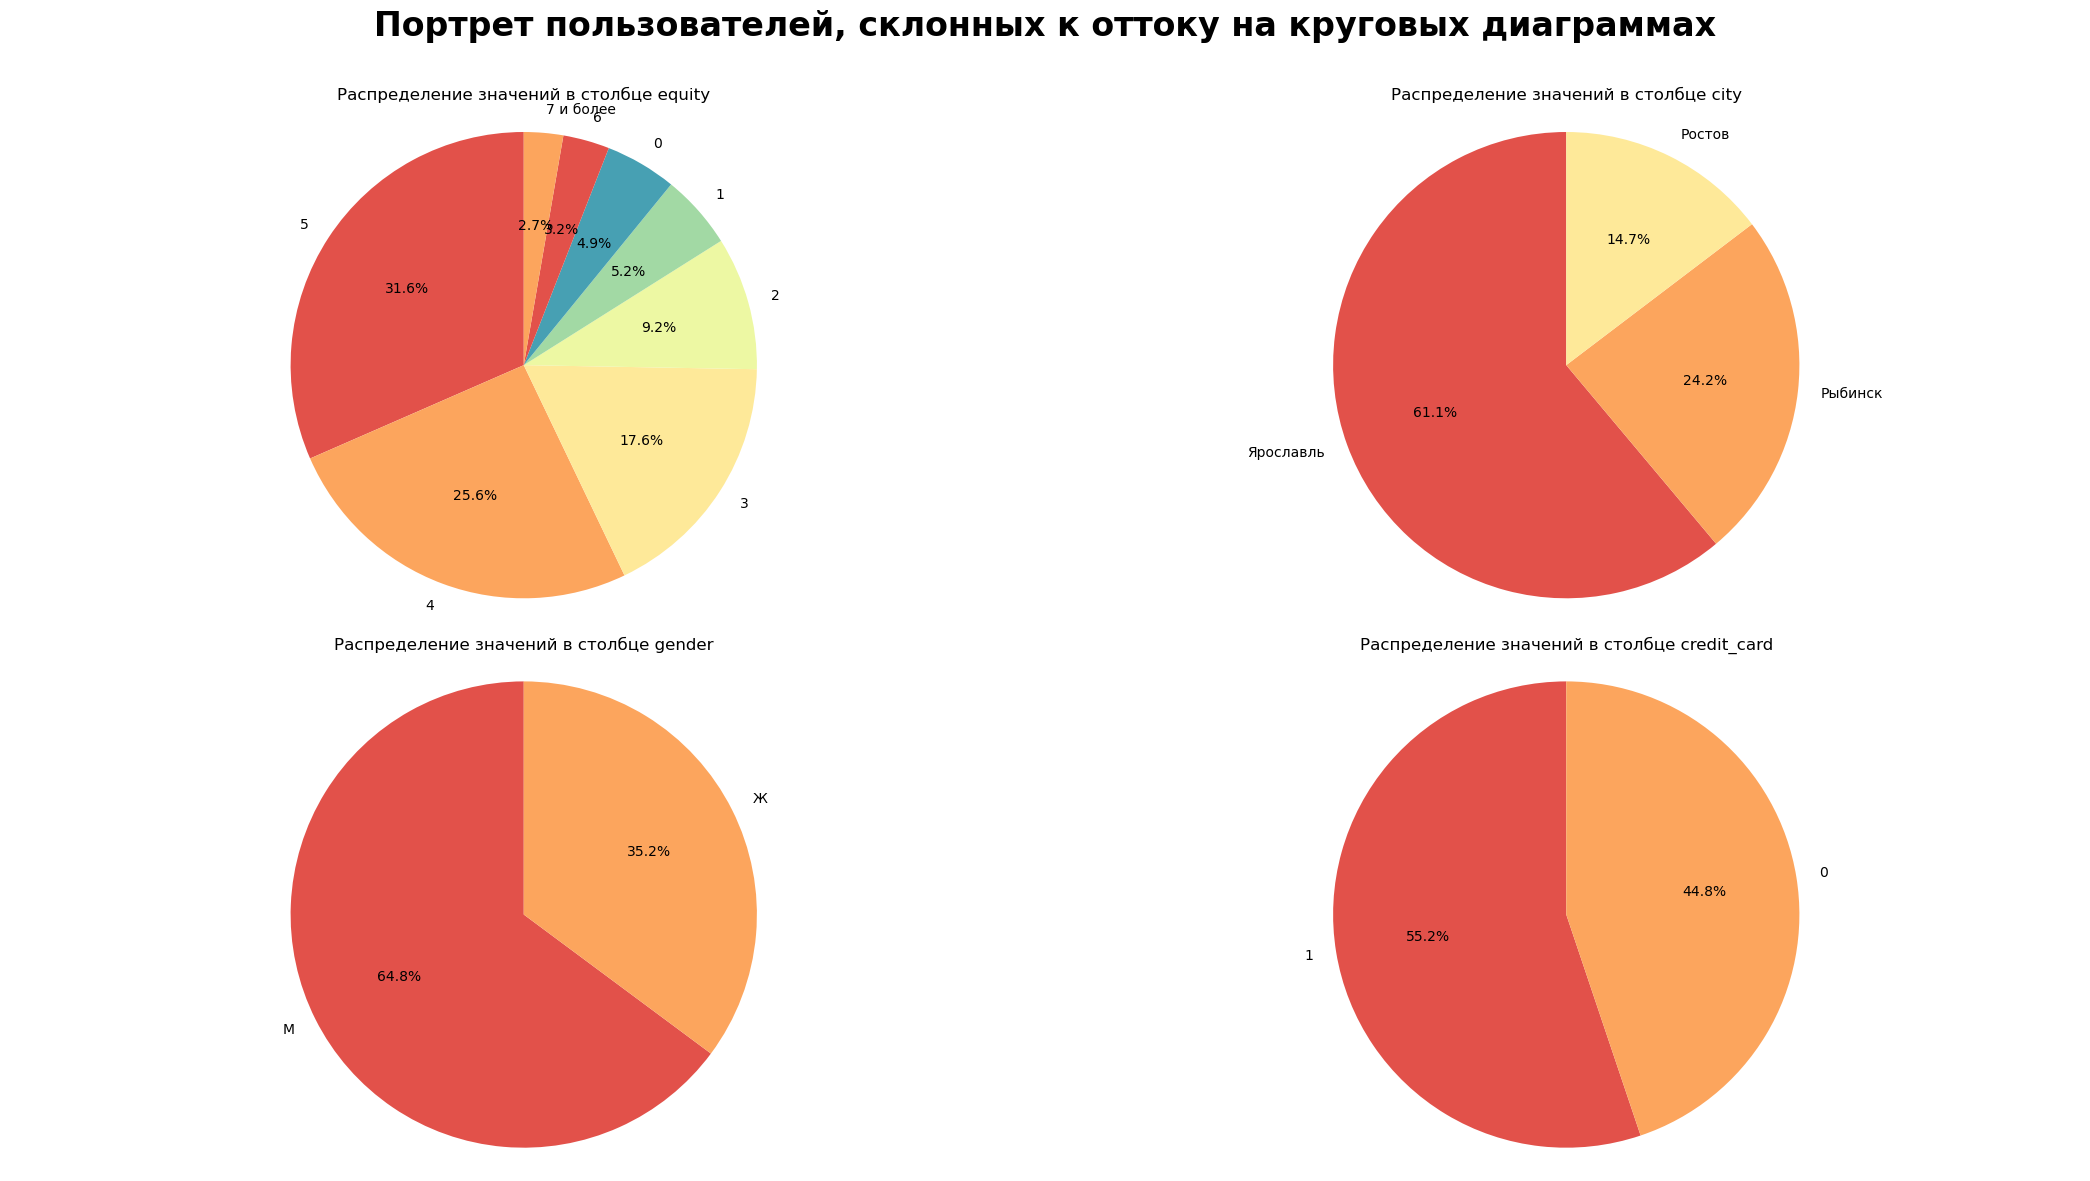

In [55]:
value_list = ['equity', 'city', 'gender', 'credit_card']
fig, axs = plt.subplots(2, 2, figsize=(21, 12))
fig.suptitle('Портрет пользователей, склонных к оттоку на круговых диаграммах' + '\n', \
             fontsize=24, fontweight='bold')

#Создаем таблицу для посторения диаграм
for_pie = data_agr.query('churn==1')

for n, value in enumerate(value_list):
    data_count_plot = for_pie[value_list[n]]
    
    # Подсчёт количества каждого уникального значени
    value_counts = data_count_plot.value_counts()
    # Определяем, какой подграфик использовать
    row = n // 2
    col = n % 2
    # Проверяем, существует ли подграфик для текущего индекса
    if row < 2 and col < 2: 
        # Построение круговой диаграммы на соответствующем подграфике
        axs[row, col].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90,\
                          colors=sns.color_palette("Spectral"))
        
        # Добавление заголовка и меток осей
        axs[row, col].set_title(f'Распределение значений в столбце {value}')
        axs[row, col].axis('equal')  
        
# Отображение графика
plt.tight_layout()  
plt.show()



**Таким образом портрет клиента склонного к оттоку может быть предстаавлен следующим образом:**

    1) Мужчина
    2) В возростах 22-36 или 48-62 лет 
    3) Из Ярославля 
    4) Довольно активный 
    5) Со средним количеством баллов кредитного скоринга 862
    6) С балансом 1004469 руб.
    7) С медианной зарплатой 124757 руб.
    8) Без кредитной карты 
    9) С количеством используемых продуктов - 2
    10) С количеством баллов собственности - 5
   

Также рассмотрим партрет лояльного клиента

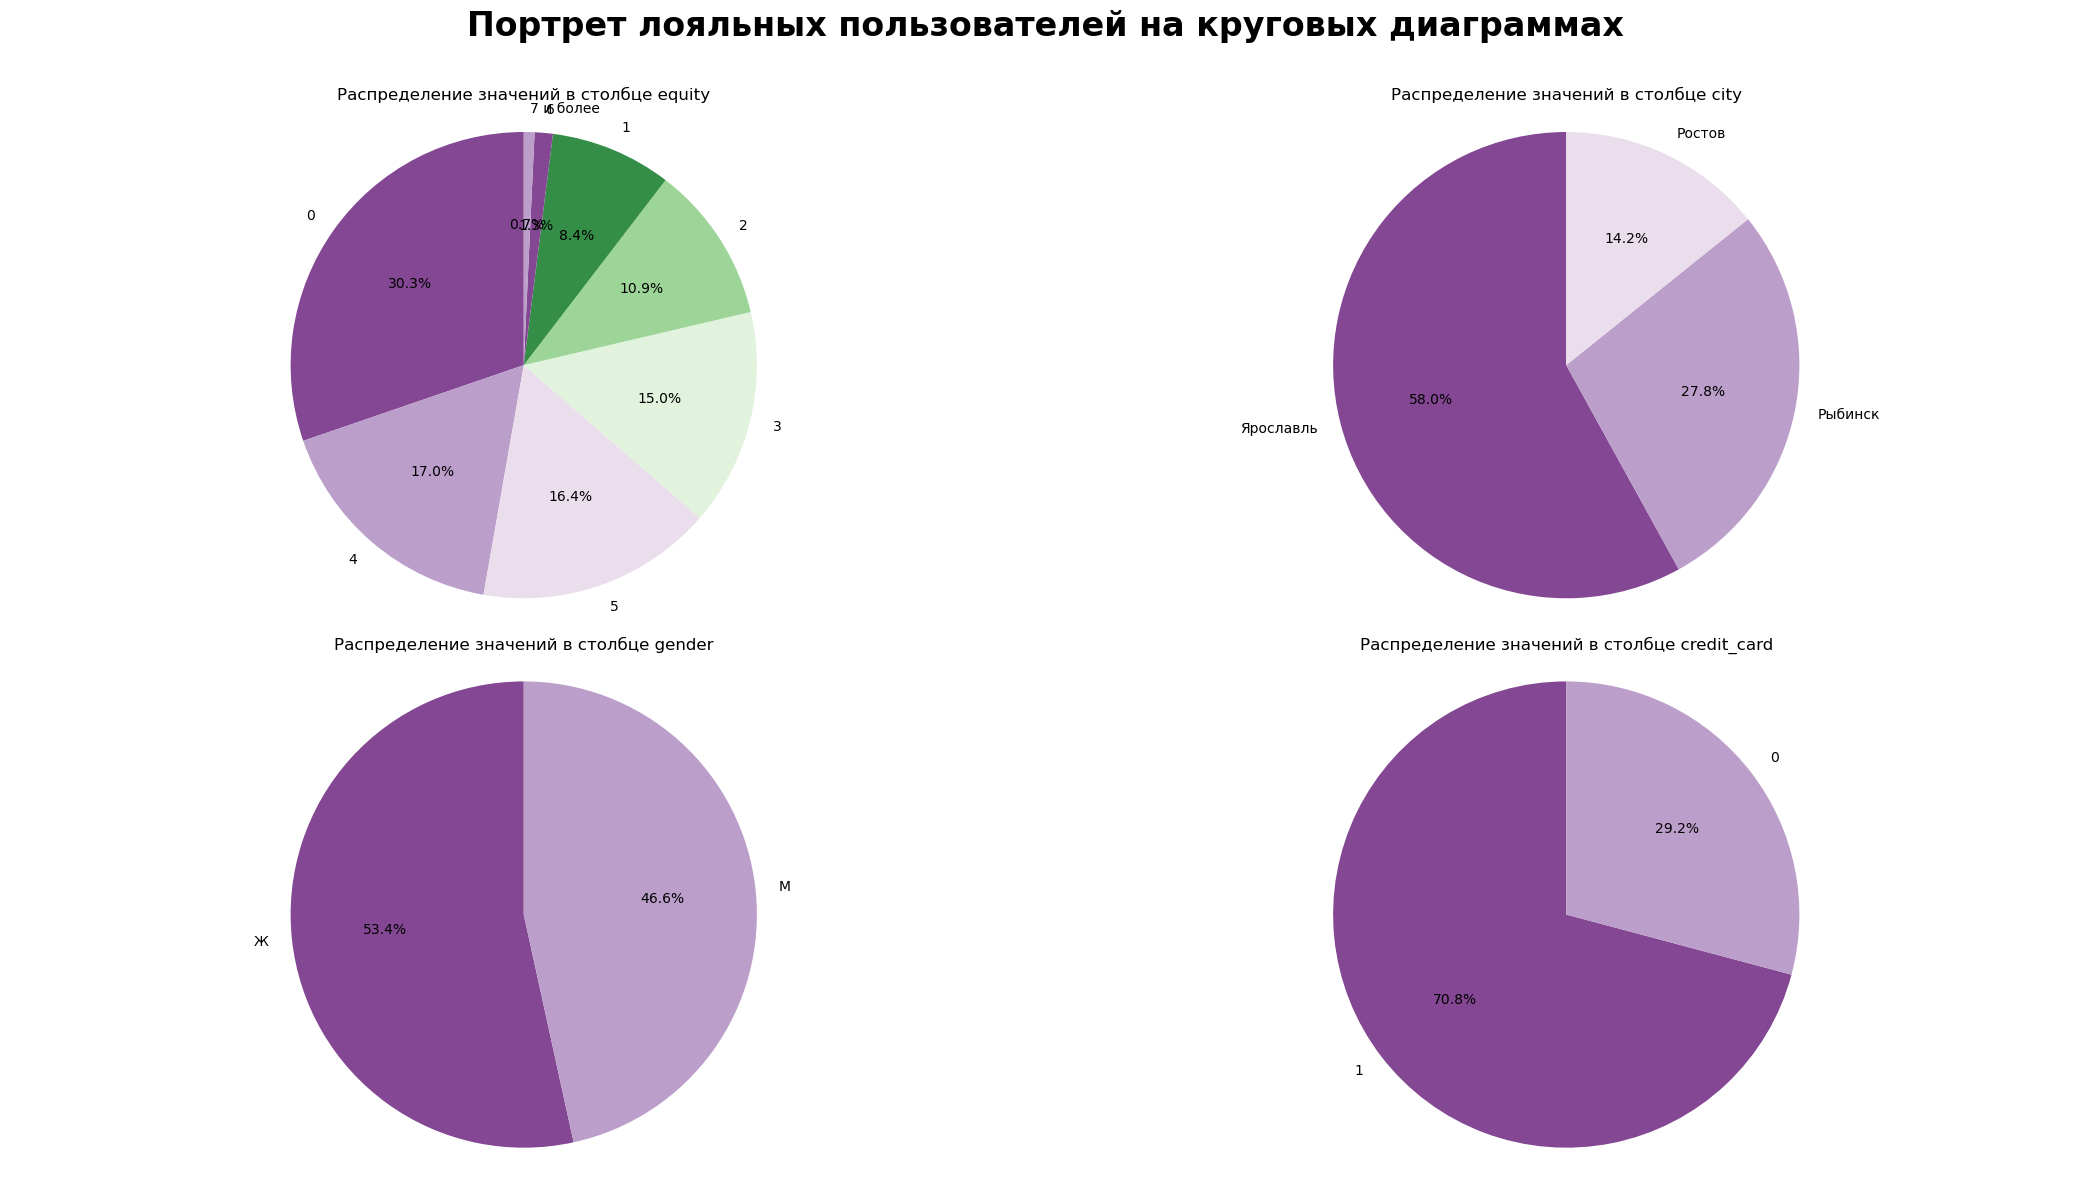

In [56]:
value_list = ['equity', 'city', 'gender', 'credit_card']
fig, axs = plt.subplots(2, 2, figsize=(21, 12))
fig.suptitle('Портрет лояльных пользователей на круговых диаграммах' + '\n', \
             fontsize=24, fontweight='bold')

#Создаем таблицу для посторения диаграм
for_pie_2 = data_agr.query('churn==0')

for n, value in enumerate(value_list):
    data_count_plot = for_pie_2[value_list[n]]
    
    # Подсчёт количества каждого уникального значения
    value_counts = data_count_plot.value_counts()
    # Определяем, какой подграфик использовать
    row = n // 2
    col = n % 2
    # Проверяем, существует ли подграфик для текущего индекса
    if row < 2 and col < 2: 
        # Построение круговой диаграммы на соответствующем подграфике
        axs[row, col].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90,\
                          colors=sns.color_palette("PRGn"))
        
        # Добавление заголовка и меток осей
        axs[row, col].set_title(f'Распределение значений в столбце {value}')
        axs[row, col].axis('equal')  # Это гарантирует, что круговая диаграмма будет круглой, а не эллиптической

# Отображение графика
plt.tight_layout()  # Это поможет улучшить внешний вид, автоматически корректируя положение подграфиков
plt.show()

**Портрет лояльного клиента:**
 
    1) Женщина
    2) В возрасте 30-40 лет
    3) С низким количеством баллов собственности
    4) Из Ярославля или Рыбинска 
    5) Слабо активная
    6) Со средним количеством баллов кредитного скоринга 845 
    6) С балансом 478661 руб.
    7) С медианной зарплатой 124757 руб.
    8) Без кредитной карты 
    9) С количеством используемых продуктов - 2
    10) С количеством баллов собственности - 0

### Корреляционный анализ связи выделенных факторов и частоты ухода клиентов и его интерпретация

Итак, для окончательного отбора и характеристики признаков, выступающих факторами оттока рассмотрим корреляцию между ними.

Для начала отберем признаки, корреляцию между котороыми будем сравнивать: 

In [57]:
sings_2 = ['score',
 'balance',
 'est_salary',
 'products',
 'age',
 'equity',
 'city',
 'gender',
 'credit_card',
 'last_activity',
 'churn']

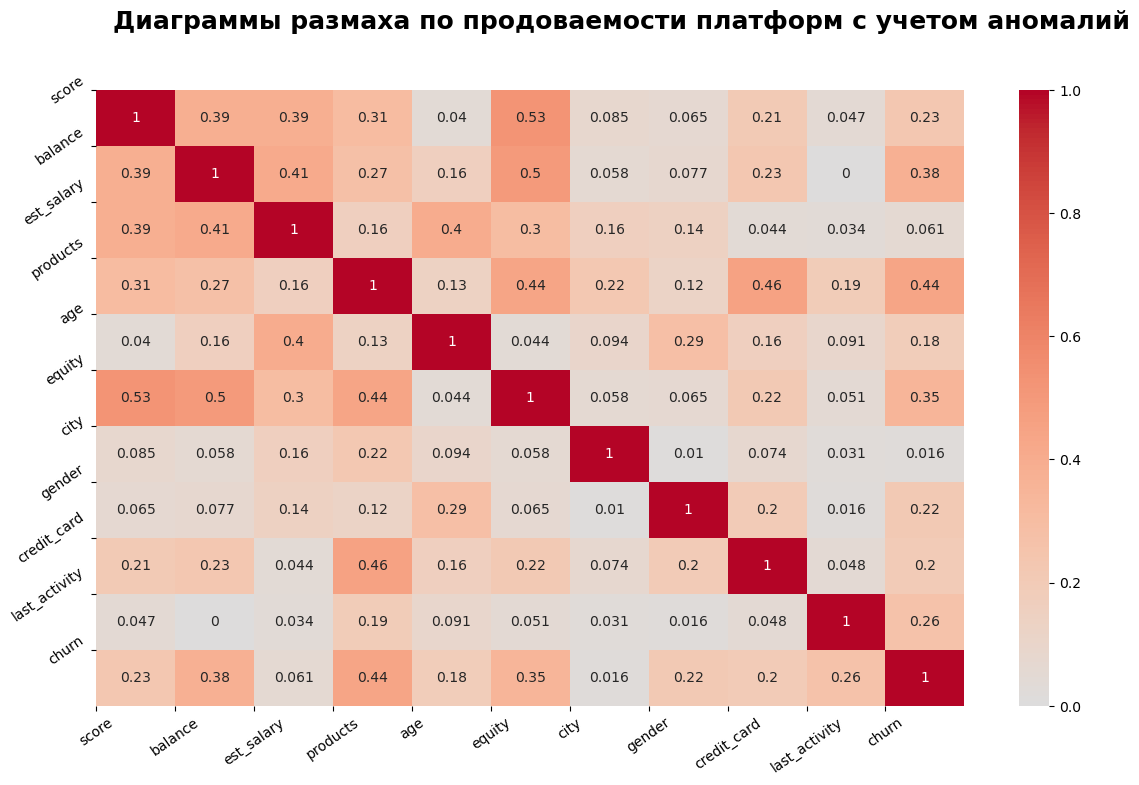

In [58]:
# Вычисляем матрицу Phi-K корреляции
phi_k_matrix = data[sings_2].phik_matrix(interval_cols=['score',
 'balance',
 'est_salary',
 'age'])  

# Преобразуем результат в формат, совместимый с seaborn для heatmap
phi_k_corr = phi_k_matrix.to_numpy()

# Создаем подграфики
fig, ax = plt.subplots(figsize=(14, 8))

# Добавляем heatmap на подграфик
sns.heatmap(phi_k_corr, annot=True, center=0, cmap='coolwarm', ax=ax)

# Настраиваем метки осей
ax.set_xticks(range(len(sings_2)))  # Устанавливаем позиции меток
ax.set_xticklabels(sings_2, rotation=35)  # Устанавливаем метки оси x
ax.set_yticks(range(len(sings_2)))
ax.set_yticklabels(sings_2, rotation=35)  # Обращаем порядок меток оси y, чтобы они шли сверху вниз

#Добавляем заголовок

fig.suptitle('Диаграммы размаха по продоваемости платформ с учетом аномалий', fontsize=18, fontweight='bold')

plt.show()

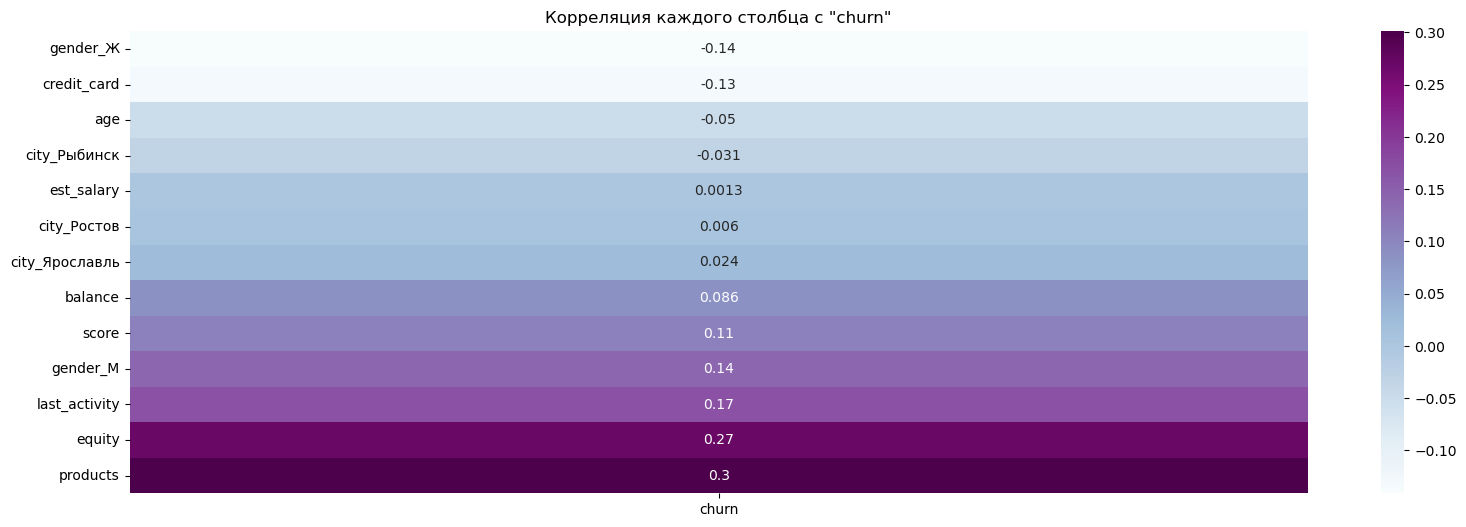

In [59]:
filtered_data = dummy_data.drop(columns=['user_id', 'balance_miss', 'age_miss'])

# Расчет матрицы корреляции с использованием метода Корнелия-Кендалла
correlations_with_churn = filtered_data.corr(method='pearson')['churn'].drop('churn')

# Отсортировка корреляций по возрастанию
sorted_correlations = correlations_with_churn.sort_values(ascending=True)

# Создание места для новой тепловой карты
plt.figure(figsize=(19, 6))

# Тепловая карта для корреляции
sns.heatmap(sorted_correlations.to_frame(), annot=True, cmap='BuPu')

plt.title('Корреляция каждого столбца с "churn"')
plt.show()

Оценка наюлюдаемой корреляции будет произведена согласно шкале Чеддока, котоая представляет собой следующий диапазон значений:

     0.00 - 0.19: Нет связи
     0.20 - 0.39: Слабая связь
     0.40 - 0.59: Средняя связь
     0.60 - 0.79: Сильная связь
     0.80 - 1.00: Очень сильная связь
*(и в обратную сторону до -1)*

Таким образом, сильная и очень сильная связь наблюдается между: 

    a) оцениваемым доходом и наличием кредитной карты
    b) количеством баллов собственности и оцениваемым доходом клиента 
    c) оцениваемым доходом и баллами кредитного скоринга
    d) количеством используемых продуктов и возрастом
    e) полом и оцениваемым доходом 
    
    
Средрня связь наблюдается между: 

    a) количеством используемых продуктов и наличием кредитной карты
    b) балансом и количеством используемых продуктов
    с) количеством баллов собственности и баллами кредитного скоринга 
    d) оцениваемым доходом и активностью 
    
Что касается оттока: 

    a) наибольшая зависимость наблюдается между оттоком и количеством используемых продуктов - средняя связь (По Чедоку)
    b) также имеется связь между оттоком и количеством баллов собственности, оттоком и балансом (По Чедоку)
    оттоком и балансом - слабая связь
    с) оттоком и наличием кредитной карты - Отрицательная корреляция, слабая связь (По Чедоку)
    d) оттоком и принадлежностью к женскому полу - Отрицательная корреляция, слабая связь (По Чедоку) 

Интерпретация остальных корреляций признаков с оттоком (также по Чедоку): 

    - между оттком и возростом - нет связи
    - между оттоком и фактором проживания в Рыбинске - нет связи
    - между оттоком и оцениваемой зарплатой - нет связи
    - между оттоком и фактором проживания в Ростове - нет связи
    - между оттоком и фактором проживания в Ярославле - нет связи
    - между оттоком и балансом - нет связи
    - между оттоком и баллами скоринга - нет связи
    - между оттоком и фактором принадлежности к мужскому полу - слабая положитеьлная связь
    - между оттоком и активностью - слабая положитеьлная связь    

*Некоторые выводы сделаны с учетом того, что метод corr занижает значеиня кореляции, в сравнении с phik*


Проверим направления корреляции с отттоком: 

In [60]:
print(f'Связь оцениваемого дохода с наличием кредитной карты {data["credit_card"].corr(data["est_salary"])}')
print(f'Связь оттока с количеством продуктов {data["churn"].corr(data["products"])}')
print(f'Связь оттока с балансом {data["churn"].corr(data["balance"])}')
print(f'Связь оттока с количеством баллов собственности {data["churn"].corr(data["equity"])}')
print(f'Связь оттока с наличием кредитной карты {data["churn"].corr(data["credit_card"])}')

Связь оцениваемого дохода с наличием кредитной карты 0.036955084107334335
Связь оттока с количеством продуктов 0.30027021800164205
Связь оттока с балансом 0.27877604790447086
Связь оттока с количеством баллов собственности 0.26870306683683676
Связь оттока с наличием кредитной карты -0.12998745130320535


Значения корреляции в данном случае немного отличаются от предыдущих ввиду погрешности используемого метода, однако самое глаавное, что удалось выяснить - **направление корреляции - она положительная.**

**Выводы:** Из анализа данных следует, что существует заметная зависимость между финансовыми показателями клиентов и их поведением как потребителей, а также их кредитным рейтингом. Сильная связь между баллами собственности и оцениваемым балансом, а также между балансом и баллами кредитного скоринга, подчеркивает важность этих факторов для финансовой устойчивости клиентов. 

Люди с кредитной картой зарабатывают больше 

Положительная связь оттока с баллами кредитного скоринга и балансом клиентов говорит о том, что с повышением доходов, возможно, люди склонны отказываться от услуг банка 

Также отрицательная, корреляция оттока с наличием кредитной карты говорит о том, что кредитная карта является одним из способов удержания клиентов.

## Проверка статистических гипотез

### Основанное на предшествующем анализе выдвижение гипотез о факторах, разделяющих клиентов на группы с высокой и не высокой отточностью

На основе проведенного исследовательского анализа выдвеним несколько факторов, которые предположительно оказывают влияние на отток клиентов: 

**Так, предыдущий анализ показал, что основными факторами могут выступать:**

**1) Доход клиента**
**2) Пол и город клиента** 
**3) Наличие кредитной карты клиента** 
**4) Количечтво используемых клиентом продуктов.**




Таким образом, на основе приведенного списка выдвенем гипотезы для проверки:
    
    Гипотеза №1: H0: Средний доход между ушедшими клиентами и клиентами оставшимися не различается
                 H1:Средний доход между ушедшими клиентами и клиентами оставшимися различается;
    
    Гипотеза №2: H0: Возраст клиента не влияет на вероятность его ухода из банка 
                 H1: С повышением возраста клиент становится более склонен к уходу из банка;
                 
    Гипотеза №3: H0: Наличие кредитной карты не влияет на вероятность ухода клиента банка
                 H1: Клиенты с оформленной кредитной картой менее склонны уходить из банка;
                 
    Гипотеза №4  H0: Количество используемых продуктов между ушедшими и не ушедшими клиентами банка не различается
                 H1: Количество используемых продуктов различается между ушедшими и не ушедшими клиентами банка.

### Выбор и обоснование методик тестирования (выбор статистических тестов)

Количество наблюдений в 1 группе: 1801     | Среднее по выборке: 141690.42 | Дисперсия в группе: 9719770831.729488
Количество наблюдений в 0 группе: 8089     | Среднее по выборке: 140602.886 | Дисперсия в группе: 13681126732.832485


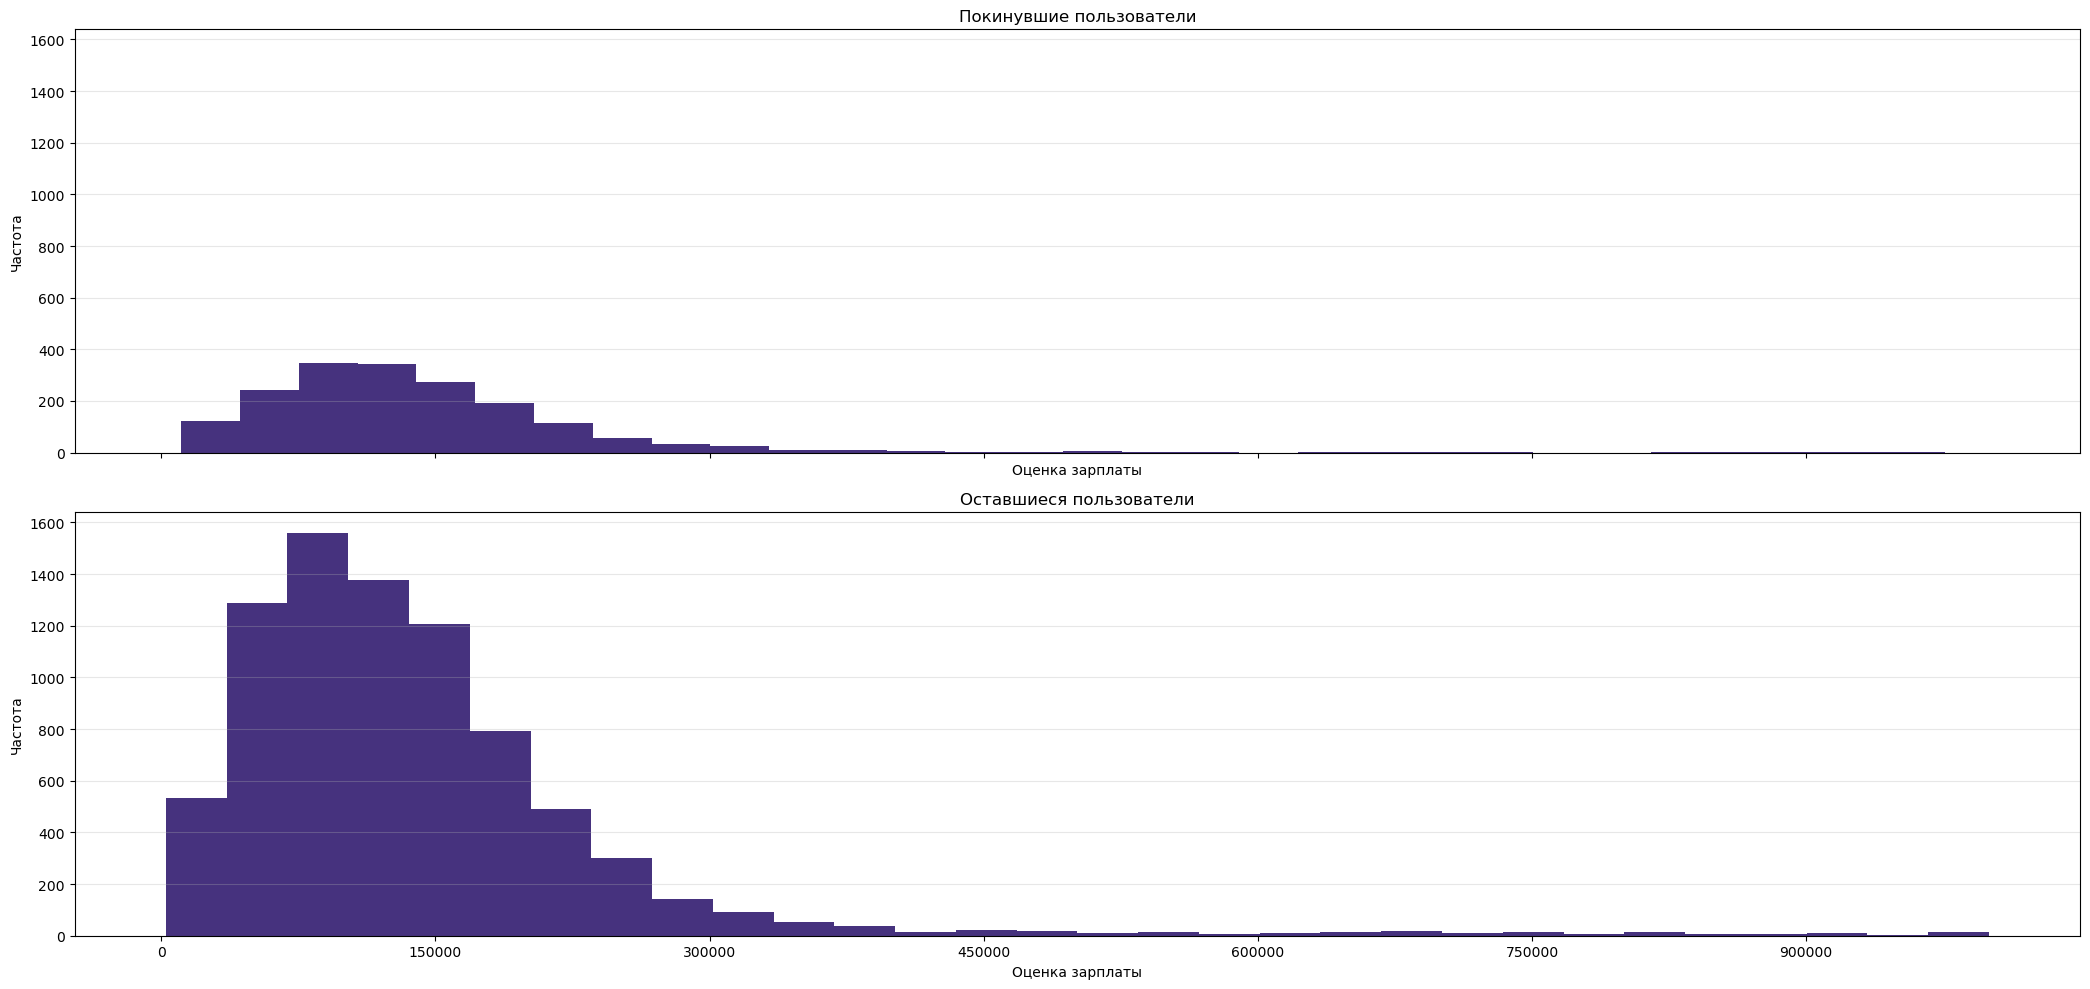

In [61]:
# Создание списка групп
groups = ['Оставшиеся пользователи', 'Покинувшие пользователи']
fig, axs = plt.subplots(2, 1, figsize=(21, 10), sharex=True, sharey=True)

# Настройка осей
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Рисуем гистограммы для каждой из групп
for i, group in enumerate([1, 0]):
    data_group = data[data['churn'] == group]['est_salary']
    ax = axs[i]
    ax.hist(data_group, bins=30)
    ax.grid(axis='y', alpha=0.3)
    ax.set_title(groups[i-1])
    group_mean = data[data["churn"] == group]['est_salary'].mean()
    group_var = data[data["churn"] == group]['est_salary'].var()
    
    print(f'Количество наблюдений в {group} группе: {len(data[data["churn"] == group])} \
    | Среднее по выборке: {round(group_mean, 3)} | Дисперсия в группе: {group_var}')

# Добавляем подписи осей
    ax.set_xlabel("Оценка зарплаты") 
    ax.set_ylabel("Частота")  

plt.tight_layout() 
plt.show()


count     1801.00
mean    141690.42
std      98588.90
min      10880.27
25%      83006.67
50%     124752.64
75%     174791.88
max     975960.36
Name: est_salary, dtype: float64

count     8089.00
mean    140602.89
std     116966.35
min       2546.30
25%      73015.45
50%     117419.24
75%     172278.07
max     999965.31
Name: est_salary, dtype: float64

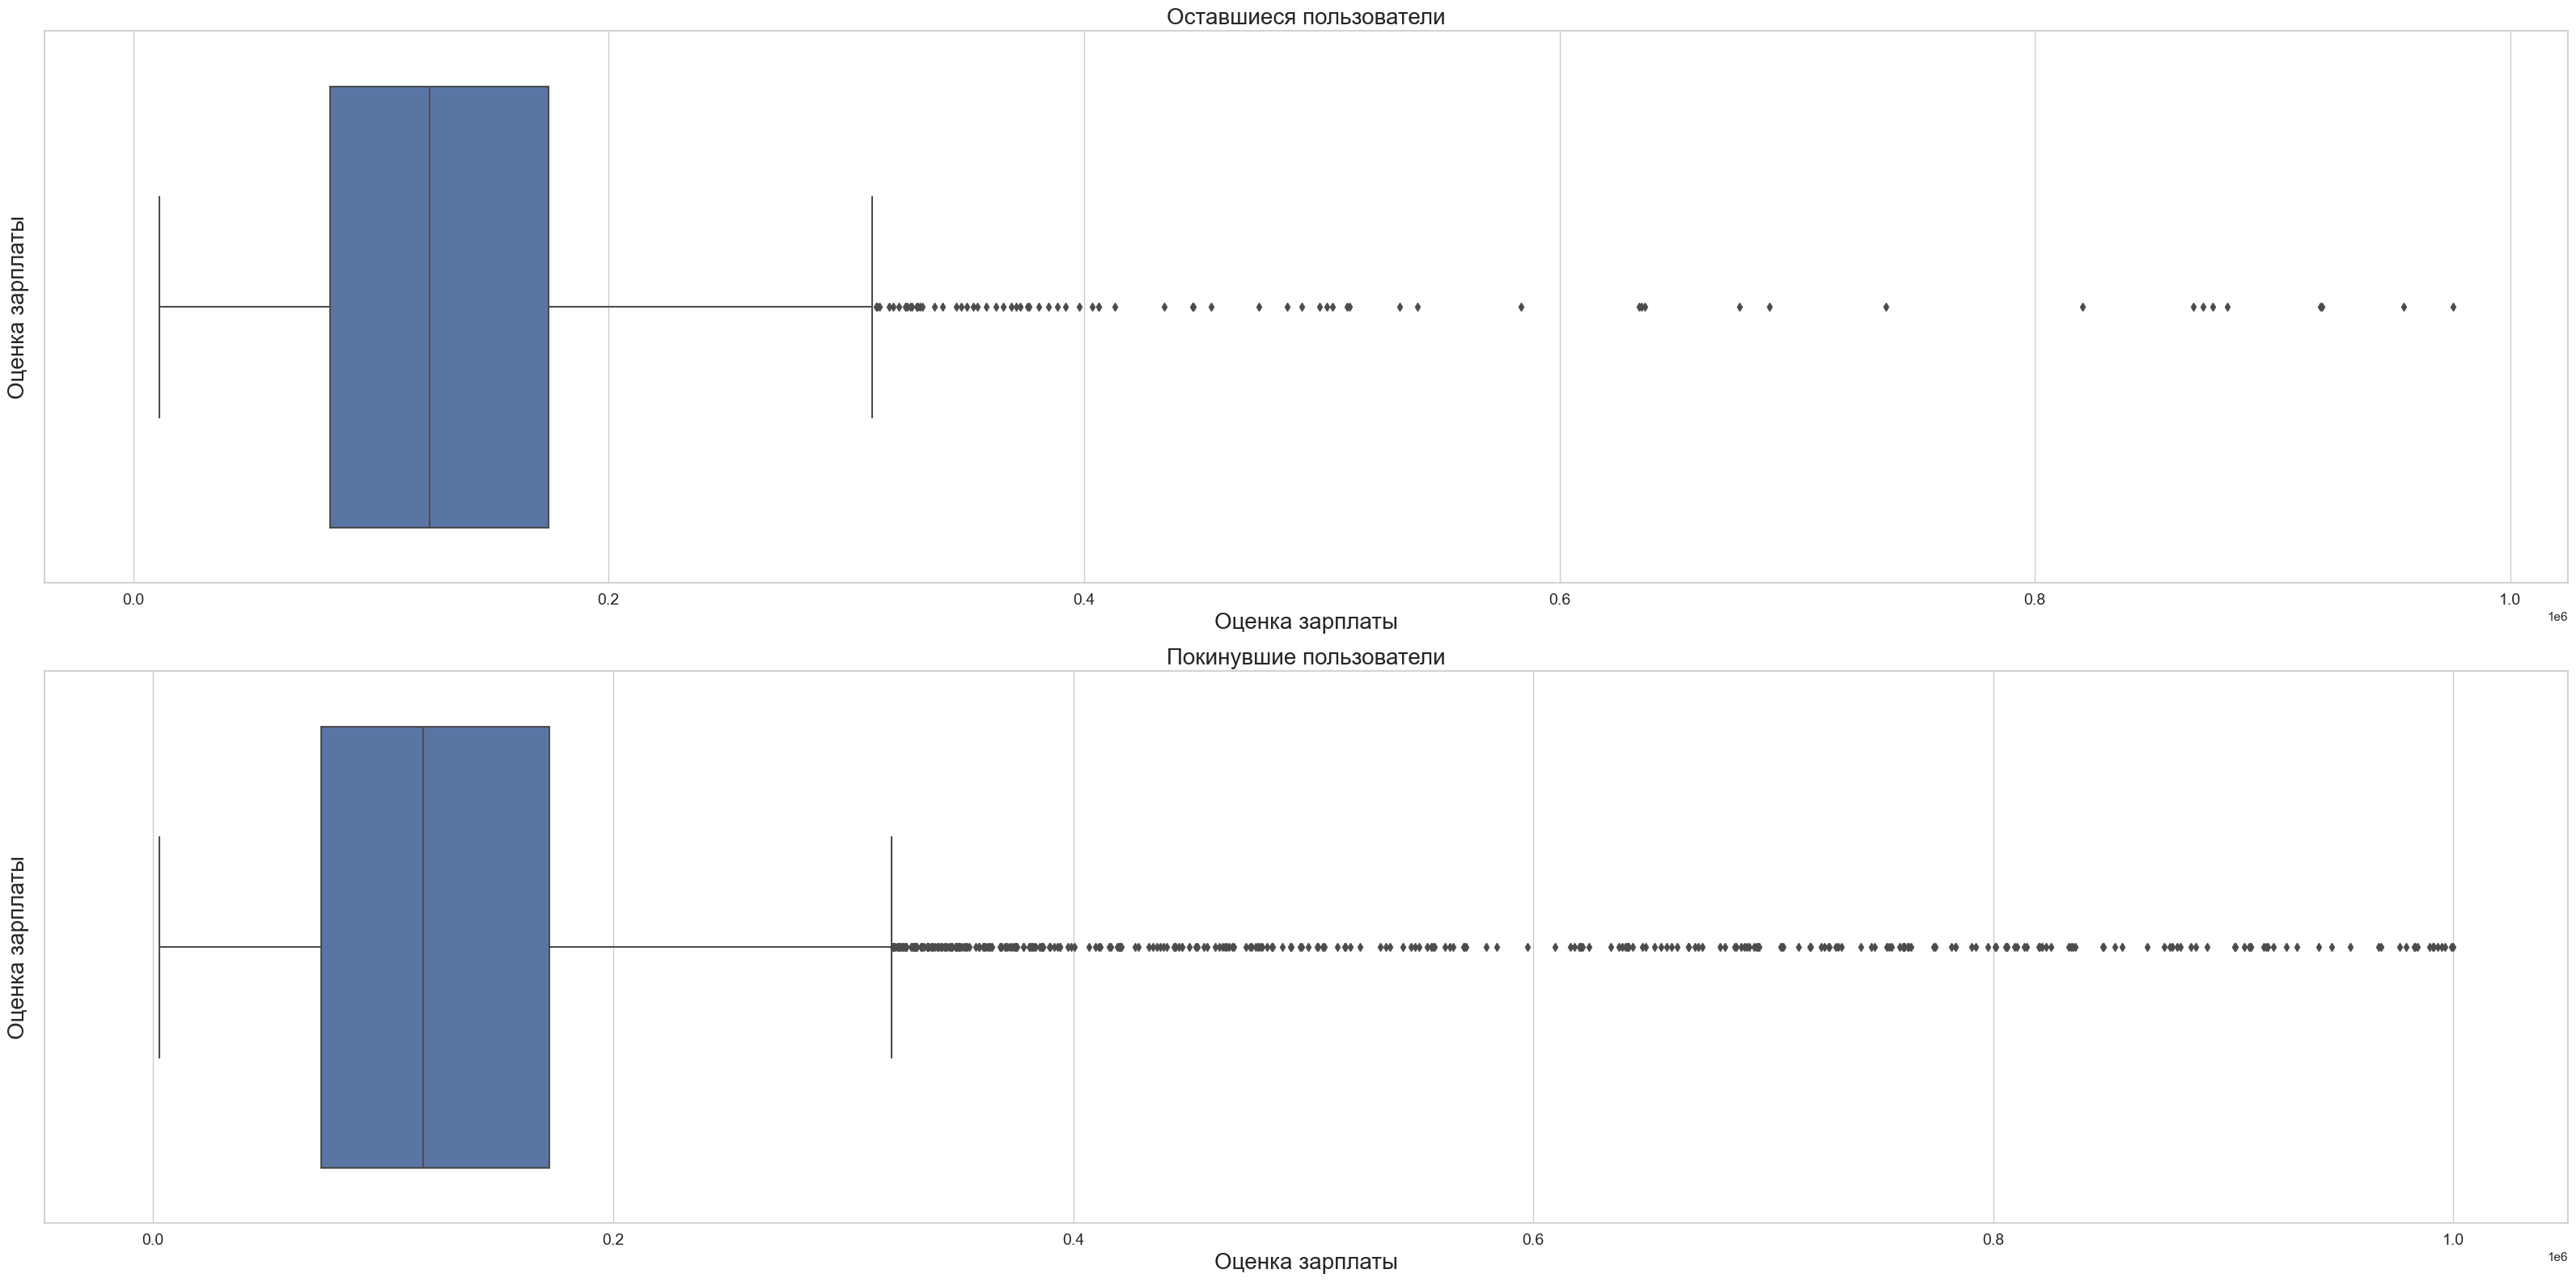

In [62]:
sns.set(style="whitegrid")


fig, axs = plt.subplots(2, 1, figsize=(32, 16), sharey=True)

for i, group_name in enumerate(groups):
   
    filtered_data = data[data['churn'] == (i == 0)]

    sns.boxplot(ax=axs[i], x=filtered_data['est_salary'])
    
    # Увеличение размеров шрифта
    axs[i].set_title(group_name, fontsize=20) 
    axs[i].xaxis.label.set_fontsize(20) 
    axs[i].yaxis.label.set_fontsize(20)  
    
    axs[i].tick_params(axis='both', labelsize=14)
    axs[i].set_xlabel('Оценка зарплаты')
    axs[i].set_ylabel('Оценка зарплаты')
    
    display(data[data['churn'] == (i == 0)]['est_salary'].describe())

plt.tight_layout()
plt.show()


Учитывая, что распределение близко к Пуассоновскому и обе выборки считаются независимыми (в связи с достаточным количеством наблюдений в каждой выборке), можно считать приемлемым использование параметрического двустороннего t-теста Стьюдента для независимых выборок. При большом количестве наблюдений этот тест не будет критически искажен даже при отсутствии нормального распределения.

Однако на ящиках с усами наблюдается большое количество выбросов, которые могут повлиять на результаты теста. Поэтому стоит исключить аномальные наблюдения из тестовых групп.

Так как дисперсии в выборках значительно различаются, необходимо использовать вариант теста, который автоматически учитывает эту разницу в дисперсиях.

#### Для Гипотезы №2

Количество наблюдений в 1 группе: 1801     | Среднее по выборке: 41.438
Количество наблюдений в 0 группе: 8089     | Среднее по выборке: 43.031


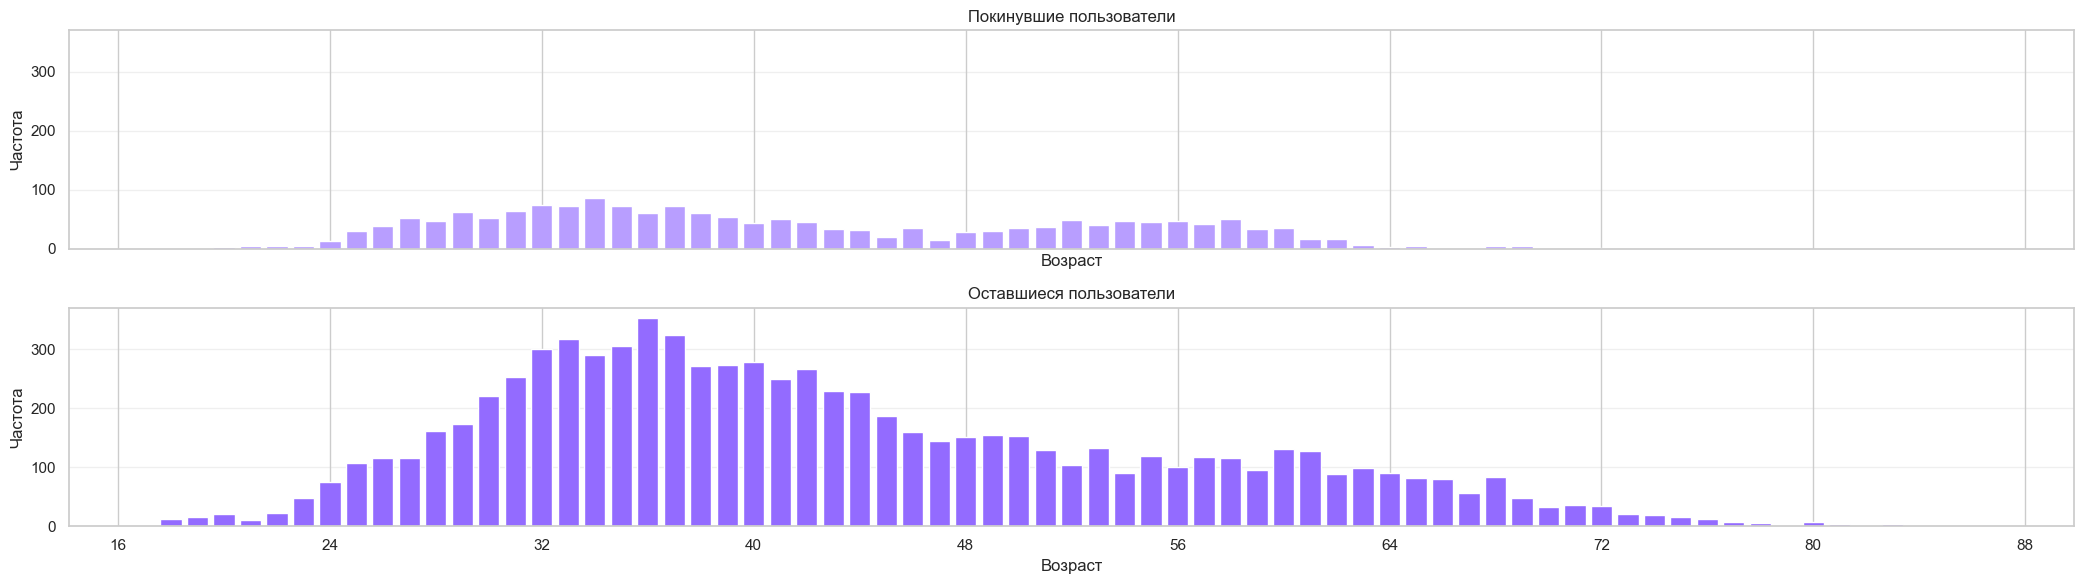

In [63]:
fig, axs = plt.subplots(2, 1, figsize=(21, 6), sharex=True, sharey=True)

# Настройка осей
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Рисуем столбчатые диаграммы для каждой из групп
for i, group in enumerate([1, 0]):
    data_group = data[data['churn'] == group]['age']
    ax = axs[i]
    
    # Подсчет количества наблюдений в каждой группе
    counts = data_group.value_counts().sort_index()
    
    # Построение столбчатой диаграммы
    ax.bar(counts.index, counts.values, color=['#b89eff', '#936bff'][i])
    ax.grid(axis='y', alpha=0.3)
    ax.set_title(groups[i-1])
    
    # Расчет среднего значения
    group_mean_2 = data[data["churn"] == group]['age'].mean()
    print(f'Количество наблюдений в {group} группе: {len(data[data["churn"] == group])} \
    | Среднее по выборке: {round(group_mean_2, 3)}')

    # Подписывание осей
    ax.set_xlabel('Возраст')  
    ax.set_ylabel('Частота')  

# Показываем графики
plt.tight_layout()  # Для корректировки расположения подграфиков
plt.show()


 В данном случае нас в первую очередт интересует изменение вероятности ухода/не ухода клиента с ростом независимой переменной. Возможно в данном случае использовать тест Стьюдента, 1) однако распределение отточной группы не нормально 2) задумка заключаетсяя в том, чтобы сравнить не среднее по группам, а посмотреть на изменение вероятности оттока с увеличентем возраста.
 
Поэтому в данном случае наиболее наглядными будут результаты логической регрессии, которая прзволяет исмледовать уровень вероятности зависимого признака на кажом этапе роста независимой переменной. Поспытаемся смоделировать регрессию.

#### Для Гипотезы №3

In [64]:
for i, group in enumerate([1, 0]):
    group_mean_3 = data[data["churn"] == group]['credit_card'].mean()
    print(f'Количество наблюдений в {group} группе: {len(data[data["churn"] == group])} \
    | Среднее по выборке: {round(group_mean_3, 3)}')

Количество наблюдений в 1 группе: 1801     | Среднее по выборке: 0.551
Количество наблюдений в 0 группе: 8089     | Среднее по выборке: 0.708


В целом, количество наблюдений отличается, но достаточно большое. Средние значениия отличается, хотя и не критично. Поскольку речь идет о проверки взаимосвязи между двумя бинарными переменными, t-тест не может быть использован. **В данном случае можем использовать проверку через Хи-квадрат Пирсона с помощью теста пропорций**.  

#### Для Гипотезы №4

Количество наблюдений в 1 группе: 1801     | Среднее по выборке: 2.376, | Дисперсия в группе: 0.8515343327781005
Количество наблюдений в 0 группе: 8089     | Среднее по выборке: 1.76, | Дисперсия в группе: 0.5088089000961554


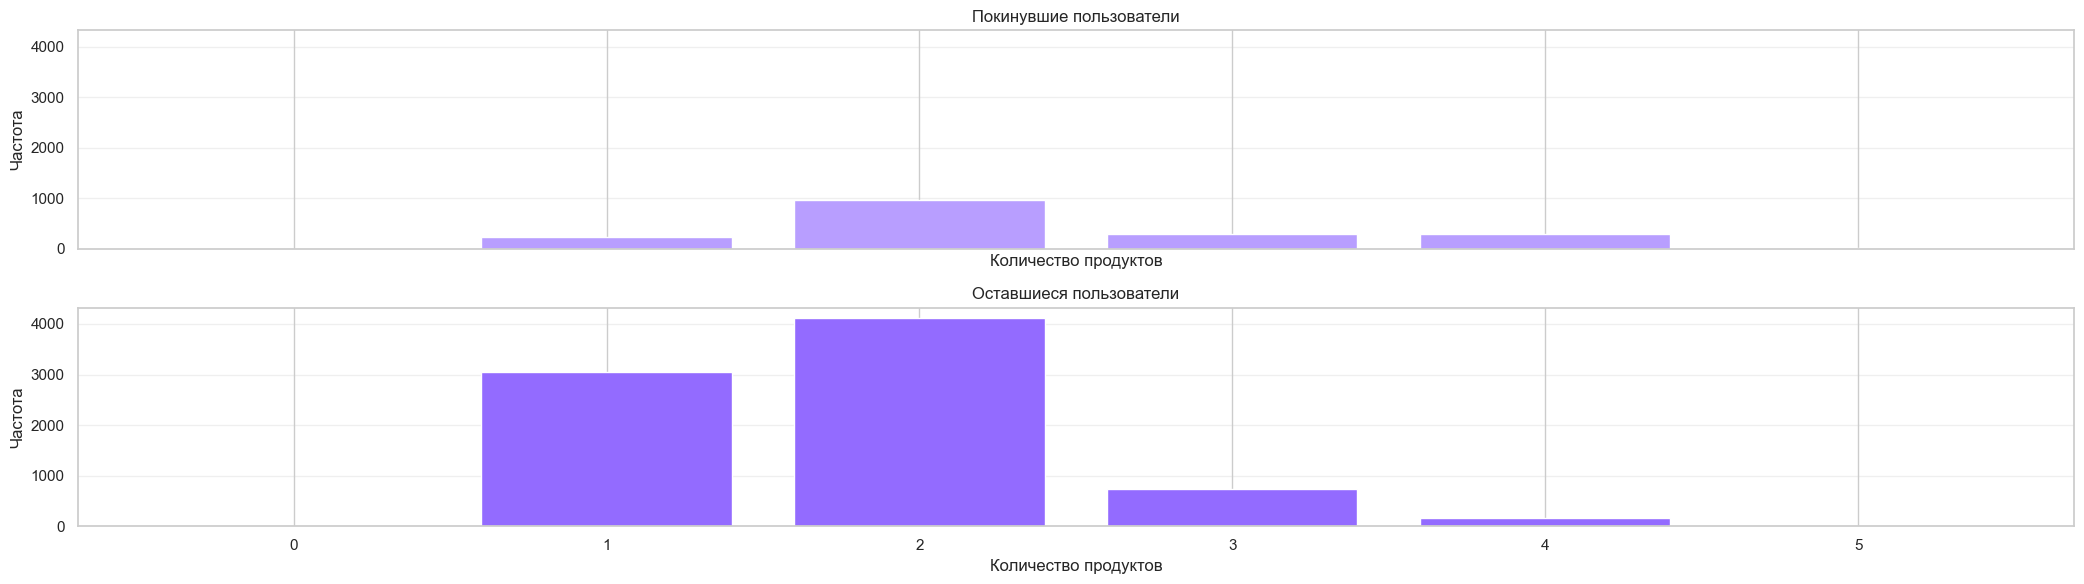

In [65]:
# Создаем фигуру с двумя подграфиками
fig, axs = plt.subplots(2, 1, figsize=(21, 6), sharex=True, sharey=True)

# Настройка осей
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Рисуем столбчатые диаграммы для каждой из групп
for i, group in enumerate([1, 0]):
    data_group = data[data['churn'] == group]['products']
    ax = axs[i]
    
    # Подсчет количества наблюдений в каждой группе
    counts = data_group.value_counts().sort_index()
    
    # Построение столбчатой диаграммы
    ax.bar(counts.index, counts.values, color=['#b89eff', '#936bff'][i])
    ax.grid(axis='y', alpha=0.3)
    ax.set_title(groups[i-1])
    
     # Подписывание осей
    ax.set_xlabel('Количество продуктов')  
    ax.set_ylabel('Частота')
    
    # Расчет среднего значения
    group_mean_4 = data[data["churn"] == group]['products'].mean()
    group_var_4 = data[data["churn"] == group]['products'].var()
    print(f'Количество наблюдений в {group} группе: {len(data[data["churn"] == group])} \
    | Среднее по выборке: {round(group_mean_4, 3)}, | Дисперсия в группе: {group_var_4}')

# Показываем графики
plt.tight_layout()  
plt.show()


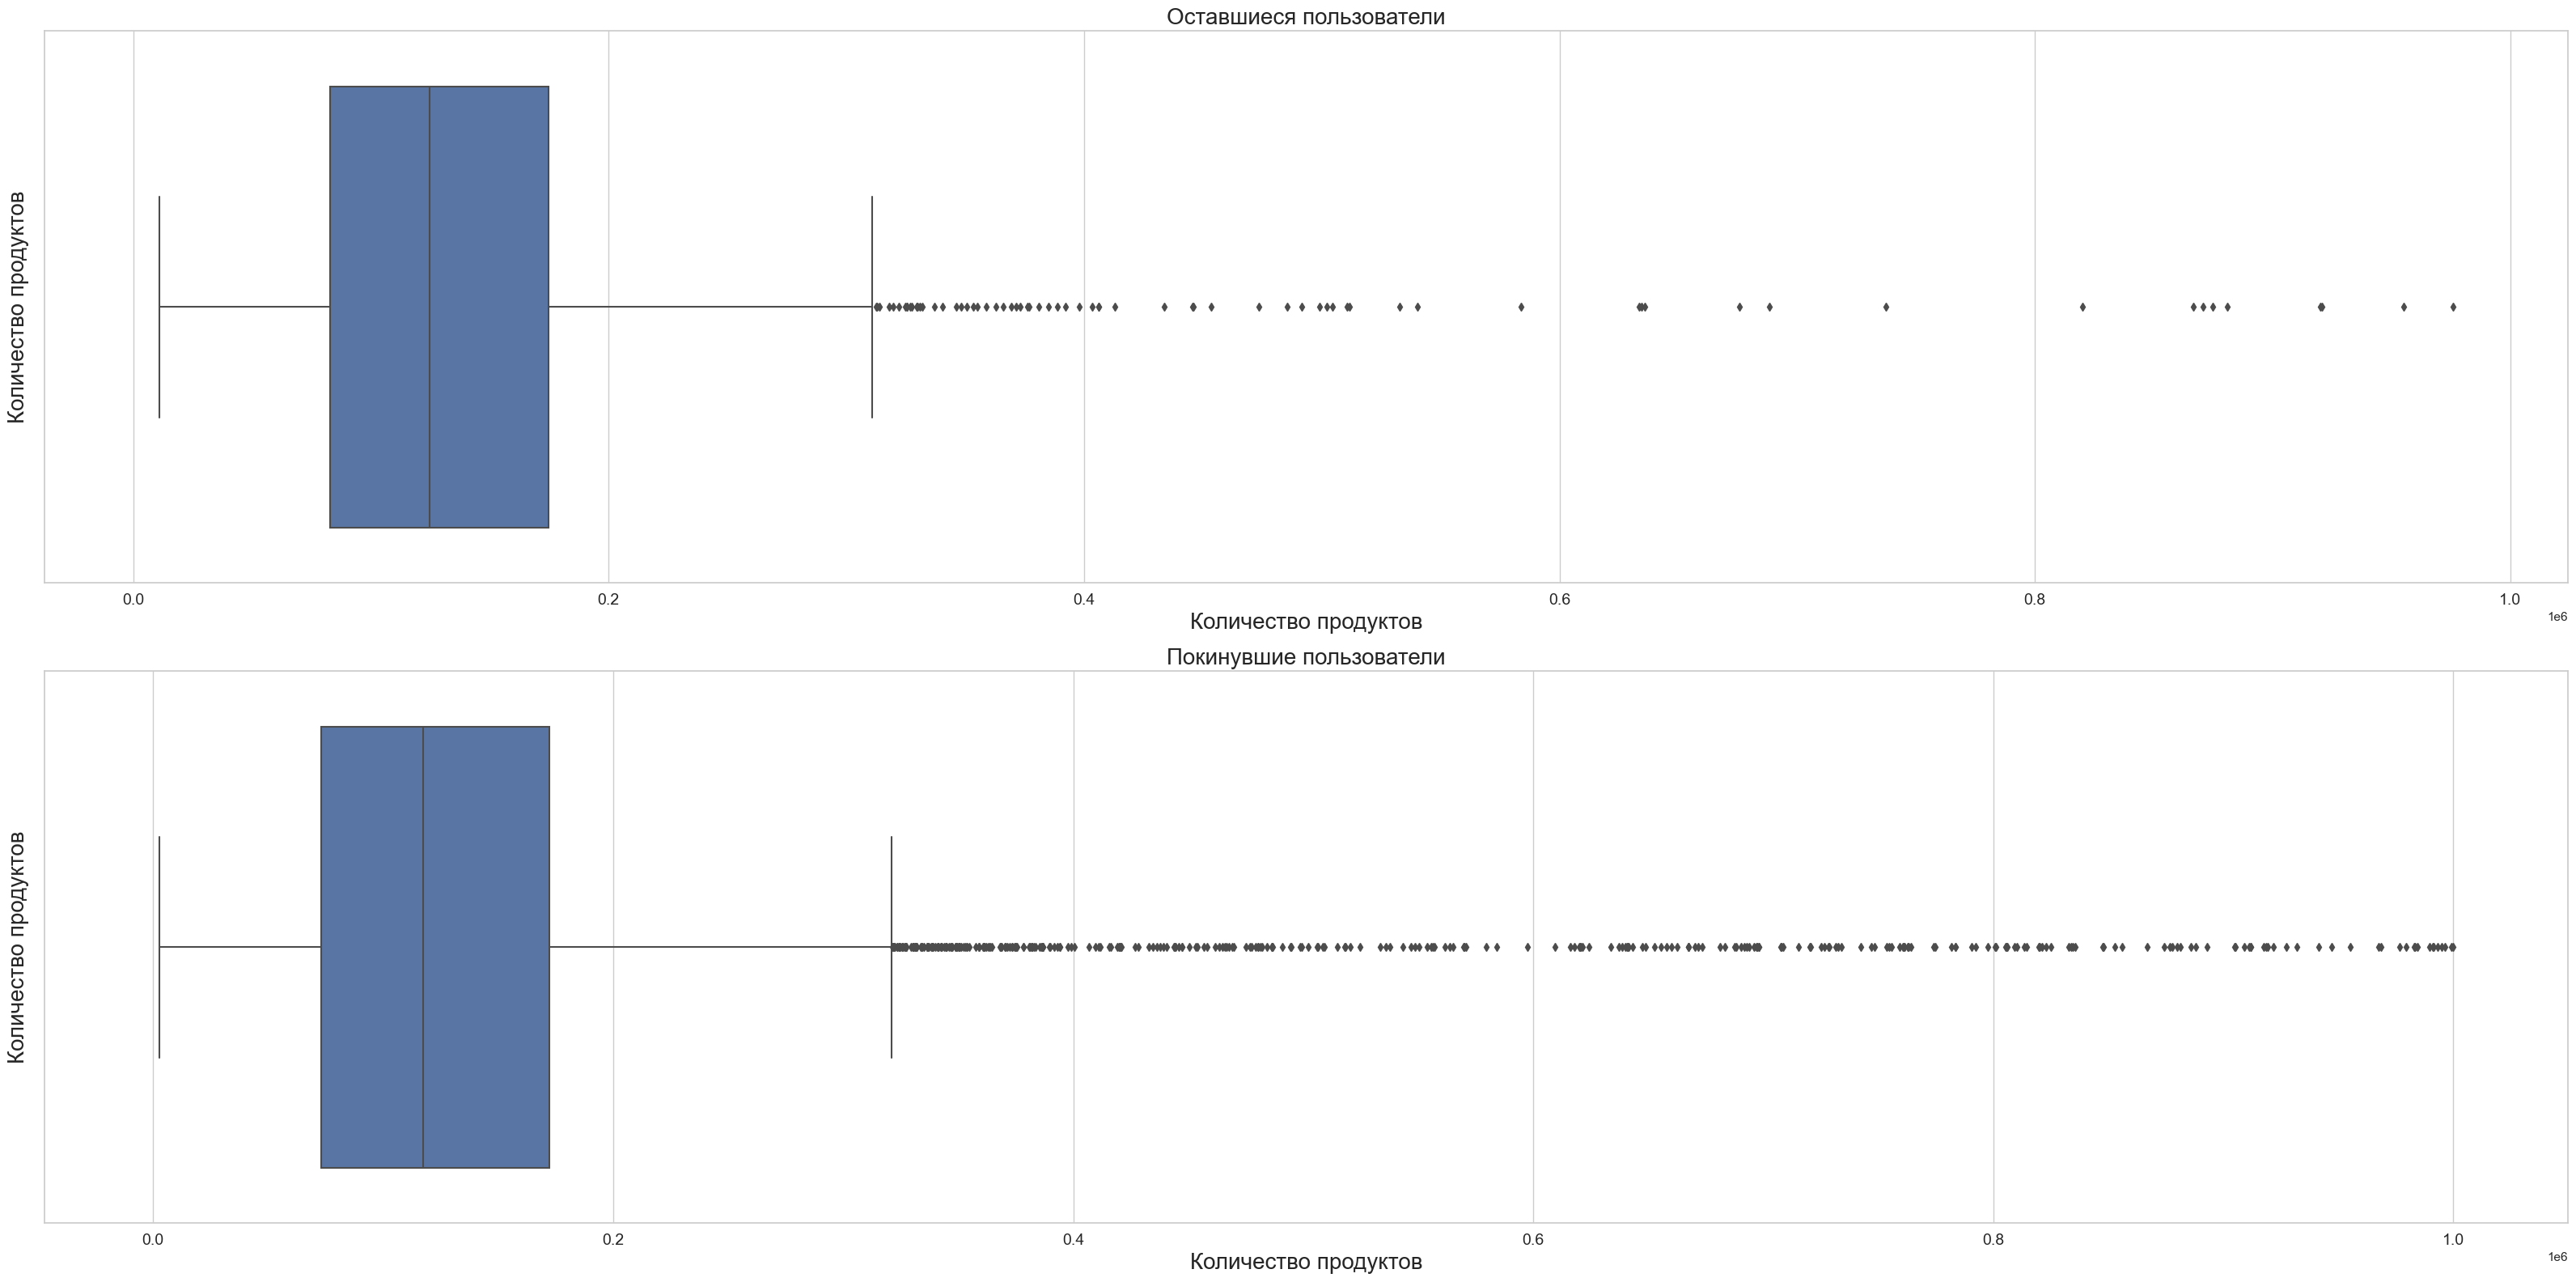

In [66]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 1, figsize=(32, 16), sharey=True)


for i, group_name in enumerate(groups):
    # Фильтрация данных по текущей группе
    filtered_data = data[data['churn'] == (i == 0)] 

    sns.boxplot(ax=axs[i], x=filtered_data['est_salary'])
    axs[i].set_title(group_name)
    axs[i].tick_params(axis='both', labelsize=14)
    
    # Увеличение размеров шрифта
    axs[i].set_title(group_name, fontsize=20) 
    axs[i].xaxis.label.set_fontsize(20) 
    axs[i].yaxis.label.set_fontsize(20)  
    
    axs[i].set_xlabel('Количество продуктов')
    axs[i].set_ylabel('Количество продуктов')

plt.tight_layout() 
plt.show()


Наблюдается большое количество выбросов, которые могут исказить т-тест, однако распределение адекватно, а количество наблюдений (согласно ЦПТ) покрывает наличие выбросов

Для анализа изменения количества используемых клиентом продуктов в группе ушедших и не ушедших из банка, наиболее подходящим статистическим тестом будет **t-тест Стьюдента для независимых выборок**. Этот тест позволяет сравнить средние значения двух групп, в данном случае среднее количество продуктов, используемых клиентами, которые ушли из банка и те, кто остался. Что касается распределений, количество наблюдений в каждой группе покрывает то, что распределение не нормально. 

Дисперсии отличаются сильно, поэтому используем вариант теста, который автоватически невилирует разницу в дисперсиях.

Дополнительно по методологии: **Уровень статистической значимости alpha будет равняться 0.05 (5%)**, что является одним из унифицированных значений. Выбор в пользу 5% вместо 1% основан на том, что выборочные данные не большие и получить меньше 1% будет тяжело, поэтому 5ти будет достаточно (учитывая, что в бизнесе значения более приблезительные, чем, например, в точных науках).

### Проверка Гипотиз 

#### Гипотеза №1: Средний доход между ушедшими клиентами и клиентами оставшимися различается;

In [67]:
test_group_income_1 = data[(data["churn"] == 0) & (data["est_salary"] <= 174791.88)]['est_salary']
test_group_income_2 = data[(data["churn"] == 1) & (data["est_salary"] <= 172278.07)]['est_salary']

In [68]:
#Здададим уровень статистической значимости
alpha = 0.05

#Осуществим проверку двувыборочным статистическим t-test'ом для двусторонней гипотезы 
test_result = st.ttest_ind(test_group_income_1, test_group_income_2, equal_var=False, alternative='two-sided')

print("p_значение:", round(test_result.pvalue, 15))

if test_result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нулевая гипотеза не отвергается")
    

p_значение: 3.89818583e-06
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить наблюдаемое различие дохода между двумя группами или большее случайно очень мала. **Это позволяет сделать вывод о значимом различии между средними доходами, отвергнув нулевую гипотезу.** 

#### Гипотеза №2: С повышением возраста клиент становится более склонен к уходу из банка;

In [69]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = data[['age']]
y = data['churn']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели логистической регрессии
model = LogisticRegression(random_state=42)  # Установка random_state для модели
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [70]:
predictions = model.predict_proba(X_test)[:, 1]  # Получение вероятностей
auc_roc_score = roc_auc_score(y_test, predictions)
print(f"Точность модели: {auc_roc_score}")


Точность модели: 0.5420908338506104


In [71]:
# Интерпретация коэффициентов
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients

,Feature,Coefficient
0,age,-0.01


Точность модели - 54%. **Коэффициент признака age равен -0.01.** Этот коэффициент показывает, как изменение age влияет на вероятность churn.

**Отрицательный коэффициент указывает на то, что увеличение возраста приводит к уменьшению вероятности оттока**. 

Значение коэффициента близко к нулю, **что говорит о слабой зависимости между возрастом и вероятностью оттока**. Это означает, что изменения в возрасте клиента приводят к небольшим изменениям в вероятности оттока, что делает этот фактор недостаточно значимым чтоюы отвергнуть нулевую гипотезу.

#### Гипотеза №3: Клиенты с оформленной кредитной картой менее склонны уходить из банка

In [72]:
#Здададим уровень статистической значимости
alpha = 0.05

group_1 = data[data['credit_card'] == 1]
all_data = data.copy()

# Вычисление пропорций для каждого случая
prop_group_1 = group_1['churn'].value_counts(normalize=True)[0] 
prop_all = all_data['churn'].value_counts(normalize=True)[0] 

# Создание таблицы сопряженности для проведения теста Хи-квадрат
contingency_table = pd.crosstab(index=all_data['credit_card'], columns=all_data['churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Вывод результата
print(f"Пропорция в группе с кредиткой: {prop_group_1}")
print(f"Пропорция во всей выборке: {prop_all}")

print(f"P-value: {p}")

if p < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нулевая гипотеза не отвергается")


Пропорция в группе с кредиткой: 0.8523200475907198
Пропорция во всей выборке: 0.817896865520728
P-value: 4.5521027399897535e-38
Отвергаем нулевую гипотезу


Доля не отточных клиентов в группе с кредиткой: 0.8523 (85.23%).Пропорция во всей выборке: 0.8180 (81.80%). Значение по группе с признаком выше на примерно 4%, не такое большое значение, однако:

P-значение очень маленькое, что указывает на высокую вероятность получить наблюдаемые или более экстремальные результаты, не случайно. Соответственно нулевая гипотеза отвергается, и можно говорить о том, что кредитка действительно является фактором удержания клиентов.

#### Гипотеза №4: Количество используемых продуктов различается между ушедшими и не ушедшими клиентами банка

In [73]:
#Формируем группы для проверки: 
test_group_product_1 = data[data["churn"] == 0]['products']
test_group_product_2 = data[data["churn"] == 1]['products']

In [74]:
#Здададим уровень статистической значимости
alpha = 0.05

#Осуществим проверку двувыборочным статистическим t-test'ом для двусторонней гипотезы 
test_result = st.ttest_ind(test_group_product_1, test_group_product_2, equal_var=False, alternative='two-sided')

print("p_значение:", test_result.pvalue)

if test_result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нулевая гипотеза не отвергается")
    

p_значение: 1.899418696506324e-136
Отвергаем нулевую гипотезу


Значение p_значение сильно меньше доверительного интервала, что интерпретируется как очень маленький шанс получить наблюдаемой в выбоках различие случайно, **и позволяет отвергнуть нулевую гипотезу в пользу альтернативной**. Таким образом можно говорить о том, что в группе отточных клиентов используется большее количество продуктов.

#### Выводы

Статистическая проверка гипотез позволила получить подтвержденные и очень важные результаты для решения исследовательской проблемы: 
    
    1) Оцениваемый уровень дохода у отточных и оставшихся клиентов различается
    2) Повышение возроста клиентской аудитории не влияет на вероятность ухода
    3) Наличие кредитной карты сдерживают клиента от ухода из банка 
    4) Отточные клиенты склонны использовать большее количество продуктов банка

### Промежуточные выводы

Итак, была проведена большая часть работы: сделаны осмотр и подготовка данных, проведены исследовательский и статистический анализ. Детальные выводы будут прописаны в итоговых выводах, сейчас представим только основные тенденции касаемо оттока. 

Клиенты склонны к оттоку: 

     1) С баллами кредитного скоринга в промежутке от 800 до 900
     2) С балансом свыше 800 тыс. руб.
     3) С оценочным доходом 100-200 тыс. руб.
     4) Клиенты, владеющие 4мя и 3мя продуктами
     5) Клиенты с большим числом баллов собственности (практически упорядочено с ростом баллов собственности ростет доля отточности).
     6) клиенты из Ростова, 
     7) Мужчины  в полтора раза часще покидают банк
     
Статистические закономерности: 

     1) Наличие кредитки уменьшает вероятность ухода
     2) Средний доход между не имеет значимых различий 
     3) Уходящие клиенты используют больше продуктов 
     4) Возраст не влияет на повышение вероятности оттока 
     
Далее все выявленные взаимосвязи и тенденции распределим по сегментам и приоритизируем их.

### Сегментация групп отточных клиентов

Выведем несколько сегментов пользователей для дальнейшего анализа и преоритезации. Для начала отберем признаки и зафикисруем ранее определенные отточные категории и интервалы.

Признаки и интервалы для сегментации: 

    1) Баллы кредитного скоринга от 800 до 900 
    2) Баланс клиента от 800000 руб. 
    3) Город клиента - Ярославль или Ростов 
    4) Доход клиента - 100-200 тыс. руб. 
    5) Пол клиента - Мужской 
    6) Баллов совственности - 4 и более 
    7) Возраст - 25-32 или 48-62
    8) Без кредитной карты 
    
Составим три сегмента из выделенных признаков так, чтобы количество в группох превышало 500 человеек, а уровень оттока был выше  чем средний по выборке. 

In [75]:
dummy_data.columns

Index(['user_id', 'score', 'age', 'equity', 'balance', 'products',
       'credit_card', 'last_activity', 'est_salary', 'churn', 'age_miss',
       'balance_miss', 'gender_Ж', 'gender_М', 'city_Ростов', 'city_Рыбинск',
       'city_Ярославль'],
      dtype='object')

In [76]:
conditions = {
    'score': (dummy_data['score'] >= 800) & (data['score'] <= 900),
    'balance': dummy_data['balance'] > 800000,
    'gender' : dummy_data['gender_М']==True,
    'city': dummy_data['city_Ярославль']==True,
    'est_salary': (dummy_data['est_salary'] > 100000) & (data['est_salary'] < 200000),
    'equity': dummy_data['equity'] >= 4,
    'products': dummy_data['products'] > 3,
    'age': ((dummy_data['age'] >= 25) & (data['age'] <= 32)) | ((data['age'] >= 48) & (data['age'] <= 62)),
    'credit_card': dummy_data['credit_card'] == 0
}

# Применение условий и подсчет наблюдений
observations = {}
for col_name, cond in conditions.items():
    observations[col_name] = len(dummy_data[cond])

# Вывод результатов
for count, (col_name, num_obs) in enumerate(observations.items(), start=1):
    print(f"{count}. Количество наблюдений в переменной {col_name}: {num_obs}")
    
observations = dict(sorted(observations.items(), key=lambda item: item[1]))

1. Количество наблюдений в переменной score: 5160
2. Количество наблюдений в переменной balance: 2510
3. Количество наблюдений в переменной gender: 5005
4. Количество наблюдений в переменной city: 5888
5. Количество наблюдений в переменной est_salary: 4301
6. Количество наблюдений в переменной equity: 4039
7. Количество наблюдений в переменной products: 493
8. Количество наблюдений в переменной age: 4241
9. Количество наблюдений в переменной credit_card: 3196


In [77]:
# Общее количество наблюдений
total_count = sum(observations.values())

# Расчет размера групп
group_size = max(1, total_count // 3)

# Создание списка групп
groups = [[] for _ in range(3)]

# Распределение ключей по группам
keys = list(observations.keys())
for i, key in enumerate(keys):
    group_index = i % 3
    groups[group_index].append(key)

# Вывод результатов по группам
for group_number, group in enumerate(groups, start=1):
    print(f"\nСегмент {group_number}:")
    for count, col_name in enumerate(group, start=1):
        print(f"  {count}. Признак: {col_name} Количество наблюдений: {observations[col_name]}")


Сегмент 1:
  1. Признак: products Количество наблюдений: 493
  2. Признак: equity Количество наблюдений: 4039
  3. Признак: gender Количество наблюдений: 5005

Сегмент 2:
  1. Признак: balance Количество наблюдений: 2510
  2. Признак: age Количество наблюдений: 4241
  3. Признак: score Количество наблюдений: 5160

Сегмент 3:
  1. Признак: credit_card Количество наблюдений: 3196
  2. Признак: est_salary Количество наблюдений: 4301
  3. Признак: city Количество наблюдений: 5888


In [78]:
segment_1 = dummy_data.query('credit_card == False and gender_М==True and equity >=4')
segment_2 = dummy_data.query('score < 900 and score > 800 and products >= 3 and (age >=25 and age <= 35 or age >= 48 and age <= 65)')
segment_3 = dummy_data.query('balance > 800000 and est_salary > 100000 and city_Ярославль==True or city_Ростов==True')

In [79]:
segments = [segment_1, segment_2, segment_3]

segments_info = {
    "Сегмент 1": {"description": "Клиенты без кредитной карты, мужского пола и баллами собственности от 4", "count": len(segment_1)},
    "Сегмент 2": {"description": "Клиенты с кредитным счетом от 800 до 900 баллов скоринга, более 3 продуктами и возрастом от 25 до 35 или от 48 до 65 лет", "count": len(segment_2)},
    "Сегмент 3": {"description": "Клиенты с балансом выше 800000 руб. и зарплатой выше 100000 руб. в мес., проживающие в Ярославле или Ростове", "count": len(segment_3)}
}

print("\033[1m" + "Основные сегменты отточных пользователей:" + "\033[0m")
print()
for i, (key, value) in enumerate(segments_info.items()):
    freq = round(len(segments[i][segments[i]['churn']==1])/len(segments[i]), 5)
    print(f"{key}: {value['description']}, | Количество строк: {value['count']} | Доля оттока: {freq}")
    print()
    


Основные сегменты отточных пользователей:

Сегмент 1: Клиенты без кредитной карты, мужского пола и баллами собственности от 4, | Количество строк: 704 | Доля оттока: 0.49432

Сегмент 2: Клиенты с кредитным счетом от 800 до 900 баллов скоринга, более 3 продуктами и возрастом от 25 до 35 или от 48 до 65 лет, | Количество строк: 510 | Доля оттока: 0.41373

Сегмент 3: Клиенты с балансом выше 800000 руб. и зарплатой выше 100000 руб. в мес., проживающие в Ярославле или Ростове, | Количество строк: 2557 | Доля оттока: 0.29879



Итак, сегменты для маркетинга полностью готовы: количество пользователей в сегменте достаточное, уровень оттока во всех сегментах превышает средний по выборке, равные 0,18.

**Выводы по блоку:** Были получены три сегмента с наборами признаков: 
В 1м сегменте доля ушедших клиентов - 0.49, это сегмент пользователей мужского пола без кредитной карты с высокими баллами собственности;
Вл 2м сегмента доля ушедших клиентов - 0,41 - клиенты с кредитным счетом от 800 до 900 баллов скоринга, более 3 продуктами и возрастом от 25 до 35 или от 48 до 65 лет;
В 3м сешменте доля ушедших клиентов - 0.29 - клиенты с балансом выше 800000 руб. и зарплатой выше 100000 руб. в мес., проживающие в Ярославле или Ростове.

### Приоритезация выделенных сегментов для маркетинга

В целом основным критерием для приоритезации будет выделен рассмотренный в прошлом блоке критерий: доля отточности в сегменте. Следуя этому критерию можно установить следующий порядок сигментации: 

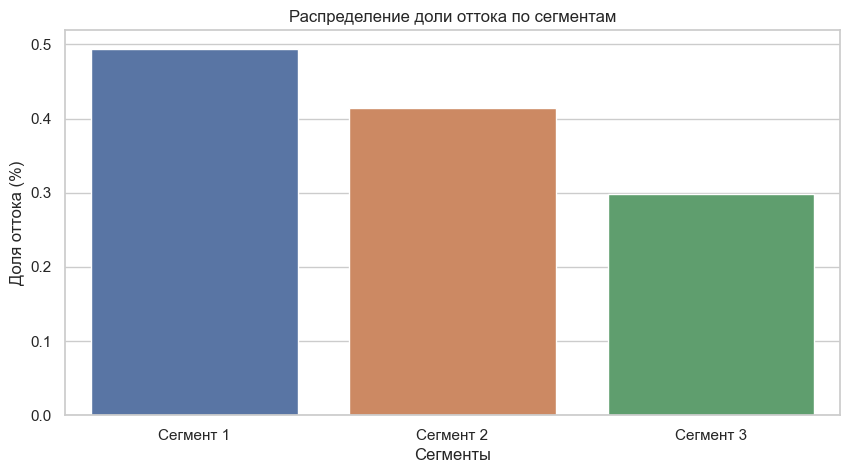

In [80]:
# Расчет значений freq для каждого сегмента
freq_values = [round(len(s[s['churn'] == 1]) / len(s), 5) for s in segments]

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 5))  # Установка размера графика
sns.barplot(x=['Сегмент 1', 'Сегмент 2', 'Сегмент 3'], y=freq_values, palette="deep")

# Настройка заголовка и меток осей
plt.title("Распределение доли оттока по сегментам")
plt.xlabel("Сегменты")
plt.ylabel("Доля оттока (%)")

# Отображение графика
plt.show()

Таким образом, сегменты приоритизируются от 1 к 3 по порядку, т.е. пользователи из первого сегмента наиболее склоны к оттокуи нужнаются в особых предложениях от банка 

### Общие выводы и рекомендации

Загрузка и описание данных были осуществлены

На этом этапе были выполнены следующие действия:

     - Выгрузка всех имеющихся данных
     - Составление их первичного описания: После загрузки данных следовало их первичное описание, которое включило в себя определение структуры данных, таких как количество строк и столбцов, типы данных в каждом столбце, а также построение первичных гистограм. Количество наблюдений - 10000, столбцов - 12. 


Подготовка данных была произведена 

Этот этап включал в себя более детальную работу с данными:
     
     - Проверка на корректность наименований столбцов: стили были изменены на змииный стиль
     - Проверка на наличие явных и латентных дубликатов: Дубликаты отсутствовали. В дубликатах по индексам заменили индексы 
     - Категоризация и кодирование необходимых данных: Были добавлены столбцы, кодирующие категориальные переменные, а также столбец с группами по возрасту.
     - Проверка на наличие пропусков: В возрасте было удалено 26 пропусков, в балансе пропуски оставили, поскольку они относятся к MAR или MNAR. 
     - Корректировка типов данных: Тип данных возроста изменен на целочисленные 
     
     Данных после удаления значений: 9974
     
Исследовательский анализ данных
На этом этапе проводится детальный анализ данных с целью выявления взаимосвязей между различными переменными и их влияния на отток клиентов банка:

      - Проверка распределений и первичный отбор списка предполагаемых признаков: были рассмотрены распределения и произведен первичный осмотр корреляций 
      - Определение отточных интервалов в разделе по непрерывным признакам: К отточным интервалам были отнесены: 
              1) Клиенты с баллами кредитного скоринга в промежутке от 800 до 900
              2) С балансом свыше 800 тыс. руб.
              3) С оценочным доходом 100-200 тыс. руб.
              
      - Определение отточных групп клиентов с помощью группировки через категориальный набор переменных: К отточным категориям были отнесены: 
              1) Клиенты, владеющие 4мя и 3мя продуктами
              2) Клиенты с большим числом баллов собственности (практически упорядочено с ростом баллов собственности ростет доля отточности).
              3) Более всего склонны к оттоку клиенты из Ростова, 
              4) Мужчины  в полтора раза часще покидают банк
      
      - Анализ портрета клиентов в разрезе оттока показал что: средний доход отточного клиента - 114767, пол - мужской, город - Ярославль и зафиксированная активность
      
      - Корреляционный анализ связи выделенных факторов и частоты ухода клиентов и его интерпретация: сильная связь наблюдается между:
              1) количеством баллов собственности и оцениваемым балансом клиента 
              2) оцениваемым балансом и баллами кредитного скоринга
             
       Что касается корреляции оттока:
       
              1)  наибольшая зависимость наблюдается между оттоком и количеством используемых продуктов
              2)  также имеется связь между оттоком и количеством баллов собственности, оттоком и балансом
      
Проверка статистических гипотез

На этом этапе происходит проверка предположений, сделанных на основе предыдущего анализа данных, с использованием статистических методов:

      - В рамках данного блока были выдвинуты 4 гипотезы
      - Выбор и обоснование методик тестирования был осуществлен: в набор используемых методов попали Т-тест Стьюдента, Хи-квадрат Пирсона, Тест пропорций и моделирование логической регрессии 
      - Проверка гипотезы о различии дохода между теми клиентами, которые ушли и теми, которые остались показала что доход между этими группами различается
      - Проверка гипотезы о росте вероятности ухода с возростом также не набрала достаточной вероятности для того, чтобы считаться рабочей 
      - Было подтверждено, что наличие кредитной карты действительно влияет на то, что клиент останется в банке 
      - Было подтверждено, что в отточный групе выше среднее число используемых продуктов банка 
      
Сегментация: 

В рамках данного блока: 
 
      - Были выделены следующие основные сегменты пользователей: 
      
           1) Сегмент 1: Клиенты без кредитной карты, мужского пола и баллами собственности от 4, Количество строк: 693, Доля оттока: 0.49639
           2) Сегмент 2: Клиенты с кредитным счетом от 800 до 900 баллов скоринга, более 3 продуктами и возрастом от 25 до 35 или от 48 до 65 лет, Количество строк: 509, Доля оттока: 0.41454
           3) Сегмент 3: Клиенты с балансом выше 800000 руб. и зарплатой выше 100000 руб. в мес., проживающие в Ярославле или Ростове, Количество строк: 2515, Доля оттока: 0.29742
           
           Сегменты были приоритизированы по уровню отточности внутри сегмента 


Основные рекомендации по борьбе с оттоком: 

    1) Для 1 Сегмента
         
         - Узнать источники недовольства со стороны мужской части пользователей 
         - Провести мероприятия по подключению кредитных карт для клиентов
         - Изменить условия работы с клиентами, обладающими высокой оцениваемой собствеенностью 
    
    
    2) Для 2 Сегмента 
    
         - Узнать чем недовольна аудитория 50-60 летних пользователей, возможно низкий уровень доверия 
         - Проверить систему использования нескольких продуктов банка
         - Если система в порядке, провести рекламу по использованию нескольких продуктов (поскольку 3 и более используются неохотно)
         
    3) Для 3 Сегмента 
     
         - Проверить качество филиалов в Ярославле и Ростове 
         - Создать привлекательные условия для пользователей с средним (100-200 тыс. руб.) и/или высоким  
     доходом - в низком сегменте все хорошо  
         - Добавить льготные условия для крупных вложений и программы премиальных клиентов 

**Ссылка на презентацию:** 
На Диск: https://disk.yandex.ru/i/lPh0_oma6mnyrQ